In [60]:
where='Home'

if where=='Work':
    prepath='/Users/Ryan Clark/Box Sync/ResearchVenturelli/'
else:
    prepath='/Box/Box/ResearchVenturelli/'
    
#Import the necessary packages
import sys
sys.path.append(prepath+'SEH_python_scripts')
from metadata_2019_06_17 import *
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from scipy import stats
import scipy as sp
import pickle as pkl
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
mpl.rcParams['figure.dpi']=250

masterDF=pd.read_csv(prepath+'Butyrate Production Experiments/DataFrames/2020_02_28_MasterDF.csv',index_col=0)
cleanDF=masterDF[(masterDF['Contamination?']=='No')&(masterDF['HB']!=1)]
for z in list(cleanDF.index.values):
    numspecies=0
    for species in phylogeny:            
        if cleanDF.at[z,species]==1:
            numspecies+=1
    cleanDF.at[z,'NumSpecies']=numspecies
    mystring=''
    for species in bpbspecies:
        if cleanDF.at[z,species]==1:
            if mystring=='':
                mystring=mystring+species
            else:
                mystring=mystring+'-'+species
    cleanDF.at[z,'BPBSet']=mystring
    s=0
    for species in bpbspecies:
        s+=cleanDF.at[z,species]
    if s==numspecies and s>2 and '-' in cleanDF.at[z,'Treatment']:
        bpbincluded=cleanDF.at[z,'Treatment'].split('-')
        mystring=''
        for species in phylogeny:
            if species in bpbincluded:
                if mystring=='':
                    mystring=species
                else:
                    mystring=mystring+'-'+species
        cleanDF.at[z,'Treatment']=mystring
    if cleanDF.at[z,'Treatment']=='COMM8':
        cleanDF.at[z,'Treatment']='FP-AC-ER-RI-CC'
for species in phylogeny:
    cleanDF[species+' OD']=cleanDF[species+' Fraction']*cleanDF['OD']
plotpath='plots/'+datetime.date.today().strftime("%Y_%m_%d_")

C:\Users\Ryan\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Ryan\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [2]:
validationset1=['PC-BV-BO-BU-BA-BP-EL-FP-CH-AC-CG-ER-RI-CC-DF', 'PC-BV-BA-BP-CA-EL-FP-AC-CG-ER-RI-CC-DF', 'BY-DP-BP-FP-AC-BH-CG-ER-RI-CC-DL', 'PC-BV-BO-BY-BL-BA-BP-FP-CH-AC-CG-ER-RI-CC-DF', 'BV-BU-BL-BA-BP-CA-EL-FP-CH-AC-CG-ER-RI-CC-DF', 'PC-PJ-BL-EL-FP-AC-BH-ER-RI-CC-DF', 'PC-PJ-BY-BA-BP-FP-AC-BH-CG-ER-RI-CC-DF', 'PC-PJ-BY-DP-BL-BA-FP-CH-AC-BH-ER-RI-CC-DL', 'PC-BC-DP-BP-EL-FP-AC-CG-ER-RI-CC-DL', 'PC-PJ-BO-BL-EL-FP-AC-BH-ER-RI-CC', 'PJ-BY-BU-BL-BA-BP-FP-AC-BH-CG-ER-RI-CC-DF', 'PC-BO-BL-EL-FP-CH-AC-ER-RI-CC-DF', 'PJ-BY-BA-BP-CA-FP-CH-AC-BH-ER-RI-CC-DF', 'PC-PJ-BV-BO-BL-FP-AC-BH-ER-RI-CC', 'PC-PJ-BV-BU-BL-CA-EL-FP-CH-AC-CG-ER-RI-CC-DF', 'BV-BO-BL-BA-BP-CA-EL-FP-AC-BH-CG-ER-RI-CC', 'PC-PJ-BV-BO-BL-FP-CH-AC-ER-RI-CC', 'BY-BU-BA-BP-CA-FP-AC-BH-CG-ER-RI-CC-DF', 'PC-BV-BO-BA-BP-EL-FP-CH-AC-CG-ER-RI-CC-DF', 'BY-BA-BP-FP-AC-BH-CG-ER-RI-CC-DF', 'PC-BV-BO-BY-BL-BA-BP-FP-CH-AC-CG-ER-RI-CC', 'PC-BV-BL-BA-BP-CA-EL-FP-CH-AC-CG-ER-RI-CC-DF', 'PC-PJ-BV-BL-BA-FP-AC-ER-RI-CC-DF', 'PJ-BU-BA-CA-FP-CH-AC-BH-ER-RI-CC', 'PC-BV-BO-BC-BY-DP-BL-BP-FP-CH-AC-ER-RI-CC-DL', 'PJ-BV-BY-DP-BP-FP-AC-ER-RI-CC-DL-DF', 'PC-PJ-BV-BO-BC-DP-BL-FP-AC-ER-RI-CC-DL', 'BO-BC-BY-DP-FP-AC-BH-ER-RI-CC-DL', 'BO-BA-BP-CA-FP-CH-AC-BH-CG-ER-RI-CC-DF', 'BV-BU-BA-BP-CA-EL-FP-AC-CG-ER-RI-CC-DF', 'PC-BL-CA-EL-FP-CH-AC-BH-ER-RI-CC', 'BV-BC-DP-EL-FP-CH-AC-BH-ER-RI-CC-DF', 'PC-BC-BY-BU-DP-BL-BP-FP-AC-ER-RI-CC-DL', 'BY-DP-BP-CA-FP-AC-BH-CG-ER-RI-CC-DL', 'PJ-BC-DP-CA-FP-CH-AC-ER-RI-CC-DL-DF', 'PJ-BC-DP-BA-FP-CH-AC-BH-ER-RI-CC-DL', 'PC-BO-DP-BP-FP-AC-BH-CG-ER-RI-CC-DL', 'BV-BC-DP-EL-FP-CH-AC-ER-RI-CC-DF', 'BV-BO-BL-CA-EL-FP-AC-BH-ER-RI-CC', 'PC-BO-CA-FP-CH-AC-BH-ER-RI-CC-DF', 'PJ-BV-BO-BL-BA-CA-FP-CH-AC-ER-RI-CC-DF', 'PC-PJ-BA-CA-EL-FP-AC-BH-ER-RI-CC', 'PC-PJ-BC-DP-FP-AC-BH-ER-RI-CC-DF', 'PC-BV-BO-EL-FP-CH-AC-ER-RI-CC-DF', 'PJ-BV-BU-BL-FP-AC-BH-CG-ER-RI-CC-DF', 'PC-BV-BO-BA-BP-FP-AC-CG-ER-RI-CC-DF', 'PJ-BO-BY-BA-BP-FP-AC-ER-RI-CC-DF', 'PJ-BC-DP-BL-FP-AC-BH-ER-RI-CC-DF', 'BO-BC-DP-BP-CA-FP-CH-AC-BH-CG-ER-RI-CC-DL-DF', 'BV-BC-DP-BP-CA-FP-AC-BH-CG-ER-RI-CC-DL', 'PJ-BV-BO-BA-BP-CA-FP-CH-AC-CG-ER-RI-CC-DF', 'PJ-BU-BL-BA-CA-EL-FP-CH-AC-CG-ER-RI-CC-DF', 'PJ-BV-BC-DP-FP-CH-AC-ER-RI-CC-DF', 'PJ-BY-DP-BP-FP-AC-BH-ER-RI-CC-DL', 'BV-BA-BP-EL-FP-CH-AC-CG-ER-RI-CC-DF', 'PC-PJ-BV-BO-BC-BY-DP-BL-BP-FP-CH-AC-ER-RI-CC-DL', 'PC-PJ-BO-BY-DP-BP-EL-FP-AC-BH-ER-RI-CC-DL', 'PC-BO-BY-BL-BA-BP-FP-AC-ER-RI-CC-DF', 'PC-BU-BA-CA-FP-AC-BH-ER-RI-CC-DF', 'PJ-BO-BY-BA-BP-FP-AC-BH-ER-RI-CC-DF', 'PC-BV-BO-BL-BA-BP-FP-AC-BH-CG-ER-RI-CC-DF', 'PJ-BF-BC-BY-DP-FP-AC-BH-ER-RI-CC', 'BV-BU-BA-CA-EL-FP-AC-BH-ER-RI-CC-DF', 'PC-PJ-BV-BC-DP-FP-CH-AC-ER-RI-CC-DF', 'PC-BV-BO-BU-CA-EL-FP-CH-AC-ER-RI-CC-DF', 'BO-BC-DP-BP-FP-AC-CG-ER-RI-CC-DL-DF', 'PJ-BO-BY-BA-BP-EL-FP-AC-BH-CG-ER-RI-CC', 'PC-PJ-BL-BA-CA-FP-AC-BH-ER-RI-CC', 'PJ-BO-BY-DP-BA-BP-FP-AC-BH-ER-RI-CC-DL', 'PJ-BT-BC-BY-DP-FP-AC-BH-ER-RI-CC', 'PC-PJ-BV-BO-CA-FP-AC-BH-ER-RI-CC', 'PC-PJ-BO-BY-BL-BA-BP-EL-FP-AC-BH-CG-ER-RI-CC', 'BY-DP-CA-FP-CH-AC-BH-ER-RI-CC-DL', 'PC-PJ-BL-BA-CA-EL-FP-CH-AC-BH-ER-RI-CC', 'PC-PJ-BV-BA-CA-FP-AC-ER-RI-CC-DF', 'PC-PJ-BL-BA-BP-CA-FP-CH-AC-CG-ER-RI-CC-DF', 'PC-BV-BO-BL-FP-CH-AC-ER-RI-CC-DF', 'PC-PJ-BV-BO-BA-FP-AC-ER-RI-CC-DF', 'BY-BA-BP-CA-FP-AC-BH-ER-RI-CC-DF', 'BO-BL-BA-BP-EL-FP-CH-AC-CG-ER-RI-CC-DL-DF', 'PC-PJ-BV-BA-FP-AC-BH-ER-RI-CC-DF', 'PC-PJ-BV-BU-BL-BA-FP-AC-ER-RI-CC']
validationset2=['PC-BV-BF-BT-BC-BY-BU-BA-BP-CA-FP-BH-CG-ER-RI-CC-DL-DF', 'PC-BF-BT-BC-BU-BA-EL-FP-CG-ER-RI-CC-DL', 'PC-PJ-BF-BO-BY-DP-BL-BA-EL-FP-BH-CG-ER-RI-CC-DF', 'PJ-BV-BO-BU-EL-FP-BH-ER-RI-CC-DF', 'PC-PJ-BV-BU-BP-CA-FP-CG-ER-RI-CC-DF', 'PC-PJ-DP-BP-CA-FP-BH-ER-RI-CC-DF', 'PJ-BV-BU-DP-BA-BP-FP-CH-ER-RI-CC-DF', 'PC-PJ-BO-BL-BA-EL-FP-BH-CG-ER-RI-CC-DF', 'PJ-BU-DP-BL-CA-EL-FP-CH-ER-RI-CC', 'PJ-BV-BU-DP-BA-BP-FP-BH-ER-RI-CC-DF', 'BV-BF-BT-BC-BA-BP-CA-FP-CH-ER-RI-CC-DL-DF', 'PC-BV-BF-BT-BC-BU-BA-BP-CA-EL-FP-CH-CG-ER-RI-CC-DL-DF', 'PC-PJ-BU-CA-EL-FP-CG-ER-RI-CC-DF', 'PJ-BO-DP-BA-BP-CA-FP-BH-ER-RI-CC', 'PC-PJ-BV-BO-BU-BL-BA-CA-EL-FP-ER-RI-CC-DF', 'BV-BU-DP-EL-FP-BH-CG-ER-RI-CC-DF', 'PC-PJ-BV-BU-DP-BL-BA-BP-CA-FP-CH-BH-CG-ER-RI-CC-DF', 'PC-PJ-BU-DP-EL-FP-CH-ER-RI-CC-DF', 'PC-PJ-BV-BU-DP-BL-BA-BP-CA-FP-CG-ER-RI-CC-DF', 'PC-BV-BO-BU-DP-CA-EL-FP-BH-ER-RI-CC', 'PJ-DP-BL-BA-BP-CA-FP-CG-ER-RI-CC-DF', 'PC-BF-BT-BC-BU-BA-BP-CA-EL-FP-CG-ER-RI-CC-DL-DF', 'PJ-BV-BC-BY-DP-BP-CA-FP-CH-BH-ER-RI-CC-DF', 'BL-BA-BP-CA-FP-CH-BH-ER-RI-CC-DF', 'PC-BV-BO-BU-EL-FP-BH-ER-RI-CC-DF', 'PC-BV-BU-DP-BL-CA-EL-FP-ER-RI-CC', 'PC-BU-BP-CA-EL-FP-CG-ER-RI-CC-DF', 'BV-BF-BT-BC-BY-DP-BA-BP-CA-FP-BH-ER-RI-CC-DL-DF', 'PC-PJ-BO-BU-BA-EL-FP-BH-ER-RI-CC-DL-DF', 'PC-PJ-BV-BO-BU-EL-FP-CG-ER-RI-CC', 'DP-BL-BA-CA-EL-FP-BH-ER-RI-CC-DF', 'BV-BF-BT-BC-BU-DP-BA-CA-EL-FP-CH-ER-RI-CC-DL', 'PC-PJ-BA-CA-FP-CH-ER-RI-CC-DL-DF', 'PC-PJ-BV-BC-BY-BU-BL-BP-CA-FP-CH-BH-CG-ER-RI-CC-DF', 'PC-PJ-BV-BU-BA-CA-EL-FP-CH-ER-RI-CC-DF', 'PC-BU-BL-CA-EL-FP-CG-ER-RI-CC-DF', 'PC-PJ-DP-BL-BA-CA-FP-CH-ER-RI-CC-DF', 'PC-BO-BY-BU-DP-BP-EL-FP-BH-ER-RI-CC', 'PC-BT-BU-DP-BP-EL-FP-ER-RI-CC-DF', 'PC-BF-BT-BC-BY-BU-BA-BP-EL-FP-CH-CG-ER-RI-CC-DL-DF', 'PC-PJ-BV-BU-DP-BP-FP-CG-ER-RI-CC-DF', 'PC-BV-BU-BA-CA-EL-FP-CH-ER-RI-CC-DF', 'PC-PJ-BF-BU-BA-BP-CA-EL-FP-CH-CG-ER-RI-CC-DF', 'PC-BO-BY-DP-BP-EL-FP-ER-RI-CC-DF', 'PC-PJ-BO-BU-DP-BP-CA-EL-FP-BH-ER-RI-CC', 'PC-BL-BA-CA-FP-CH-BH-ER-RI-CC-DF', 'PJ-BV-BF-BT-BC-DP-BA-CA-EL-FP-BH-ER-RI-CC-DL-DF', 'BV-BF-BT-BC-BU-BA-EL-FP-ER-RI-CC-DL-DF', 'PC-BV-BF-BT-BC-BU-DP-BA-BP-EL-FP-ER-RI-CC-DL-DF', 'PC-BV-BO-DP-BA-CA-FP-BH-ER-RI-CC', 'PC-PJ-BV-BO-BC-BY-BU-BP-EL-FP-BH-CG-ER-RI-CC', 'BV-BF-BT-BC-BU-DP-BA-EL-FP-BH-CG-ER-RI-CC-DL-DF', 'PJ-BO-BL-BA-BP-CA-FP-CH-ER-RI-CC-DF', 'PC-BV-BF-BT-BC-BU-BA-CA-FP-ER-RI-CC-DL-DF', 'PC-BV-BO-BU-BL-BA-CA-EL-FP-ER-RI-CC-DF', 'PC-PJ-BU-DP-BL-BA-CA-FP-CH-ER-RI-CC-DF', 'PJ-DP-BL-BA-CA-EL-FP-BH-ER-RI-CC-DF', 'PC-BF-BT-BC-BA-FP-CH-CG-ER-RI-CC-DL-DF', 'PC-BV-BF-BT-BC-BY-DP-BA-EL-FP-BH-CG-ER-RI-CC-DL-DF', 'PC-PJ-BO-DP-BP-CA-FP-BH-ER-RI-CC', 'PJ-BV-BC-BY-DP-BP-CA-FP-CH-BH-ER-RI-CC', 'PJ-BF-BO-BT-BY-BA-FP-BH-ER-RI-CC-DF', 'PJ-BV-BU-DP-BA-FP-CH-ER-RI-CC-DF', 'PJ-BV-BC-BY-BU-DP-BP-FP-CH-BH-ER-RI-CC-DF', 'PJ-BO-BL-BA-BP-CA-FP-CH-ER-RI-CC-DL', 'PC-PJ-BV-BO-BU-EL-FP-BH-CG-ER-RI-CC', 'PC-PJ-BV-BF-BT-BC-BU-DP-BA-BP-CA-EL-FP-BH-ER-RI-CC-DL', 'PC-PJ-BV-BO-BU-BA-BP-CA-EL-FP-ER-RI-CC-DF', 'PJ-BV-DP-EL-FP-BH-CG-ER-RI-CC-DF', 'PC-PJ-BU-BL-CA-FP-CH-CG-ER-RI-CC-DF', 'PC-BO-DP-BL-BA-EL-FP-CH-BH-CG-ER-RI-CC-DF', 'PC-PJ-BU-BA-EL-FP-CH-CG-ER-RI-CC-DF', 'PC-PJ-BO-BC-BU-EL-FP-CG-ER-RI-CC-DL', 'PC-PJ-BV-BU-BP-FP-BH-CG-ER-RI-CC', 'PC-BC-BU-BP-EL-FP-CH-ER-RI-CC-DF', 'PC-PJ-BV-BO-BC-BY-BU-BP-FP-BH-CG-ER-RI-CC', 'PC-PJ-BV-BF-BT-BC-BU-DP-BA-BP-CA-FP-BH-CG-ER-RI-CC-DL-DF', 'PJ-BV-BF-BT-BC-BY-DP-BA-CA-FP-BH-ER-RI-CC-DL', 'PC-BV-BF-BT-BC-BU-BA-BP-FP-BH-CG-ER-RI-CC-DL', 'PC-PJ-BU-BP-EL-FP-CH-CG-ER-RI-CC-DL-DF', 'PJ-BV-BF-BT-BC-BY-BU-DP-BA-FP-CH-ER-RI-CC-DL-DF', 'PC-PJ-BU-BL-EL-FP-CH-ER-RI-CC-DL', 'PC-PJ-BO-DP-BA-BP-CA-FP-BH-ER-RI-CC-DL', 'PJ-BV-BF-BT-BC-DP-BA-BP-CA-FP-BH-ER-RI-CC-DL']
randomset=['BO-BT-BC-BL-BP-EL-FP-CH-AC-BH-ER-RI-CC-DL-DF', 'PC-PJ-BV-BO-BT-BC-DP-BL-EL-FP-CH-AC-ER-RI-CC', 'PC-PJ-BV-BF-BT-BP-EL-FP-AC-ER-RI-CC', 'PC-BV-BF-DP-BL-BA-EL-FP-AC-BH-CG-ER-RI-CC-DF', 'BL-BP-CA-FP-CH-AC-BH-ER-RI-CC-DF', 'BV-BO-BT-DP-BA-CA-FP-AC-ER-RI-CC', 'BF-BO-BC-BP-FP-CH-AC-ER-RI-CC-DL', 'PJ-BV-BC-BU-FP-CH-AC-BH-CG-ER-RI-CC', 'PC-BV-BF-BU-BP-FP-CH-AC-ER-RI-CC', 'BV-BC-BY-BA-CA-FP-AC-ER-RI-CC-DF', 'PJ-BV-BO-BY-DP-BA-BP-CA-EL-FP-CH-AC-ER-RI-CC', 'BO-DP-BL-BP-CA-FP-AC-ER-RI-CC-DF', 'PC-BV-BC-BY-CA-EL-FP-AC-ER-RI-CC-DF', 'PC-BO-BY-BL-BP-EL-FP-AC-ER-RI-CC-DF', 'PJ-BV-BT-BC-BA-EL-FP-AC-BH-ER-RI-CC', 'PC-BV-BC-BA-FP-CH-AC-CG-ER-RI-CC-DF', 'PC-BO-BC-BY-BA-BP-FP-AC-ER-RI-CC-DF', 'BF-BO-BT-BU-BA-FP-CH-AC-BH-CG-ER-RI-CC-DF', 'PC-BU-BL-BA-CA-EL-FP-AC-ER-RI-CC', 'BO-BU-DP-BL-BP-FP-AC-ER-RI-CC-DL', 'PJ-BY-DP-BL-BA-BP-EL-FP-CH-AC-ER-RI-CC', 'PC-BV-BY-BU-BA-FP-AC-CG-ER-RI-CC-DL', 'BV-BO-BT-BA-BP-CA-FP-AC-ER-RI-CC-DL-DF', 'PC-PJ-BF-BO-BC-DP-FP-AC-ER-RI-CC', 'BF-BO-BU-BA-CA-FP-CH-AC-ER-RI-CC-DL-DF', 'BV-BF-BT-BC-BU-BA-EL-FP-AC-CG-ER-RI-CC', 'PC-PJ-BT-BC-DP-BP-EL-FP-AC-ER-RI-CC-DL-DF', 'PC-BT-BC-BP-CA-EL-FP-CH-AC-BH-ER-RI-CC-DL-DF', 'PC-BF-CA-EL-FP-AC-BH-CG-ER-RI-CC', 'PC-PJ-BV-BF-BP-FP-AC-BH-ER-RI-CC-DL-DF', 'PC-PJ-BV-BO-BY-BU-BA-FP-CH-AC-BH-ER-RI-CC', 'PC-BV-BY-BP-CA-FP-CH-AC-CG-ER-RI-CC-DF', 'PJ-BC-BY-DP-BA-FP-AC-ER-RI-CC-DF', 'PC-BL-BA-BP-FP-AC-CG-ER-RI-CC-DL', 'PC-BV-BF-BT-BY-EL-FP-AC-ER-RI-CC', 'PJ-BO-BT-BY-BU-DP-FP-AC-BH-CG-ER-RI-CC-DL', 'PC-BV-BF-BT-BU-DP-BL-FP-AC-CG-ER-RI-CC', 'PC-PJ-BA-EL-FP-CH-AC-BH-CG-ER-RI-CC', 'BT-BA-BP-EL-FP-AC-BH-ER-RI-CC-DL-DF', 'BV-BT-BC-BY-BU-BL-FP-CH-AC-CG-ER-RI-CC', 'BC-BL-EL-FP-CH-AC-ER-RI-CC-DL-DF', 'PC-PJ-BV-BC-BP-FP-AC-ER-RI-CC-DL', 'PJ-BO-BY-BL-BA-FP-CH-AC-ER-RI-CC', 'PC-BV-BU-DP-BP-CA-EL-FP-CH-AC-ER-RI-CC', 'PC-BO-BT-BY-BA-EL-FP-AC-BH-ER-RI-CC-DL', 'BV-BO-BT-BC-BU-BA-EL-FP-CH-AC-ER-RI-CC-DL-DF', 'BC-DP-BL-BA-EL-FP-CH-AC-ER-RI-CC', 'PJ-BF-BT-BC-BY-BU-BL-BA-CA-FP-AC-CG-ER-RI-CC', 'PC-BV-BC-BU-DP-BA-CA-FP-AC-ER-RI-CC', 'PJ-BO-BL-EL-FP-AC-BH-ER-RI-CC-DL', 'PJ-BF-BY-BA-BP-FP-AC-ER-RI-CC-DL', 'BT-BA-BP-EL-FP-CH-AC-ER-RI-CC-DL', 'PJ-BO-BL-CA-FP-CH-AC-BH-ER-RI-CC', 'PC-BO-BY-DP-BP-CA-FP-AC-BH-ER-RI-CC-DL', 'BV-BF-BC-BY-DP-BL-CA-EL-FP-AC-ER-RI-CC-DF', 'PC-BO-BT-BU-BA-FP-AC-ER-RI-CC-DL', 'PC-BF-BT-BP-CA-FP-AC-CG-ER-RI-CC-DF', 'PC-PJ-BO-BY-DP-BA-BP-CA-FP-AC-ER-RI-CC', 'DP-BA-BP-CA-FP-CH-AC-CG-ER-RI-CC', 'PC-PJ-BV-BT-BY-DP-CA-FP-CH-AC-ER-RI-CC-DF', 'BV-BF-BC-BY-FP-AC-BH-ER-RI-CC-DL', 'PC-BT-BU-BL-FP-AC-BH-ER-RI-CC-DF', 'PJ-BO-BL-BA-CA-EL-FP-AC-ER-RI-CC', 'BF-BT-BC-BY-CA-FP-AC-ER-RI-CC-DL', 'PJ-BF-BO-BC-BY-BU-DP-BL-FP-AC-CG-ER-RI-CC', 'BV-BF-BO-BC-BL-BP-FP-AC-CG-ER-RI-CC-DL', 'BC-DP-BL-FP-AC-BH-ER-RI-CC-DL-DF', 'BV-BF-BO-DP-CA-FP-CH-AC-BH-ER-RI-CC-DL', 'PJ-BV-BF-BO-BC-BY-BL-CA-FP-CH-AC-CG-ER-RI-CC-DF', 'BV-BF-BY-BP-CA-EL-FP-CH-AC-ER-RI-CC', 'PC-PJ-BV-BO-BU-BA-CA-FP-CH-AC-BH-CG-ER-RI-CC', 'PJ-BV-BF-BO-BC-BY-EL-FP-CH-AC-ER-RI-CC-DF', 'PC-BO-BT-BC-DP-BL-BA-FP-CH-AC-BH-ER-RI-CC', 'PC-BV-BT-BY-DP-BL-FP-AC-CG-ER-RI-CC', 'PC-PJ-BF-BY-CA-FP-AC-BH-ER-RI-CC', 'BO-BY-BL-CA-FP-CH-AC-CG-ER-RI-CC', 'BF-BO-EL-FP-AC-CG-ER-RI-CC-DL-DF', 'BV-BF-BA-BP-CA-FP-AC-ER-RI-CC-DL', 'PC-PJ-BF-BO-BT-BC-BU-BL-FP-AC-ER-RI-CC-DL', 'BV-BT-BU-DP-BL-BA-BP-EL-FP-AC-BH-ER-RI-CC', 'BV-BF-BY-DP-CA-FP-CH-AC-ER-RI-CC', 'BV-BO-BC-BY-BU-EL-FP-AC-ER-RI-CC-DL']
predictionset=validationset1+validationset2[int(len(validationset2)/2):len(validationset2)]
trainingDF=cleanDF[(cleanDF['NumSpecies']<6)|cleanDF.Treatment.isin(randomset+validationset2[0:int(len(validationset2)/2)])]
trainingset=list(set(trainingDF['Treatment']))
numspecies=25
LOOComms=[]
for species in phylogeny:
    mystring=''
    for each in phylogeny:
        if each!=species:
            if mystring=='':
                mystring=each
            else:
                mystring=mystring+'-'+each
    LOOComms.append(mystring)
mystring=''
for each in phylogeny:
    if mystring=='':
        mystring=each
    else:
        mystring=mystring+'-'+each
LOOComms.append(mystring)

## Weight vs Lambda

In [3]:
DF=pd.read_csv('../../Datasets/RLC9 Model Training/lambdaVSweight.csv')

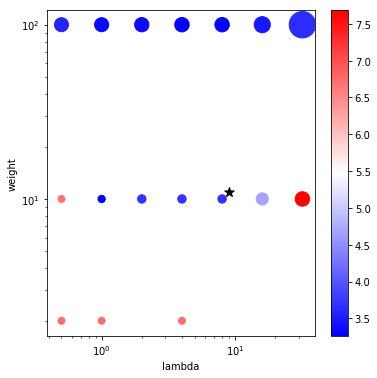

In [4]:
#radius is proportional to MSE for trainingdata, color is MSE for monospecies growth curves
offset=1
plt.figure(figsize=(6,6))
plt.scatter(x=DF['lambda'],y=DF['w'],s=50*(DF['MSE']-0.9*DF['MSE'].min()),c=DF['MSE_mono'],cmap='bwr')
plt.colorbar()
plt.scatter(x=8+offset,y=10+offset,marker='*',color='k',s=100)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('weight')
plt.show()
plt.close()

In [5]:
outF = open("RLC9_TrainingComms_Lower.txt", "w")
trainingset2=list(set(cleanDF[cleanDF['NumSpecies']<6]['Treatment']))
for community in trainingset2:
    specieslist=community.split('-')
    k=0
    for species in specieslist:
        outF.write(str(phylogenyvectorDict[species]+1))
        if (k+1)>(len(specieslist)-1):
            outF.write("\n")
        else:
            outF.write(',')
        k+=1
outF.close()

In [6]:
outF = open("RLC9_LOOs.txt", "w")
trainingset2=list(set(cleanDF[cleanDF.NumSpecies.isin([24,25])]['Treatment']))
for community in trainingset2:
    if '*' in community:
        specieslist=[]
        for species in phylogeny:
            if species!=community.split('*')[1]:
                specieslist.append(species)
    else:
        specieslist=phylogeny
    k=0
    for species in specieslist:
        outF.write(str(phylogenyvectorDict[species]+1))
        if (k+1)>(len(specieslist)-1):
            outF.write("\n")
        else:
            outF.write(',')
        k+=1
outF.close()

## Model Parameter Distribution Figure

In [7]:
#Store Base Parameters
#Parse parameters into useful format and save
#Note that the fmincon output is flipped relative to the Julia output
posteriorpath='RLC9Params/'
sets=os.listdir(posteriorpath)
baseparamdict={}
for species in phylogeny:
    baseparamdict[species]={}
    baseparamdict[species]['r']=[]
    for species2 in phylogeny:
        baseparamdict[species][species2]=[]

for file in sets:
    paramlist=np.genfromtxt(posteriorpath+file,delimiter='\n')
    k=0
    species=0
    for param in paramlist:
        if k==0:
            baseparamdict[phylogeny[species]]['r'].append(param)
            k+=1
        elif k==25:
            baseparamdict[phylogeny[k-1]][phylogeny[species]].append(param)
            k=0
            species+=1
        else:
            baseparamdict[phylogeny[k-1]][phylogeny[species]].append(param)
            k+=1

In [8]:
#Store Parameter Posterior Distribution
#Parse parameters into useful format and save
#Note that the fmincon output is flipped relative to the Julia output
posteriorpath='../../Datasets/RLC9 Model Training/RLC9_posterior_fixedprior/'
sets=os.listdir(posteriorpath)
paramdict={}
for species in phylogeny:
    paramdict[species]={}
    paramdict[species]['r']=[]
    for species2 in phylogeny:
        paramdict[species][species2]=[]

for file in sets:
    paramlist=np.genfromtxt(posteriorpath+file,delimiter='\n')
    k=0
    species=0
    for param in paramlist:
        if k==0:
            paramdict[phylogeny[species]]['r'].append(param)
            k+=1
        elif k==25:
            paramdict[phylogeny[k-1]][phylogeny[species]].append(param)
            k=0
            species+=1
        else:
            paramdict[phylogeny[k-1]][phylogeny[species]].append(param)
            k+=1

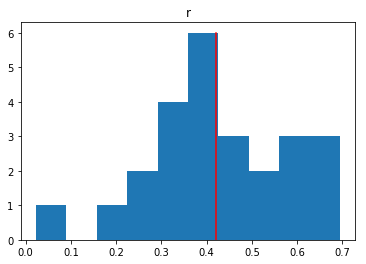

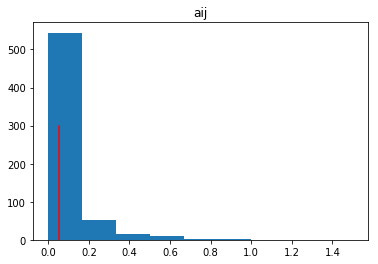

In [9]:
rlist=[]
for species in phylogeny:
    rlist.append(np.median(paramdict[species]['r']))
plt.hist(rlist)
plt.plot([np.median(rlist),np.median(rlist)],[0,6],color='r')
plt.title('r')
plt.show()
plt.close()
alist=[]
for speciesi in phylogeny:
    for speciesj in phylogeny:
        alist.append(abs(np.median(paramdict[speciesi][speciesj])))
plt.hist(alist,bins=np.linspace(0,1.5,10))
plt.plot([np.median(alist),np.median(alist)],[0,300],color='r')
plt.title('aij')
plt.show()
plt.close()

In [11]:
#Load RLC8 Parameter Posterior
#Parse parameters into useful format and save
posteriorpath='../../Datasets/RLC8 Model Training/RLC8_output/posterior_RLC8/'
sets=os.listdir(posteriorpath)
paramdict8={}
for species in phylogeny:
    paramdict8[species]={}
    paramdict8[species]['r']=[]
    for species2 in phylogeny:
        paramdict8[species][species2]=[]

for file in sets:
    paramlist=np.genfromtxt(posteriorpath+file,delimiter='\n')
    k=0
    species=0
    for param in paramlist:
        if k==0:
            paramdict8[phylogeny[species]]['r'].append(param)
            k+=1
        elif k==25:
            paramdict8[phylogeny[species]][phylogeny[k-1]].append(param)
            k=0
            species+=1
        else:
            paramdict8[phylogeny[species]][phylogeny[k-1]].append(param)
            k+=1

ALL
y=0.24452303892009292x+-0.052516020569610466, r=0.5541885924928698, p=2.688661175056668e-32
rho=0.5845321454002915, p=1.4568443738682188e-36


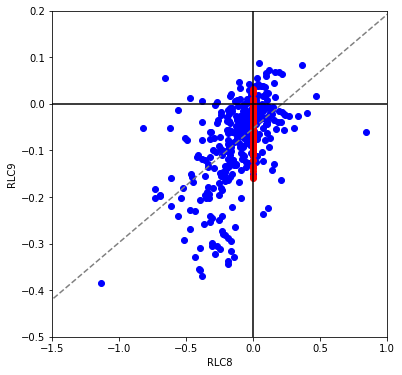

In [12]:
plt.figure(figsize=(6,6))
xall=[]
yall=[]
xnew=[]
ynew=[]
for i in range(numspecies):
    for j in range(numspecies):
        if i!=j:
            x=np.median(paramdict8[phylogeny[i]][phylogeny[j]])
            y=np.median(paramdict[phylogeny[i]][phylogeny[j]])
            if x==0:
                xnew.append(x)
                ynew.append(y)
            else:
                xall.append(x)
                yall.append(y)
m,b,R,p,stderr=stats.linregress(xall,yall)
rho,p_spearman=stats.spearmanr(xall,yall)
print('ALL')
print('y='+str(m)+'x+'+str(b)+', r='+str(R)+', p='+str(p))
print('rho='+str(rho)+', p='+str(p_spearman))
z=np.linspace(-70,70,1000)
plt.plot(z,m*z+b,linestyle='dashed',color='grey')
plt.xlabel('RLC8')
plt.ylabel('RLC9')
plt.ylim(-0.5,0.2)
plt.xlim(-1.5,1)
plt.plot([0,0],[-10,10],color='k')
plt.plot([-10,10],[0,0],color='k')
plt.scatter(xall,yall,color='b')
plt.scatter(xnew,ynew,color='r')
plt.show()
plt.close()

ALL
y=0.32391847765522436x+-0.03403162745734014, r=0.6049444261635202, p=3.6625773485132826e-61
rho=0.6090160141838178, p=3.50462483965436e-62


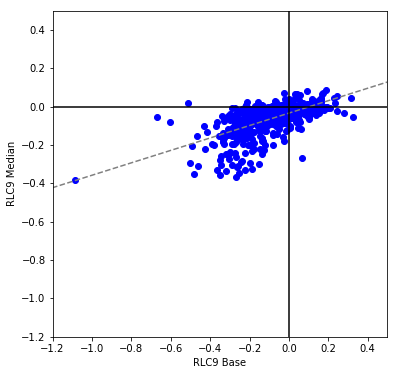

In [13]:
plt.figure(figsize=(6,6))
xall=[]
yall=[]
xnew=[]
ynew=[]
for i in range(numspecies):
    for j in range(numspecies):
        if i!=j:
            x=np.median(baseparamdict[phylogeny[i]][phylogeny[j]])
            y=np.median(paramdict[phylogeny[i]][phylogeny[j]])
            if x==0:
                xnew.append(x)
                ynew.append(y)
            else:
                xall.append(x)
                yall.append(y)
m,b,R,p,stderr=stats.linregress(xall,yall)
rho,p_spearman=stats.spearmanr(xall,yall)
print('ALL')
print('y='+str(m)+'x+'+str(b)+', r='+str(R)+', p='+str(p))
print('rho='+str(rho)+', p='+str(p_spearman))
z=np.linspace(-70,70,1000)
plt.plot(z,m*z+b,linestyle='dashed',color='grey')
plt.xlabel('RLC9 Base')
plt.ylabel('RLC9 Median')
plt.ylim(-1.2,0.5)
plt.xlim(-1.2,0.5)
plt.plot([0,0],[-10,10],color='k')
plt.plot([-10,10],[0,0],color='k')
plt.scatter(xall,yall,color='b')
plt.scatter(xnew,ynew,color='r')
plt.show()
plt.close()

ALL
y=0.006953022370834526x+0.3115438054912737, r=0.043094964695681276, p=0.39971878429316676
rho=-0.0485319673798786, p=0.3428815786988777


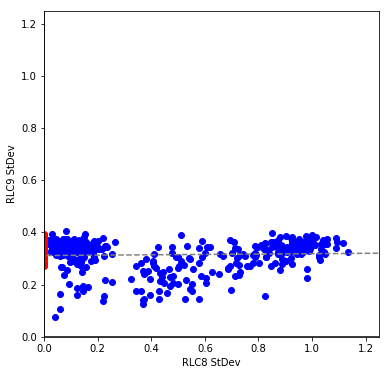

In [14]:
#Compare Standard Deviations BEtween RLC8 and RLC9
plt.figure(figsize=(6,6))
xall=[]
yall=[]
xnew=[]
ynew=[]
for i in range(numspecies):
    for j in range(numspecies):
        if i!=j:
            x=np.std(paramdict8[phylogeny[i]][phylogeny[j]])
            y=np.std(paramdict[phylogeny[i]][phylogeny[j]])
            if x==0:
                xnew.append(x)
                ynew.append(y)
            else:
                xall.append(x)
                yall.append(y)
m,b,R,p,stderr=stats.linregress(xall,yall)
rho,p_spearman=stats.spearmanr(xall,yall)
print('ALL')
print('y='+str(m)+'x+'+str(b)+', r='+str(R)+', p='+str(p))
print('rho='+str(rho)+', p='+str(p_spearman))
z=np.linspace(-70,70,1000)
plt.plot(z,m*z+b,linestyle='dashed',color='grey')
plt.xlabel('RLC8 StDev')
plt.ylabel('RLC9 StDev')
plt.ylim(0,1.25)
plt.xlim(0,1.25)
plt.plot([0,0],[-10,10],color='k')
plt.plot([-10,10],[0,0],color='k')
plt.scatter(xall,yall,color='b')
plt.scatter(xnew,ynew,color='r')
plt.show()
plt.close()

0.6979166666666667


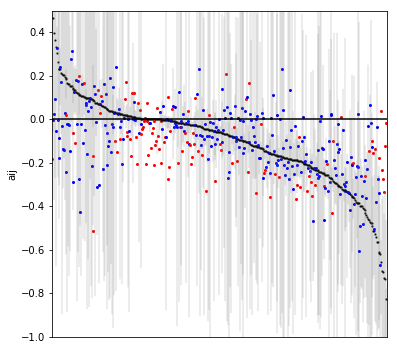

In [15]:
DF=pd.DataFrame()
z=0
for i in range(numspecies):
    for j in range(numspecies):
        if i!=j:
            if np.median(paramdict8[phylogeny[i]][phylogeny[j]])!=0:
                DF.at[z,'Parameter']=phylogeny[i]+'-'+phylogeny[j]
                DF.at[z,'Value']=np.median(paramdict8[phylogeny[i]][phylogeny[j]])
                z+=1
result=DF.groupby(['Parameter'])['Value'].aggregate(np.median).reset_index().sort_values('Value',ascending=False)
plt.figure(figsize=(6,6))
x=0
count=0
for param in list(result['Parameter']):
    species=param.split('-')
    dist=paramdict8[species[0]][species[1]]
    plt.plot([x,x],[np.percentile(dist,80),np.percentile(dist,20)],color='grey',linewidth=0.3)
    plt.plot(x,np.median(dist),color='k',marker='s',markersize=1)
    if np.median(baseparamdict[species[0]][species[1]])<np.percentile(dist,20) or np.median(baseparamdict[species[0]][species[1]])>np.percentile(dist,80):
        plt.plot(x,np.median(baseparamdict[species[0]][species[1]]),'ro',markersize=2)
        count+=1
    else:
        plt.plot(x,np.median(baseparamdict[species[0]][species[1]]),'bo',markersize=2)
    x+=1
plt.ylim(-1,0.5)
plt.xlim(0,x)
plt.plot([0,x],[0,0],color='k')
print(1-(count/x))
plt.xticks([])
plt.ylabel('aij')
plt.savefig('baseparameterchanges.png',dpi=2000)
plt.show()
plt.close() 

0.6953125


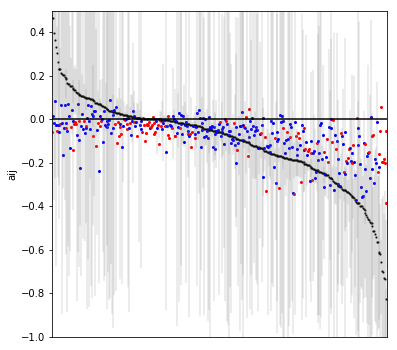

In [16]:
DF=pd.DataFrame()
z=0
for i in range(numspecies):
    for j in range(numspecies):
        if i!=j:
            if np.median(paramdict8[phylogeny[i]][phylogeny[j]])!=0:
                DF.at[z,'Parameter']=phylogeny[i]+'-'+phylogeny[j]
                DF.at[z,'Value']=np.median(paramdict8[phylogeny[i]][phylogeny[j]])
                z+=1
result=DF.groupby(['Parameter'])['Value'].aggregate(np.median).reset_index().sort_values('Value',ascending=False)
plt.figure(figsize=(6,6))
x=0
count=0
for param in list(result['Parameter']):
    species=param.split('-')
    dist=paramdict8[species[0]][species[1]]
    plt.plot([x,x],[np.percentile(dist,80),np.percentile(dist,20)],color='grey',linewidth=0.3)
    plt.plot(x,np.median(dist),color='k',marker='s',markersize=1)
    if np.median(paramdict[species[0]][species[1]])<np.percentile(dist,20) or np.median(paramdict[species[0]][species[1]])>np.percentile(dist,80):
        plt.plot(x,np.median(paramdict[species[0]][species[1]]),'ro',markersize=2)
        count+=1
    else:
        plt.plot(x,np.median(paramdict[species[0]][species[1]]),'bo',markersize=2)
    x+=1
plt.ylim(-1,0.5)
plt.xlim(0,x)
plt.plot([0,x],[0,0],color='k')
print(1-(count/x))
plt.xticks([])
plt.ylabel('aij')
plt.savefig('parameterchanges.png',dpi=2000)
plt.show()
plt.close()   

In [17]:
poscount=0
negcount=0
count=0
for i in range(numspecies):
    for j in range(numspecies):
        if i!=j:
            if np.percentile(paramdict[phylogeny[i]][phylogeny[j]],55)>0:
                poscount+=1
            elif np.percentile(paramdict[phylogeny[i]][phylogeny[j]],55)<0:
                negcount+=1
            count+=1
print('Percent >0.1='+str(100*poscount/count))
print('Percent <-0.1='+str(100*negcount/count))

Percent >0.1=43.333333333333336
Percent <-0.1=56.666666666666664


In [18]:
poscount=0
negcount=0
count=0
for i in range(numspecies):
    for j in range(numspecies):
        if i!=j:
            if np.median(paramdict[phylogeny[i]][phylogeny[j]])>0.05:
                poscount+=1
            elif np.median(paramdict[phylogeny[i]][phylogeny[j]])<-0.05:
                negcount+=1
            count+=1
print('Percent >0.05='+str(100*poscount/count))
print('Percent <-0.05='+str(100*negcount/count))

Percent >0.05=1.6666666666666667
Percent <-0.05=49.833333333333336


0.9895833333333334


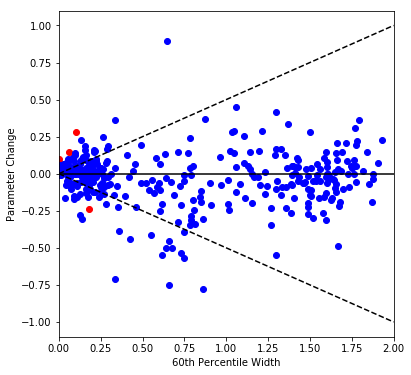

In [19]:
plt.figure(figsize=(6,6))
count=0
totalcount=0
for i in range(numspecies):
    for j in range(numspecies):
        if i!=j:
            if np.median(paramdict8[phylogeny[i]][phylogeny[j]])!=0:
                width=np.percentile(paramdict8[phylogeny[i]][phylogeny[j]],80)-np.percentile(paramdict8[phylogeny[i]][phylogeny[j]],20)
                diff=np.median(paramdict8[phylogeny[i]][phylogeny[j]])-np.median(paramdict[phylogeny[i]][phylogeny[j]])
                if np.median(paramdict[phylogeny[i]][phylogeny[j]])>np.max(paramdict8[phylogeny[i]][phylogeny[j]]) or np.median(paramdict[phylogeny[i]][phylogeny[j]])<np.min(paramdict8[phylogeny[i]][phylogeny[j]]):
                    count+=1
                    plt.plot(width,diff,'ro')
                else:
                    plt.plot(width,diff,'bo')
                totalcount+=1
plt.plot([0,2],[0,1],color='k',linestyle='--')
plt.plot([0,2],[0,-1],color='k',linestyle='--')
plt.plot([0,2],[0,0],color='k')
plt.xlabel('60th Percentile Width')
plt.ylabel('Parameter Change')
plt.xlim(0,2)
print(1-(count/totalcount))
plt.show()
plt.close()

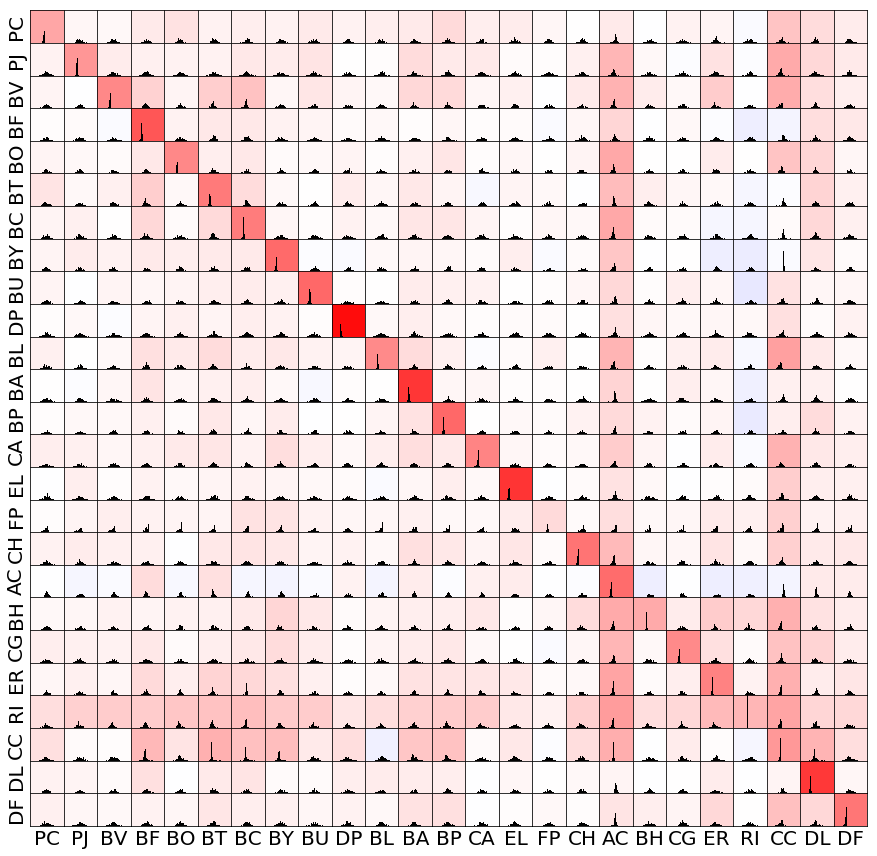

In [20]:
#Make a plot with a histogram for each interaction parameter
numspecies=25
interactions=plt.subplots(numspecies,numspecies,figsize=(15,15))
#create the color scale information for the interactions
dom=1
cmap=plt.get_cmap('bwr')
for i in range(numspecies):
    for j in range(numspecies): 
        data=paramdict[phylogeny[i]][phylogeny[j]]
        med=np.median(data)
        colorvalue=(med+dom)/(2*dom)
        col=cmap(1-colorvalue)
        interactions[1][i,j].set_facecolor(col)
        interactions[1][i,j].hist(data,color='k',bins=np.linspace(-dom,dom,50))
        interactions[1][i,j].set_xlim(-2,2)
        interactions[1][i,j].set_ylim(0,175)
        interactions[1][i,j].set_yticks([])
        interactions[1][i,j].set_xticks([])
        if j==0:
            interactions[1][i,j].set_ylabel(phylogeny[i],fontsize=20)
        if i==numspecies-1:
            interactions[1][i,j].set_xlabel(phylogeny[j],fontsize=20)
plt.subplots_adjust(wspace=0,hspace=0)
plt.savefig('RLC9_parameterdist.pdf')
plt.show()
plt.close()

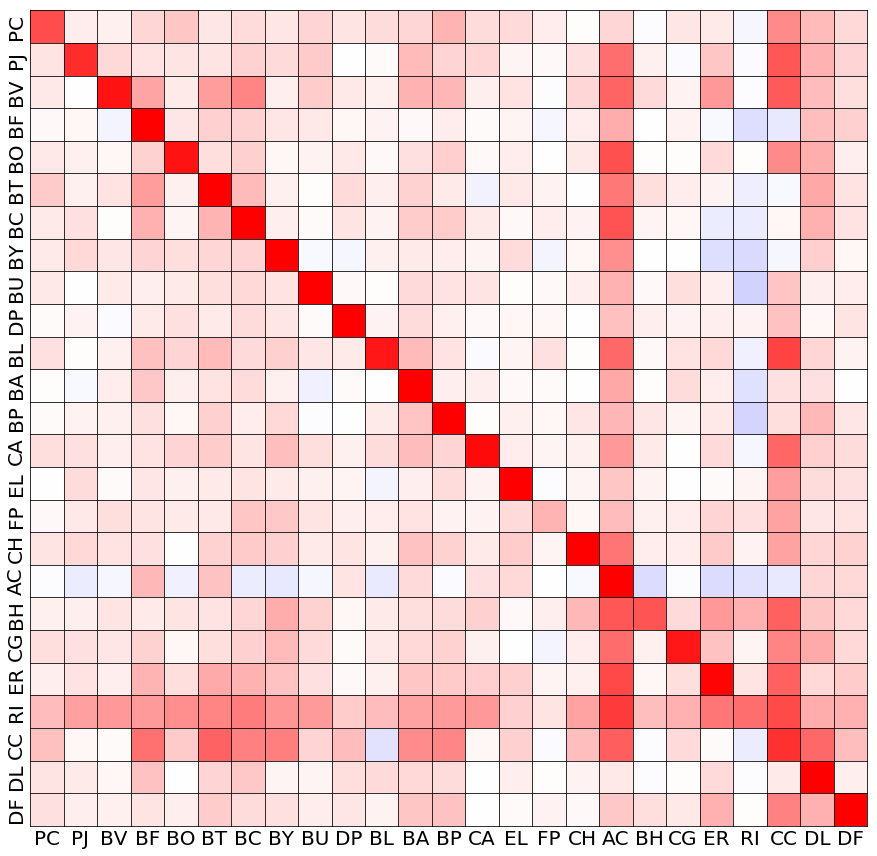

In [21]:
#Make a plot with a histogram for each interaction parameter
numspecies=25
interactions=plt.subplots(numspecies,numspecies,figsize=(15,15))
#create the color scale information for the interactions
dom=0.5
cmap=plt.get_cmap('bwr')
for i in range(numspecies):
    for j in range(numspecies): 
        data=paramdict[phylogeny[i]][phylogeny[j]]
        med=np.median(data)
        colorvalue=(med+dom)/(2*dom)
        col=cmap(1-colorvalue)
        interactions[1][i,j].set_facecolor(col)
        #interactions[1][i,j].hist(data,color='k',bins=np.linspace(-dom,dom,20))
        interactions[1][i,j].set_xlim(-2,2)
        interactions[1][i,j].set_ylim(0,175)
        interactions[1][i,j].set_yticks([])
        interactions[1][i,j].set_xticks([])
        if j==0:
            interactions[1][i,j].set_ylabel(phylogeny[i],fontsize=20)
        if i==numspecies-1:
            interactions[1][i,j].set_xlabel(phylogeny[j],fontsize=20)
plt.subplots_adjust(wspace=0,hspace=0)
plt.savefig('RLC9_parameterdist_NoHist.pdf')
plt.show()
plt.close()

In [22]:
print('Net Lactate')
for species in phylogeny:
    if abs(cleanDF[cleanDF['Treatment']==species]['Lactate'].mean()-28)>10:
        print(species+': '+str(cleanDF[cleanDF['Treatment']==species]['Lactate'].mean()-28)+'mM Lactate')
print('Acetate')
for species in phylogeny:
    if cleanDF[cleanDF['Treatment']==species]['Acetate'].mean()>10:
        print(species+': '+str(cleanDF[cleanDF['Treatment']==species]['Acetate'].mean())+'mM Acetate')
print('Succinate')
for species in phylogeny:
    if cleanDF[cleanDF['Treatment']==species]['Succinate'].mean()>10:
        print(species+': '+str(cleanDF[cleanDF['Treatment']==species]['Succinate'].mean())+'mM Succinate')

Net Lactate
BY: 22.54453750000001mM Lactate
BU: 14.203985714285707mM Lactate
DP: -17.563074999999998mM Lactate
BL: 13.324919999999999mM Lactate
BA: 18.047357142857145mM Lactate
BP: 24.32547142857144mM Lactate
ER: 17.619752941176472mM Lactate
CC: 22.366459090909096mM Lactate
Acetate
PC: 23.205871428571424mM Acetate
PJ: 17.4304mM Acetate
BV: 19.815942857142858mM Acetate
BF: 21.300216666666667mM Acetate
BO: 19.179485714285715mM Acetate
BT: 20.064014285714286mM Acetate
BC: 20.43435714285714mM Acetate
BY: 33.7169125mM Acetate
BU: 23.40424285714286mM Acetate
DP: 17.727375mM Acetate
BL: 46.61373999999999mM Acetate
BA: 40.43535714285714mM Acetate
BP: 52.278214285714284mM Acetate
CH: 15.611483333333334mM Acetate
BH: 29.33203333333334mM Acetate
CG: 33.96475mM Acetate
CC: 26.062495454545452mM Acetate
DL: 43.28296666666666mM Acetate
DF: 30.743824999999998mM Acetate
Succinate
PC: 44.3125mM Succinate
PJ: 23.279357142857144mM Succinate
BV: 28.168200000000002mM Succinate
BF: 22.865416666666665mM Succi

## Check Fit to Monospecies Growth Curves

In [23]:
u=[]
for species in phylogeny:
    u.append(np.median(paramdict[species]['r']))
A=np.zeros((len(phylogeny),len(phylogeny)))
for i in range(len(phylogeny)):
    A[i,i]=np.median(paramdict[phylogeny[i]][phylogeny[i]])

In [24]:
def runLV2(x_vector, u_vector, a_vector, t_max=72, steps=1000):
    
    def dX_dt(x_vector, t=0, u_vector=None, a_vector=None):
        new_x_vector = np.zeros(len(x_vector))
        for i in range(len(x_vector)):
            new_x_vector[i] = x_vector[i] * (u_vector[i] + np.sum([a_vector[i][j] * x_vector[j] for j in range(len(x_vector))]))
        return new_x_vector

    t=np.linspace(0, t_max, steps)
    X0 = x_vector
    X = sp.integrate.odeint(dX_dt, X0, t, args=(u_vector, a_vector))
    return X

In [25]:
DF1=pd.read_csv('../../Datasets/Monospecies Growth Curves/GrowthCurveDF1.csv',index_col=0)
DF2=pd.read_csv('../../Datasets/Monospecies Growth Curves/GrowthCurveDF2.csv',index_col=0)
subDF1=DF1[DF1.Species.isin(['ER','AC','CC','EL','CH','DP','BH','PC','PJ','CG','BF','BO','BT','BV','BC','BY','DF','BL','BA'])]
subDF2=DF2[DF2.Species.isin(['RI','CA','DL','BU','BP','PC'])]
for z in list(subDF2.index.values):
    if subDF2.at[z,'Rep']==1:
        subDF2.at[z,'Rep']==7
    elif subDF2.at[z,'Rep']==2:
        subDF2.at[z,'Rep']==8
    elif subDF2.at[z,'Rep']==3:
        subDF2.at[z,'Rep']==9
DF=pd.concat([subDF1,subDF2])
DF['OD']=0.6161*DF['OD']

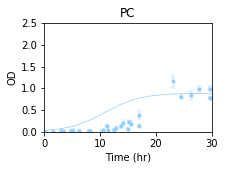

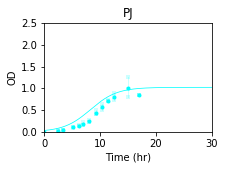

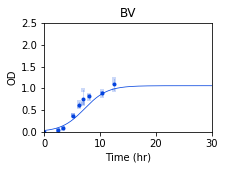

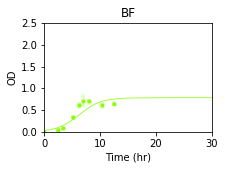

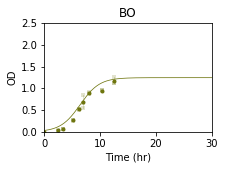

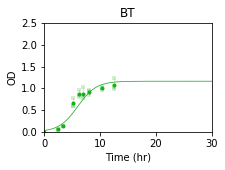

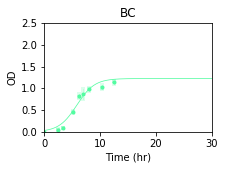

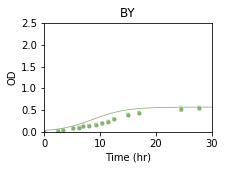

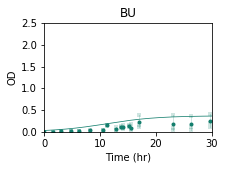

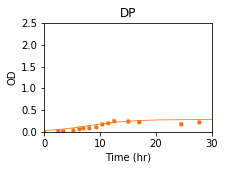

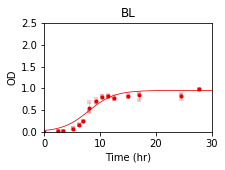

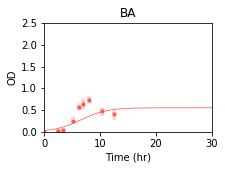

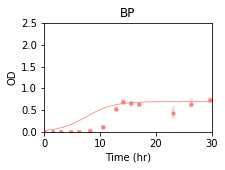

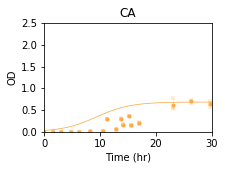

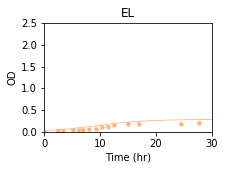

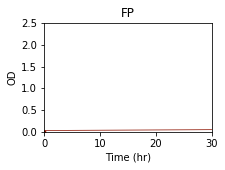

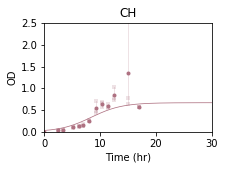

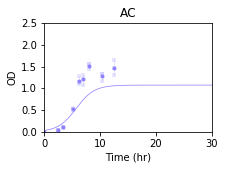

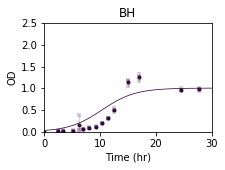

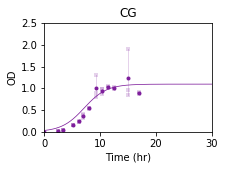

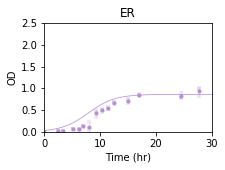

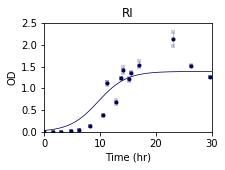

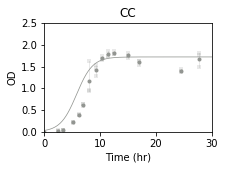

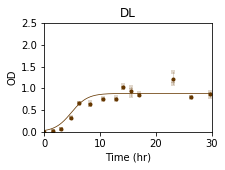

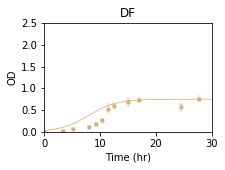

In [26]:
a=1
l=0.75
m=4
phylogeny1=[]
for k in range(9):
    phylogeny1.append(phylogeny[k])
phylogeny2=[]
for k in range(9,15):
    phylogeny2.append(phylogeny[k])
phylogeny3=[]
for k in range(15,25):
    phylogeny3.append(phylogeny[k])
q=0
for species in phylogeny1:
    plt.figure(figsize=(3,2))
    tempDF=DF[DF['Species']==species]
    times=[]
    ODs=[]
    ODlists=[]
    if 0 not in sorted(list(set(tempDF['Time (hr)']))):
        times.append(0)
        ODs.append(0.0066)
        ODlists.append([0.0066])
    for time in sorted(list(set(tempDF['Time (hr)']))):
        times.append(time)
        ODs.append(np.mean(tempDF[tempDF['Time (hr)']==time]['OD']))
        ODlists.append(list(tempDF[tempDF['Time (hr)']==time]['OD']))
    plt.plot(times,ODs,color=colordict[species],linestyle='',marker='o',alpha=a,markeredgewidth=0,markersize=m)
    for k in range(len(times)):
        measurements=ODlists[k]
        plt.plot([times[k] for i in range(len(measurements))],measurements,marker='s',markersize=4,alpha=0.2,color=colordict[species],markeredgewidth=0,linewidth=1)
    x_vector=np.zeros(len(phylogeny))
    x_vector[q]=0.03
    X=runLV2(x_vector,u,A,t_max=30)
    plt.plot(np.linspace(0,30,1000),X[:,q],color=colordict[species],linewidth=l)
    q+=1
    plt.xlim(0,30)
    plt.ylim(0,2.5)
    plt.xlabel('Time (hr)')
    plt.ylabel('OD')
    plt.title(species)
    plt.show()
    plt.close()
for species in phylogeny2:
    plt.figure(figsize=(3,2))
    tempDF=DF[DF['Species']==species]
    times=[]
    ODs=[]
    ODlists=[]
    if 0 not in sorted(list(set(tempDF['Time (hr)']))):
        times.append(0)
        ODs.append(0.0066)
        ODlists.append([0.0066])
    for time in sorted(list(set(tempDF['Time (hr)']))):
        times.append(time)
        ODs.append(np.mean(tempDF[tempDF['Time (hr)']==time]['OD']))
        ODlists.append(list(tempDF[tempDF['Time (hr)']==time]['OD']))
    plt.plot(times,ODs,color=colordict[species],linestyle='',marker='o',alpha=a,markeredgewidth=0,markersize=m)
    for k in range(len(times)):
        measurements=ODlists[k]
        plt.plot([times[k] for i in range(len(measurements))],measurements,marker='s',markersize=4,alpha=0.2,color=colordict[species],markeredgewidth=0,linewidth=1)
    x_vector=np.zeros(len(phylogeny))
    x_vector[q]=0.03
    X=runLV2(x_vector,u,A,t_max=30)
    plt.plot(np.linspace(0,30,1000),X[:,q],color=colordict[species],linewidth=l)
    q+=1
    plt.xlim(0,30)
    plt.ylim(0,2.5)
    plt.xlabel('Time (hr)')
    plt.ylabel('OD')
    plt.title(species)
    plt.show()
    plt.close()
for species in phylogeny3:
    plt.figure(figsize=(3,2))
    tempDF=DF[DF['Species']==species]
    times=[]
    ODs=[]
    ODlists=[]
    if 0 not in sorted(list(set(tempDF['Time (hr)']))):
        times.append(0)
        ODs.append(0.0066)
        ODlists.append([0.0066])
    for time in sorted(list(set(tempDF['Time (hr)']))):
        times.append(time)
        ODs.append(np.mean(tempDF[tempDF['Time (hr)']==time]['OD']))
        ODlists.append(list(tempDF[tempDF['Time (hr)']==time]['OD']))
    plt.plot(times,ODs,color=colordict[species],linestyle='',marker='o',alpha=a,markeredgewidth=0,markersize=m)
    for k in range(len(times)):
        measurements=ODlists[k]
        plt.plot([times[k] for i in range(len(measurements))],measurements,marker='s',markersize=4,alpha=0.2,color=colordict[species],markeredgewidth=0,linewidth=1)
    x_vector=np.zeros(len(phylogeny))
    x_vector[q]=0.03
    X=runLV2(x_vector,u,A,t_max=30)
    plt.plot(np.linspace(0,30,1000),X[:,q],color=colordict[species],linewidth=l)
    q+=1
    plt.xlim(0,30)
    plt.ylim(0,2.5)
    plt.xlabel('Time (hr)')
    plt.ylabel('OD')
    plt.title(species)
    plt.show()
    plt.close()

## Generate New Butyrate Predictions

In [27]:
from pickle import load
clf = load(open('2020_05_14_model.pkl', 'rb'))
scaler = load(open('2020_05_14_scaler.pkl','rb'))

In [28]:
colnames=[]
for species in phylogeny:
    colnames.append(species+' OD')
variables=[]
for species in bpbspecies:
    variables.append(species)
    variables.append(species+' OD')
variablesint=variables.copy()
for i in range(len(phylogeny)):
    for j in range(len(phylogeny)):
        if i>j:
            if phylogeny[i] in bpbspecies or phylogeny[j] in bpbspecies:
                variablesint.append(phylogeny[i]+' OD*'+phylogeny[j]+' OD')
                variablesint.append(phylogeny[i]+'*'+phylogeny[j])
                variablesint.append(phylogeny[i]+' OD*'+phylogeny[j])
                variablesint.append(phylogeny[i]+'*'+phylogeny[j]+' OD')
for community in trainingset+predictionset+LOOComms:
    specieslist=community.split('-')
    mystring=''
    for species in specieslist:
        mystring=mystring+'_'+str(phylogenyvectorDict[species]+1)
    mystring=mystring+'.csv'
    DF=pd.read_csv('RLC9_Simulations_FixedPrior/'+mystring,names=colnames)
    for species in phylogeny:
        if species in specieslist:
            DF[species]=1
        else:
            DF[species]=0
    X=DF[variables]
    for i in range(len(phylogeny)):
        for j in range(len(phylogeny)):
            if i>j:
                if phylogeny[i] in bpbspecies or phylogeny[j] in bpbspecies:
                    X[phylogeny[i]+' OD*'+phylogeny[j]+' OD']=DF[phylogeny[i]+' OD']*DF[phylogeny[j]+' OD']
                    X[phylogeny[i]+'*'+phylogeny[j]]=DF[phylogeny[i]]*DF[phylogeny[j]]
                    X[phylogeny[i]+' OD*'+phylogeny[j]]=DF[phylogeny[i]+' OD']*DF[phylogeny[j]]
                    X[phylogeny[i]+'*'+phylogeny[j]+' OD']=DF[phylogeny[i]]*DF[phylogeny[j]+' OD']
    X=pd.DataFrame(scaler.transform(X))
    butyrate=clf.predict(X)
    DF['Butyrate']=butyrate
    DF.to_csv('RLC9_Simulations_FixedPrior/'+community+'.csv')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [29]:
#Make Butyrate Predictions for cleanDF
usedDF=cleanDF
variables=[]
for species in bpbspecies:
    variables.append(species)
    variables.append(species+' OD')
variablesint=variables
X=usedDF[variables]
for i in range(len(phylogeny)):
    for j in range(len(phylogeny)):
        if i>j:
            if phylogeny[i] in bpbspecies or phylogeny[j] in bpbspecies:
                X[phylogeny[i]+' OD*'+phylogeny[j]+' OD']=usedDF[phylogeny[i]+' OD']*usedDF[phylogeny[j]+' OD']
                variablesint.append(phylogeny[i]+' OD*'+phylogeny[j]+' OD')
                X[phylogeny[i]+'*'+phylogeny[j]]=usedDF[phylogeny[i]]*usedDF[phylogeny[j]]
                variablesint.append(phylogeny[i]+'*'+phylogeny[j])
                X[phylogeny[i]+' OD*'+phylogeny[j]]=usedDF[phylogeny[i]+' OD']*usedDF[phylogeny[j]]
                variablesint.append(phylogeny[i]+' OD*'+phylogeny[j])
                X[phylogeny[i]+'*'+phylogeny[j]+' OD']=usedDF[phylogeny[i]]*usedDF[phylogeny[j]+' OD']
                variablesint.append(phylogeny[i]+'*'+phylogeny[j]+' OD')
X=pd.DataFrame(scaler.transform(X))
butyrate=clf.predict(X)
cleanDF['PredictedButyrate']=butyrate

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

## Make plot of Goodness of Fit to Training Data

ALL
y=0.9992099900806322x+-1.0255608535979412, r=0.9091683451585773, p=3.2000613839626136e-159
rho=0.9088173347275343, p=6.83493055859997e-159


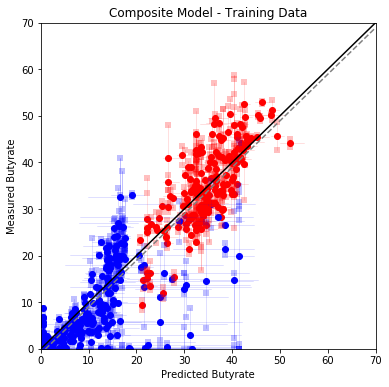

In [30]:
plt.figure(figsize=(6,6))
xall=[]
yall=[]
for community in trainingset:
    if 'AC' in community:
        color='r'
    else:
        color='b'
    tempDF=pd.read_csv('RLC9_Simulations_FixedPrior/'+community+'.csv',index_col=0)
    x=tempDF['Butyrate'].median()
    x80=np.percentile(tempDF['Butyrate'],80)
    x20=np.percentile(tempDF['Butyrate'],20)
    y=cleanDF[cleanDF['Treatment']==community]['Butyrate']
    plt.scatter(x,y.mean(),color=color)
    plt.plot([x for i in range(len(list(y)))],list(y),marker='s',alpha=0.25,linewidth=0.5,color=color,markeredgewidth=0)
    plt.plot([x20,x80],[y.mean(),y.mean()],alpha=0.25,linewidth=0.5,color=color)
    xall.append(x)
    yall.append(y.mean())
m,b,R,p,stderr=stats.linregress(xall,yall)
rho,p_spearman=stats.spearmanr(xall,yall)
print('ALL')
print('y='+str(m)+'x+'+str(b)+', r='+str(R)+', p='+str(p))
print('rho='+str(rho)+', p='+str(p_spearman))
z=np.linspace(-70,70,1000)
plt.plot(z,m*z+b,linestyle='dashed',color='grey')
plt.title('Composite Model - Training Data')
plt.xlabel('Predicted Butyrate')
plt.ylabel('Measured Butyrate')
plt.plot([0,70],[0,70],color='k')
plt.xlim(0,70)
plt.ylim(0,70)
plt.show()
plt.close()

ALL
y=0.9893809266213189x+-4.577415367761095, r=0.8575713689508909, p=1.4123348127743443e-44
rho=0.863754712436194, p=6.718360176319337e-46


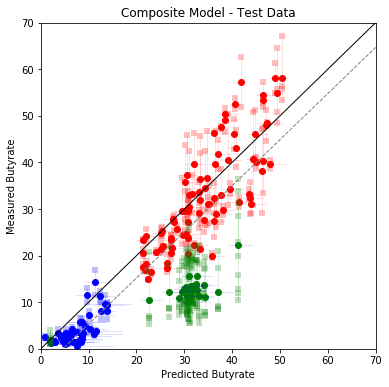

In [31]:
plt.figure(figsize=(6,6))
xall=[]
yall=[]
for community in predictionset:
    if 'AC' in community:
        color='r'
    else:
        color='b'
    tempDF=pd.read_csv('RLC9_Simulations_FixedPrior/'+community+'.csv',index_col=0)
    x=tempDF['Butyrate'].median()
    x80=np.percentile(tempDF['Butyrate'],80)
    x20=np.percentile(tempDF['Butyrate'],20)
    y=cleanDF[cleanDF['Treatment']==community]['Butyrate']
    plt.scatter(x,y.mean(),color=color)
    plt.plot([x for i in range(len(list(y)))],list(y),marker='s',alpha=0.25,linewidth=0.5,color=color,markeredgewidth=0)
    plt.plot([x20,x80],[y.mean(),y.mean()],alpha=0.25,linewidth=0.5,color=color)
    xall.append(x)
    yall.append(y.mean())
for species in phylogeny:
    mystring=''
    for each in phylogeny:
        if each!=species:
            if mystring=='':
                mystring=each
            else:
                mystring=mystring+'-'+each
    tempDF=pd.read_csv('RLC9_Simulations_FixedPrior/'+mystring+'.csv',index_col=0)
    x=tempDF['Butyrate'].median()
    x80=np.percentile(tempDF['Butyrate'],80)
    x20=np.percentile(tempDF['Butyrate'],20)
    y=cleanDF[cleanDF['Treatment']=='COMM6*'+species]['Butyrate']
    plt.scatter(x,y.mean(),color='g')
    plt.plot([x for i in range(len(list(y)))],list(y),marker='s',alpha=0.25,linewidth=0.5,color='g',markeredgewidth=0)
    plt.plot([x20,x80],[y.mean(),y.mean()],alpha=0.25,linewidth=0.5,color=color)
    xall.append(x)
    yall.append(y.mean())
mystring=''
for each in phylogeny:
    if mystring=='':
        mystring=each
    else:
        mystring=mystring+'-'+each
tempDF=pd.read_csv('RLC9_Simulations_FixedPrior/'+mystring+'.csv',index_col=0)
x=tempDF['Butyrate'].median()
x80=np.percentile(tempDF['Butyrate'],80)
x20=np.percentile(tempDF['Butyrate'],20)
y=cleanDF[cleanDF['Treatment']=='COMM6']['Butyrate']
plt.scatter(x,y.mean(),color='g')
plt.plot([x for i in range(len(list(y)))],list(y),marker='s',alpha=0.25,linewidth=0.5,color='g',markeredgewidth=0)
plt.plot([x20,x80],[y.mean(),y.mean()],alpha=0.25,linewidth=0.5,color=color)
xall.append(x)
yall.append(y.mean())
m,b,R,p,stderr=stats.linregress(xall,yall)
rho,p_spearman=stats.spearmanr(xall,yall)
print('ALL')
print('y='+str(m)+'x+'+str(b)+', r='+str(R)+', p='+str(p))
print('rho='+str(rho)+', p='+str(p_spearman))
z=np.linspace(-70,70,1000)
plt.plot(z,m*z+b,linestyle='dashed',color='grey',linewidth=1)
plt.title('Composite Model - Test Data')
plt.xlabel('Predicted Butyrate')
plt.ylabel('Measured Butyrate')
plt.plot([0,70],[0,70],color='k',linewidth=1)
plt.xlim(0,70)
plt.ylim(0,70)
plt.savefig('CompositeModelPredictedVSMeasured.pdf')
plt.show()
plt.close()

ALL
y=1.1699081152548008x+-9.681857604325751, r=0.7736799045389053, p=3.907261150989844e-31
rho=0.35665861237690605, p=7.469778855772899e-06


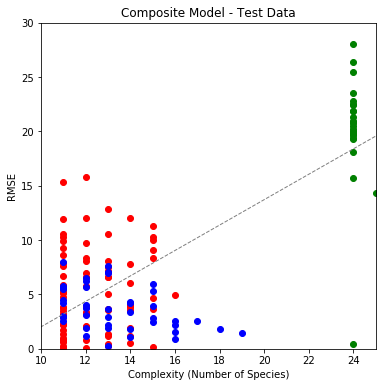

In [55]:
plt.figure(figsize=(6,6))
xall=[]
yall=[]
for community in predictionset:
    if 'AC' in community:
        color='r'
    else:
        color='b'
    tempDF=pd.read_csv('RLC9_Simulations_FixedPrior/'+community+'.csv',index_col=0)
    x=tempDF['Butyrate'].median()
    y=cleanDF[cleanDF['Treatment']==community]['Butyrate'].median()
    rmse=((x-y)**2)**0.5
    nspecies=len(community.split('-'))
    plt.scatter(nspecies,rmse,color=color)
    xall.append(nspecies)
    yall.append(rmse)
for species in phylogeny:
    mystring=''
    for each in phylogeny:
        if each!=species:
            if mystring=='':
                mystring=each
            else:
                mystring=mystring+'-'+each
    tempDF=pd.read_csv('RLC9_Simulations_FixedPrior/'+mystring+'.csv',index_col=0)
    x=tempDF['Butyrate'].median()
    y=cleanDF[cleanDF['Treatment']=='COMM6*'+species]['Butyrate'].median()
    rmse=((x-y)**2)**0.5
    nspecies=24
    plt.scatter(nspecies,rmse,color='g')
    xall.append(nspecies)
    yall.append(rmse)
mystring=''
for each in phylogeny:
    if mystring=='':
        mystring=each
    else:
        mystring=mystring+'-'+each
tempDF=pd.read_csv('RLC9_Simulations_FixedPrior/'+mystring+'.csv',index_col=0)
x=tempDF['Butyrate'].median()
y=cleanDF[cleanDF['Treatment']=='COMM6']['Butyrate'].median()
rmse=((x-y)**2)**0.5
nspecies=25
plt.scatter(nspecies,rmse,color='g')
xall.append(nspecies)
yall.append(rmse)
m,b,R,p,stderr=stats.linregress(xall,yall)
rho,p_spearman=stats.spearmanr(xall,yall)
print('ALL')
print('y='+str(m)+'x+'+str(b)+', r='+str(R)+', p='+str(p))
print('rho='+str(rho)+', p='+str(p_spearman))
z=np.linspace(-70,70,1000)
plt.plot(z,m*z+b,linestyle='dashed',color='grey',linewidth=1)
plt.title('Composite Model - Test Data')
plt.xlabel('Complexity (Number of Species)')
plt.ylabel('RMSE')
plt.xlim(10,25)
plt.ylim(0,30)
plt.savefig('Butyrate_RMSEvsComplexity.pdf')
plt.show()
plt.close()

ALL
y=-0.23460376144974715x+7.804042359347731, r=-0.11975211722977873, p=0.18524728508491173
rho=-0.0854479156179529, p=0.3453749584466519


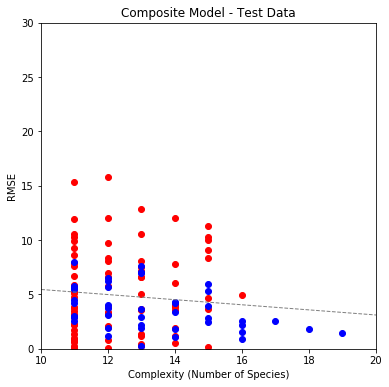

In [54]:
plt.figure(figsize=(6,6))
xall=[]
yall=[]
for community in predictionset:
    if 'AC' in community:
        color='r'
    else:
        color='b'
    tempDF=pd.read_csv('RLC9_Simulations_FixedPrior/'+community+'.csv',index_col=0)
    x=tempDF['Butyrate'].median()
    y=cleanDF[cleanDF['Treatment']==community]['Butyrate'].median()
    rmse=((x-y)**2)**0.5
    nspecies=len(community.split('-'))
    plt.scatter(nspecies,rmse,color=color)
    xall.append(nspecies)
    yall.append(rmse)
# for species in phylogeny:
#     mystring=''
#     for each in phylogeny:
#         if each!=species:
#             if mystring=='':
#                 mystring=each
#             else:
#                 mystring=mystring+'-'+each
#     tempDF=pd.read_csv('RLC9_Simulations_FixedPrior/'+mystring+'.csv',index_col=0)
#     x=tempDF['Butyrate'].mean()
#     y=cleanDF[cleanDF['Treatment']=='COMM6*'+species]['Butyrate'].mean()
#     rmse=((x-y)**2)**0.5
#     nspecies=24
#     plt.scatter(nspecies,rmse,color='g')
#     xall.append(nspecies)
#     yall.append(rmse)
# mystring=''
# for each in phylogeny:
#     if mystring=='':
#         mystring=each
#     else:
#         mystring=mystring+'-'+each
# tempDF=pd.read_csv('RLC9_Simulations_FixedPrior/'+mystring+'.csv',index_col=0)
# x=tempDF['Butyrate'].mean()
# y=cleanDF[cleanDF['Treatment']=='COMM6']['Butyrate'].mean()
# rmse=((x-y)**2)**0.5
# nspecies=25
# plt.scatter(nspecies,rmse,color='g')
# xall.append(nspecies)
# yall.append(rmse)
m,b,R,p,stderr=stats.linregress(xall,yall)
rho,p_spearman=stats.spearmanr(xall,yall)
print('ALL')
print('y='+str(m)+'x+'+str(b)+', r='+str(R)+', p='+str(p))
print('rho='+str(rho)+', p='+str(p_spearman))
z=np.linspace(-70,70,1000)
plt.plot(z,m*z+b,linestyle='dashed',color='grey',linewidth=1)
plt.title('Composite Model - Test Data')
plt.xlabel('Complexity (Number of Species)')
plt.ylabel('RMSE')
plt.xlim(10,20)
plt.ylim(0,30)
plt.savefig('Butyrate_RMSEvsComplexity_NoLOOs.pdf')
plt.show()
plt.close()

ALL
y=0.9910219386646575x+0.2507517954339562, r=0.9574941214101936, p=4.2008328378317234e-225
rho=0.9556822841565994, p=1.925818062952813e-221


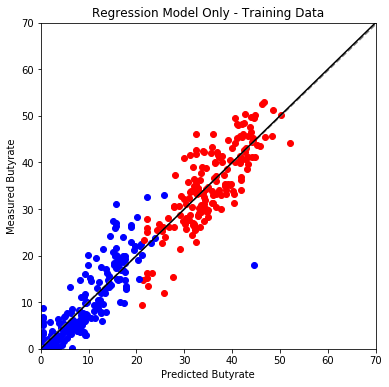

In [32]:
plt.figure(figsize=(6,6))
xall=[]
yall=[]
for community in trainingset:
    if 'AC' in community:
        color='r'
    else:
        color='b'
    x=cleanDF[cleanDF['Treatment']==community]['PredictedButyrate'].mean()
    y=cleanDF[cleanDF['Treatment']==community]['Butyrate'].mean()
    plt.scatter(x,y,color=color)
    if y>0:
        if x>50 and x/y>2:
            print(community)
    xall.append(x)
    yall.append(y)
m,b,R,p,stderr=stats.linregress(xall,yall)
rho,p_spearman=stats.spearmanr(xall,yall)
print('ALL')
print('y='+str(m)+'x+'+str(b)+', r='+str(R)+', p='+str(p))
print('rho='+str(rho)+', p='+str(p_spearman))
z=np.linspace(-70,70,1000)
plt.plot(z,m*z+b,linestyle='dashed',color='grey')
plt.title('Regression Model Only - Training Data')
plt.xlabel('Predicted Butyrate')
plt.ylabel('Measured Butyrate')
plt.plot([0,70],[0,70],color='k')
plt.xlim(0,70)
plt.ylim(0,70)
plt.show()
plt.close()

ALL
y=0.8916683895933848x+-2.0697104286970287, r=0.8552956802304706, p=4.17932035281382e-44
rho=0.8443067196827371, p=6.138185423434406e-42


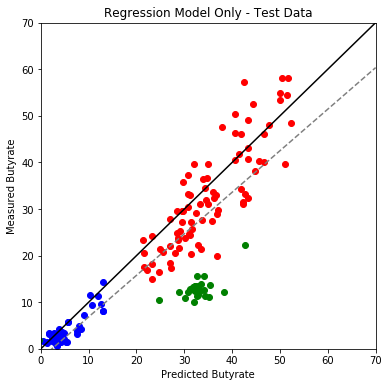

In [33]:
plt.figure(figsize=(6,6))
xall=[]
yall=[]
for community in predictionset:
    if 'AC' in community:
        color='r'
    else:
        color='b'
    x=cleanDF[cleanDF['Treatment']==community]['PredictedButyrate'].mean()
    y=cleanDF[cleanDF['Treatment']==community]['Butyrate'].mean()
    plt.scatter(x,y,color=color)
    if y>0:
        if x>50 and x/y>2:
            print(community)
    xall.append(x)
    yall.append(y)
for species in phylogeny:
    x=cleanDF[cleanDF['Treatment']=='COMM6*'+species]['PredictedButyrate'].mean()
    y=cleanDF[cleanDF['Treatment']=='COMM6*'+species]['Butyrate'].mean()
    plt.scatter(x,y,color='g')
    xall.append(x)
    yall.append(y)
x=cleanDF[cleanDF['Treatment']=='COMM6']['PredictedButyrate'].mean()
y=cleanDF[cleanDF['Treatment']=='COMM6']['Butyrate'].mean()
plt.scatter(x,y,color='g')
xall.append(x)
yall.append(y)
m,b,R,p,stderr=stats.linregress(xall,yall)
rho,p_spearman=stats.spearmanr(xall,yall)
print('ALL')
print('y='+str(m)+'x+'+str(b)+', r='+str(R)+', p='+str(p))
print('rho='+str(rho)+', p='+str(p_spearman))
z=np.linspace(-70,70,1000)
plt.plot(z,m*z+b,linestyle='dashed',color='grey')
plt.title('Regression Model Only - Test Data')
plt.xlabel('Predicted Butyrate')
plt.ylabel('Measured Butyrate')
plt.plot([0,70],[0,70],color='k')
plt.xlim(0,70)
plt.ylim(0,70)
plt.show()
plt.close()

y=0.9419801574134558x+0.04232138942585412, r=0.8758434318296114, p=0.0
rho=0.8683184212939072, p=0.0


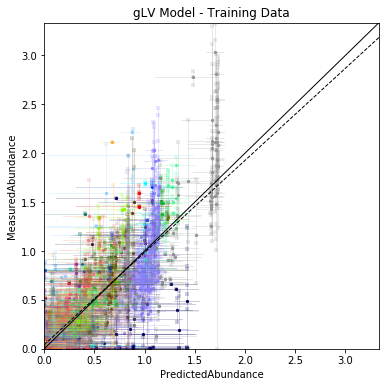

In [34]:
pct=60
colnames=[]
for species in phylogeny:
    colnames.append(species)
colnames.append('Butyrate')
plt.figure(figsize=(6,6))
allpredictions=[]
allmeasurements=[]
for community in trainingset:
    subDF=pd.read_csv('RLC9_Simulations_FixedPrior/'+community+'.csv',index_col=0)
    specieslist=community.split('-')
    for species in specieslist:
        prediction=subDF[species+' OD'].median()
        x20=np.percentile(subDF[species+' OD'],20)
        x80=np.percentile(subDF[species+' OD'],80)
        measurements=list(cleanDF[cleanDF['Treatment']==community][species+' OD'])
        plt.scatter(prediction,np.mean(measurements),color=colordict[species],s=5)
        plt.plot([prediction for i in range(len(measurements))],measurements,marker='s',markersize=4,alpha=0.2,color=colordict[species],markeredgewidth=0,linewidth=1)
        plt.plot([x20,x80],[np.mean(measurements),np.mean(measurements)],alpha=0.2,color=colordict[species],linewidth=1)
        allpredictions.append(prediction)
        allmeasurements.append(np.mean(measurements))
x=allpredictions
y=allmeasurements
m,b,R,p,stderr=stats.linregress(x,y)
print('y='+str(m)+'x+'+str(b)+', r='+str(R)+', p='+str(p))
rho,p_spearman=stats.spearmanr(x,y)
print('rho='+str(rho)+', p='+str(p_spearman))
z=np.linspace(0,1.1*max(x+y),1000)
plt.plot(z,m*z+b,linestyle='dashed',color='k',linewidth=1)
plt.plot([0,10],[0,10],color='k',linewidth=1)
plt.xlim(0,1.1*max(x+y))
plt.ylim(0,1.1*max(x+y))
plt.title('gLV Model - Training Data')
plt.xlabel('PredictedAbundance')
plt.ylabel('MeasuredAbundance')
plt.savefig('RLC9_Trainingset_Posterior.png',dpi=2000)
plt.show()
plt.close()

y=0.64624606774598x+0.06918058036973757, r=0.8086598491931578, p=0.0
rho=0.8187063130420035, p=0.0


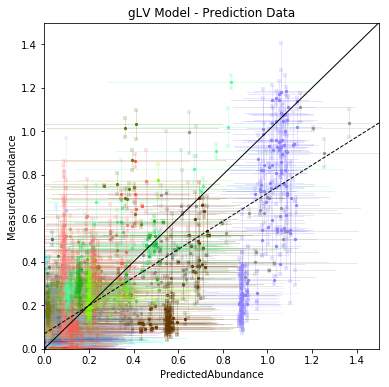

In [35]:
colnames=[]
for species in phylogeny:
    colnames.append(species)
colnames.append('Butyrate')
plt.figure(figsize=(6,6))
allpredictions=[]
allmeasurements=[]
for community in predictionset:
    subDF=pd.read_csv('RLC9_Simulations_FixedPrior/'+community+'.csv',index_col=0)
    specieslist=community.split('-')
    for species in specieslist:
        prediction=subDF[species+' OD'].median()
        x20=np.percentile(subDF[species+' OD'],20)
        x80=np.percentile(subDF[species+' OD'],80)
        measurements=list(cleanDF[cleanDF['Treatment']==community][species+' OD'])
        plt.scatter(prediction,np.mean(measurements),color=colordict[species],s=5)
        plt.plot([prediction for i in range(len(measurements))],measurements,marker='s',markersize=4,alpha=0.2,color=colordict[species],markeredgewidth=0,linewidth=1)
        plt.plot([x20,x80],[np.mean(measurements),np.mean(measurements)],alpha=0.2,color=colordict[species],linewidth=1)
        allpredictions.append(prediction)
        allmeasurements.append(np.mean(measurements))
for species in phylogeny:
    mystring=''
    for each in phylogeny:
        if each!=species:
            if mystring=='':
                mystring=each
            else:
                mystring=mystring+'-'+each
    tempDF=pd.read_csv('RLC9_Simulations_FixedPrior/'+mystring+'.csv',index_col=0)
    for each in phylogeny:
        if species!=each:
            prediction=tempDF[each+' OD'].median()
            x80=np.percentile(tempDF[each+' OD'],80)
            x20=np.percentile(tempDF[each+' OD'],20)
            measurements=cleanDF[cleanDF['Treatment']=='COMM6*'+species][each+' OD']
            plt.scatter(prediction,np.mean(measurements),color=colordict[each],s=5)
            plt.plot([prediction for i in range(len(measurements))],measurements,marker='s',markersize=4,alpha=0.2,color=colordict[each],markeredgewidth=0,linewidth=1)
            plt.plot([x20,x80],[np.mean(measurements),np.mean(measurements)],alpha=0.2,linewidth=0.5,color=colordict[each])
            allpredictions.append(prediction)
            allmeasurements.append(np.mean(measurements))
mystring=''
for each in phylogeny:
    if mystring=='':
        mystring=each
    else:
        mystring=mystring+'-'+each
subDF=pd.read_csv('RLC9_Simulations_FixedPrior/'+mystring+'.csv',index_col=0)
for each in phylogeny:
    prediction=tempDF[each+' OD'].median()
    x80=np.percentile(tempDF[each+' OD'],80)
    x20=np.percentile(tempDF[each+' OD'],20)
    measurements=cleanDF[cleanDF['Treatment']=='COMM6'][each+' OD']
    plt.scatter(prediction,np.mean(measurements),color=colordict[each],s=5)
    plt.plot([prediction for i in range(len(measurements))],measurements,marker='s',markersize=4,alpha=0.2,color=colordict[each],markeredgewidth=0,linewidth=1)
    plt.plot([x20,x80],[np.mean(measurements),np.mean(measurements)],alpha=0.2,linewidth=0.5,color=colordict[each])
    allpredictions.append(prediction)
    allmeasurements.append(np.mean(measurements))
x=allpredictions
y=allmeasurements
m,b,R,p,stderr=stats.linregress(x,y)
print('y='+str(m)+'x+'+str(b)+', r='+str(R)+', p='+str(p))
rho,p_spearman=stats.spearmanr(x,y)
print('rho='+str(rho)+', p='+str(p_spearman))
z=np.linspace(0,1.1*max(x+y),1000)
plt.plot(z,m*z+b,linestyle='dashed',color='k',linewidth=1)
plt.plot([0,10],[0,10],color='k',linewidth=1)
plt.xlim(0,1.1*max(x+y))
plt.ylim(0,1.1*max(x+y))
plt.title('gLV Model - Prediction Data')
plt.xlabel('PredictedAbundance')
plt.ylabel('MeasuredAbundance')
plt.savefig('RLC9_Predictionset_Prior.png',dpi=2000)
plt.show()
plt.close()

y=-0.0037895712854173038x+0.08610037459796276, r=-0.24934280171372913, p=0.002165306234768881
rho=-0.11355569721820712, p=0.16792102411028947


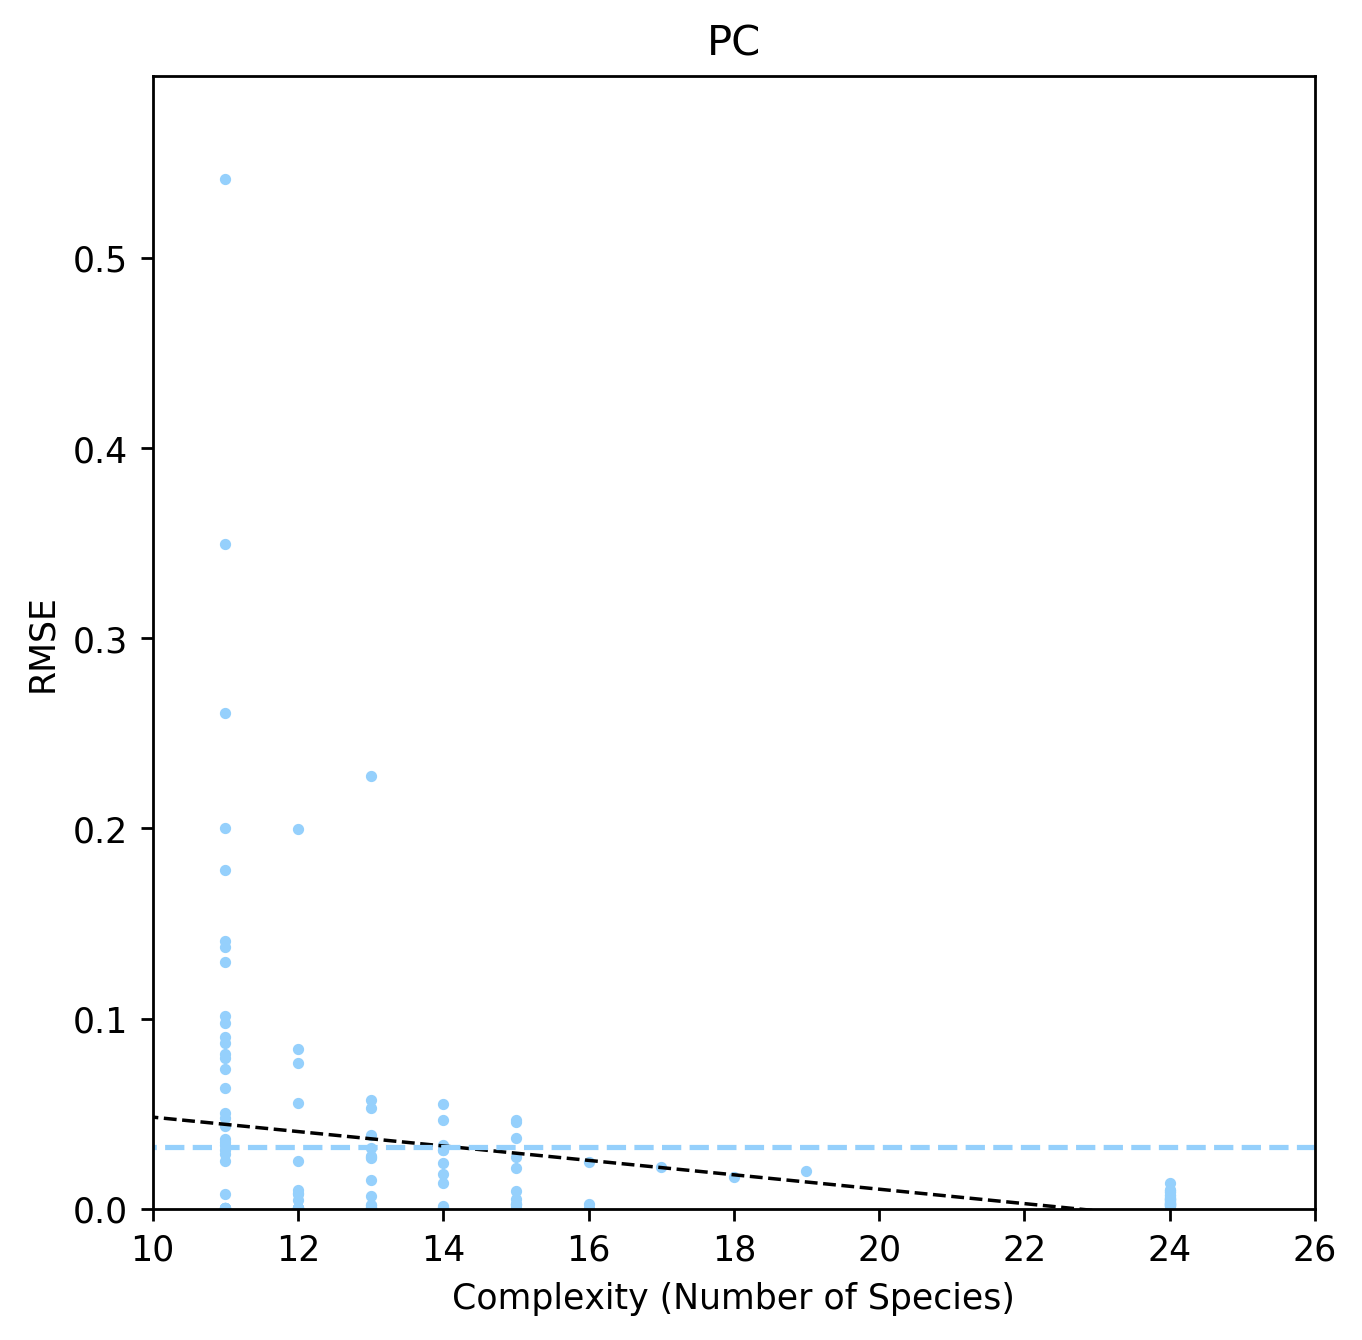

y=-0.0020467880832019955x+0.06836735856730618, r=-0.16712763207150255, p=0.04162767490579049
rho=-0.17006467774329873, p=0.03812104509307973


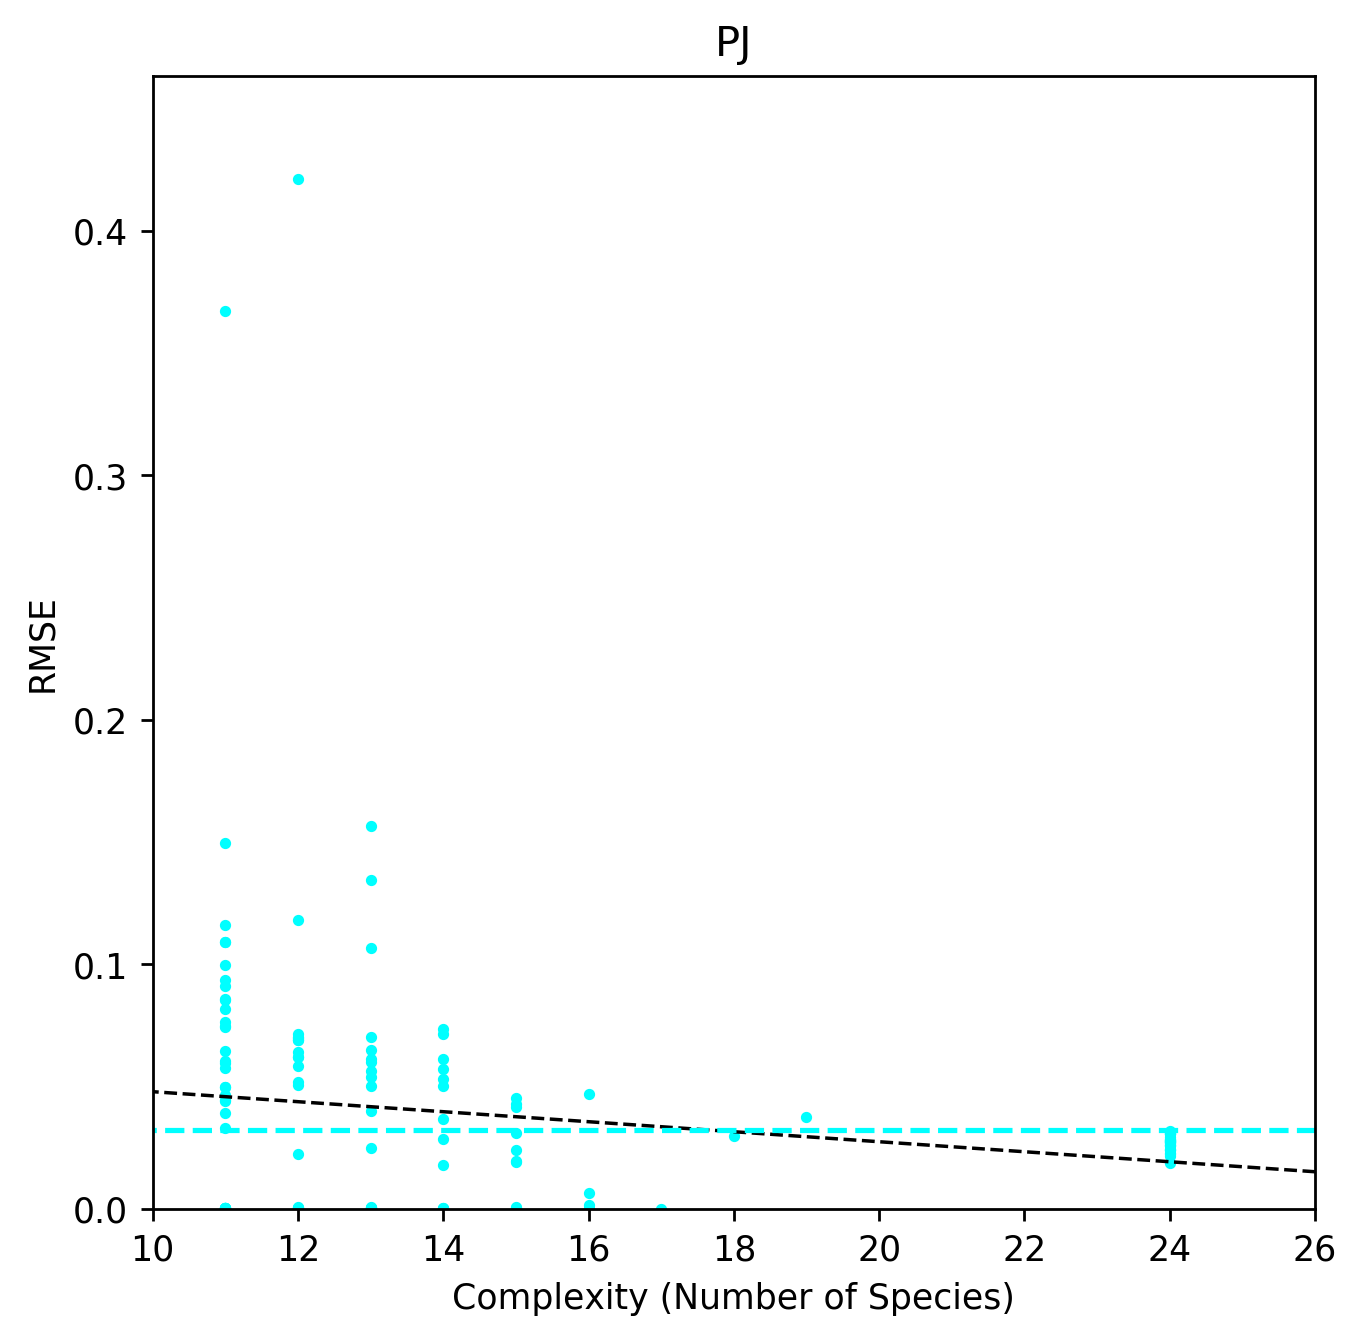

y=-0.0007042546257805636x+0.038717508432482964, r=-0.08047525270044993, p=0.3292448034654758
rho=0.16085385568303465, p=0.05002897952418426


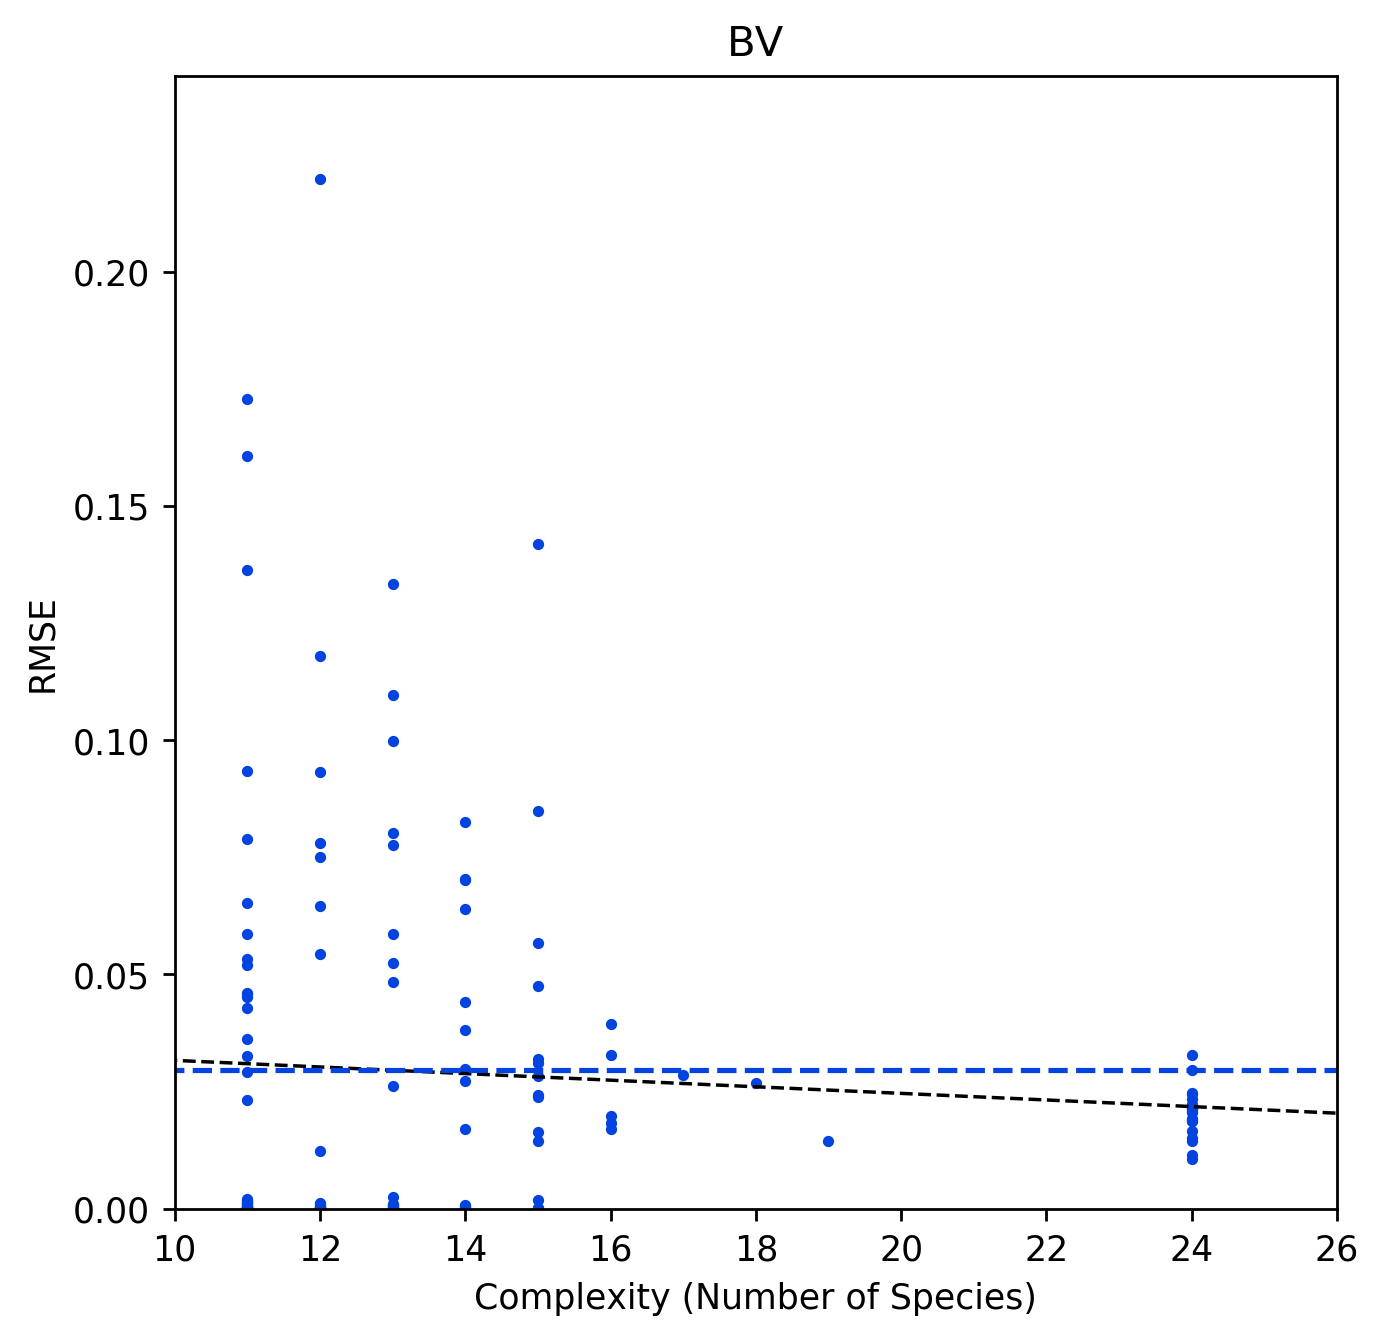

y=0.002223868344210521x+-0.014810118232258331, r=0.22513636170734094, p=0.0057708158634480235
rho=0.5661741939375403, p=5.272817227364318e-14


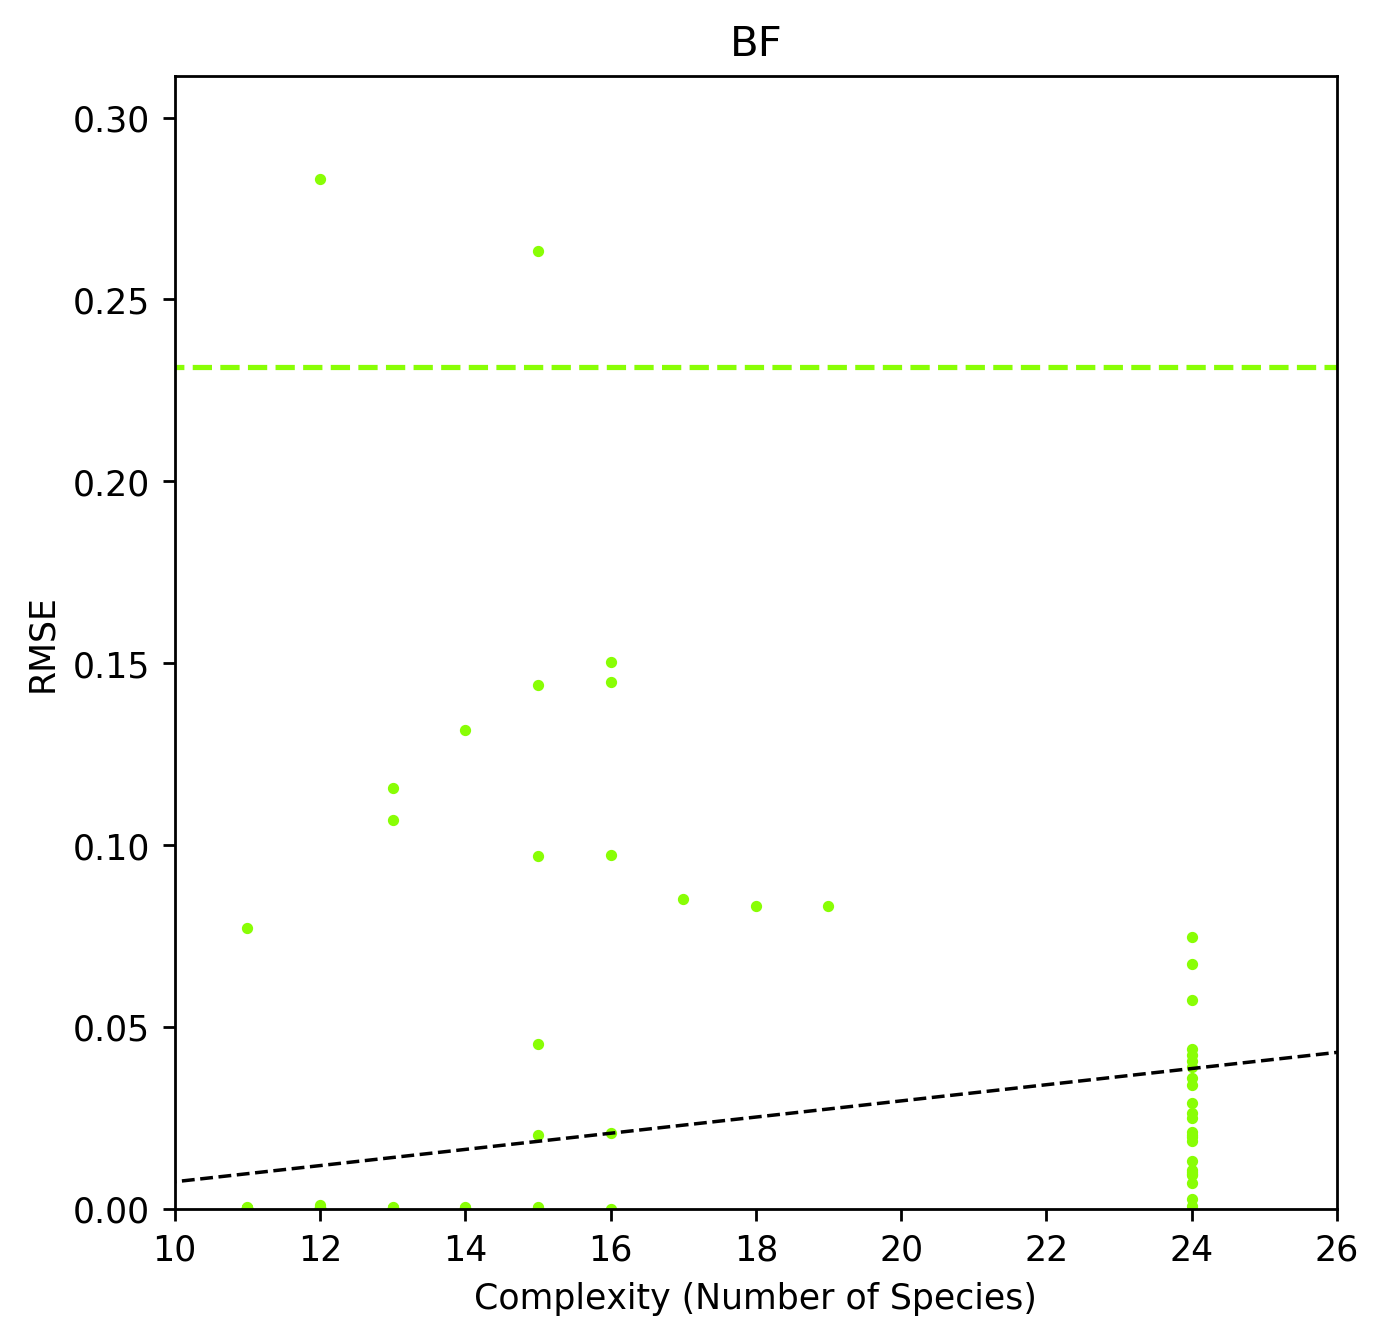

y=0.0052442900751693885x+0.022811974816978692, r=0.1790086070346987, p=0.028936434990685884
rho=0.28010237689389306, p=0.0005405501479455843


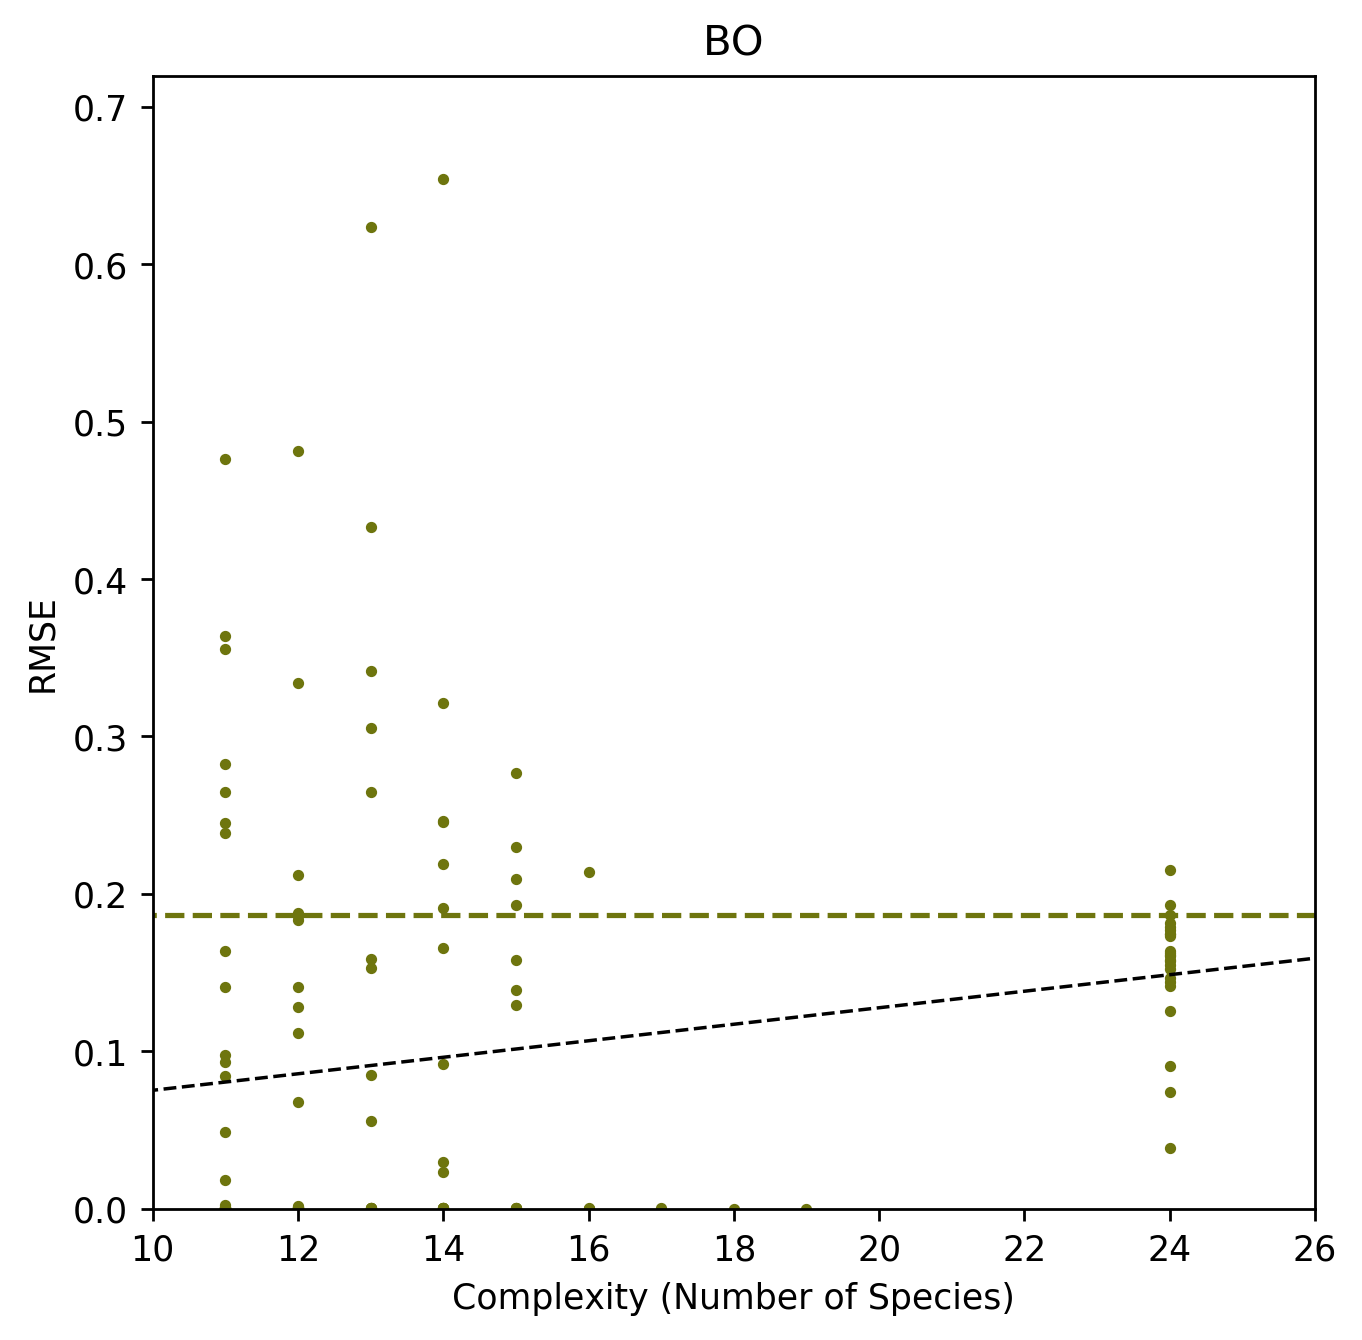

y=0.01081230417824094x+-0.12729825206341583, r=0.8269525004665417, p=1.3830243577939385e-38
rho=0.6549702357800657, p=1.2913958325017011e-19


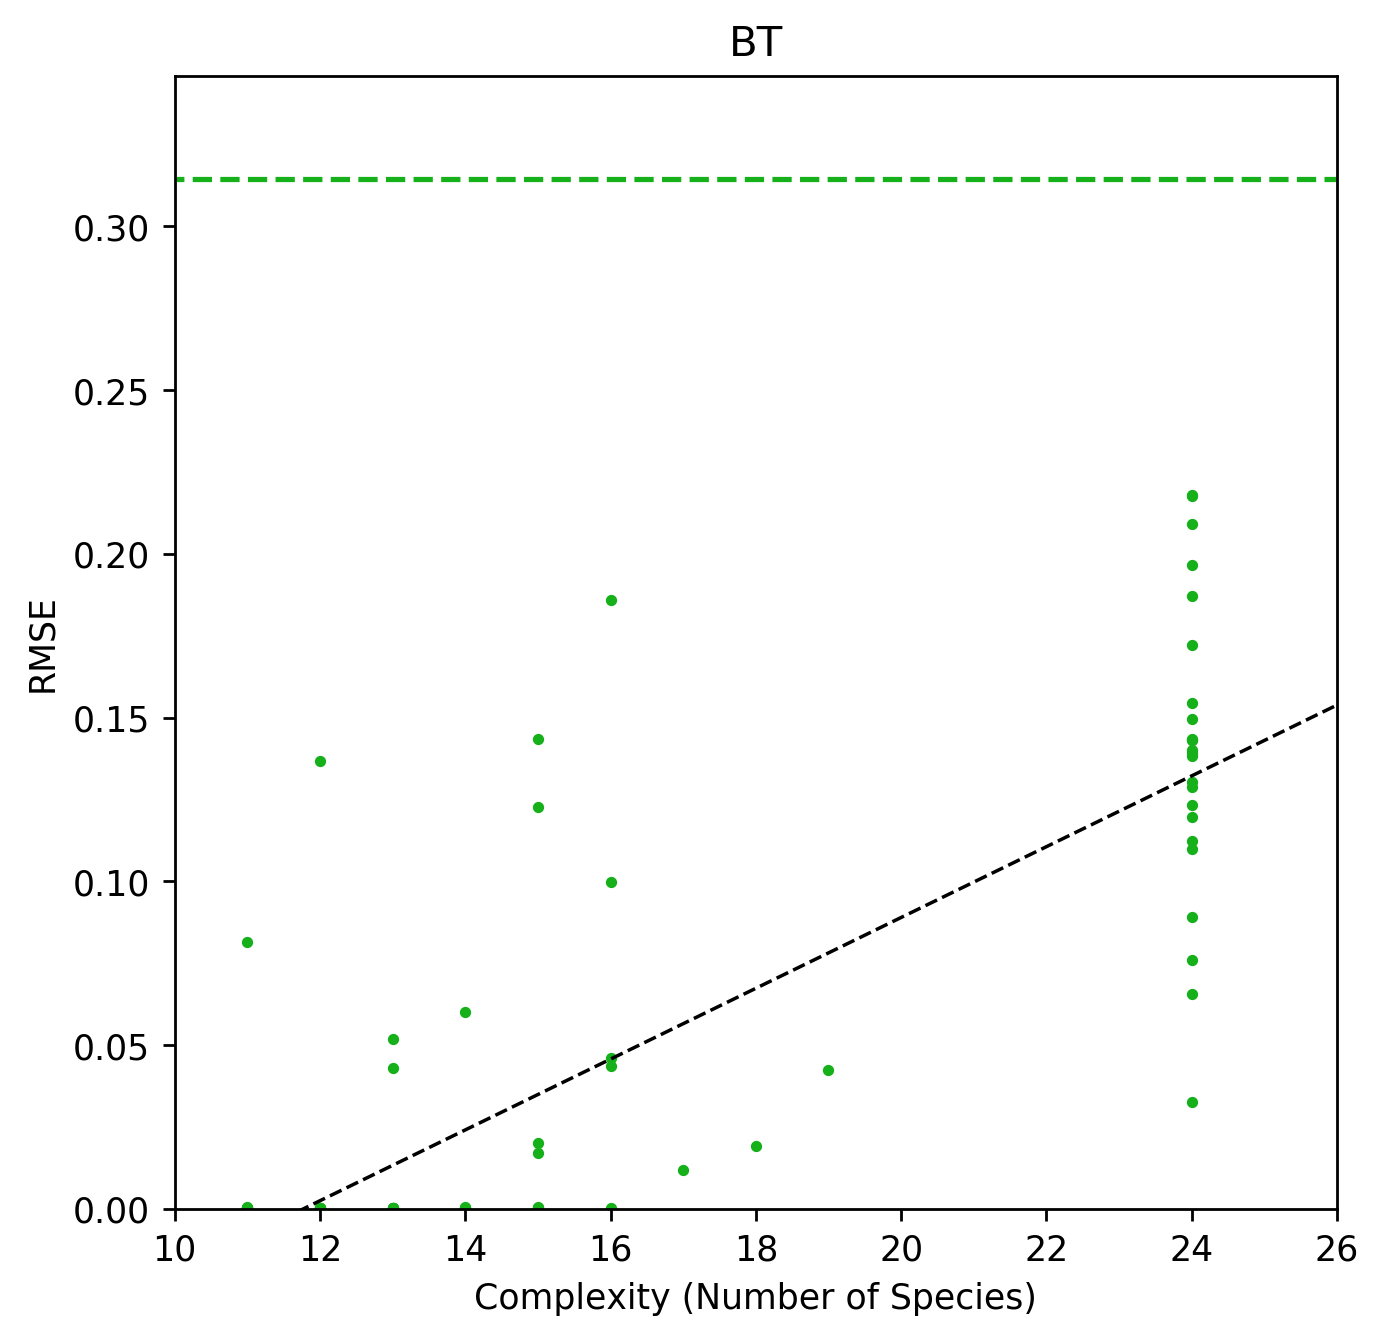

y=0.00853768280254817x+-0.06341698758299114, r=0.39225751836866257, p=7.515702941223207e-07
rho=0.45112271967731005, p=7.7479066997513e-09


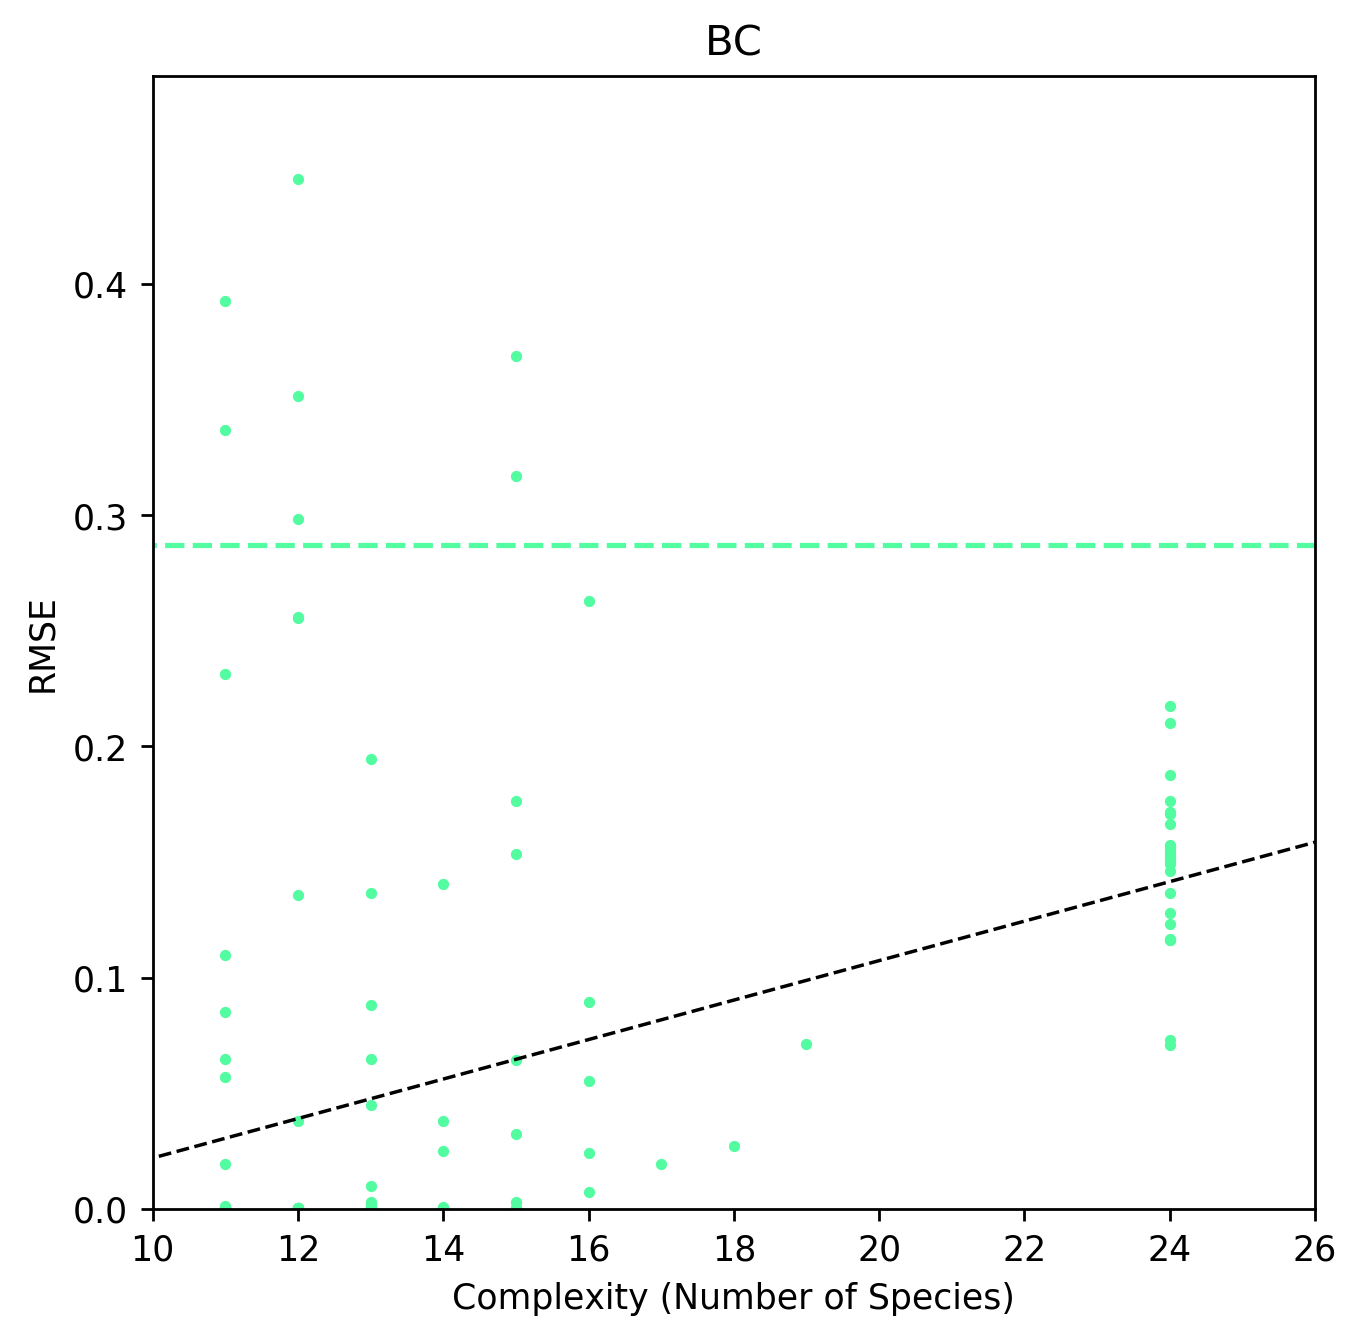

y=0.0012185415357379911x+0.009382974614081583, r=0.13024161195215264, p=0.11338420354961809
rho=0.25574957437664164, p=0.0016436105051945713


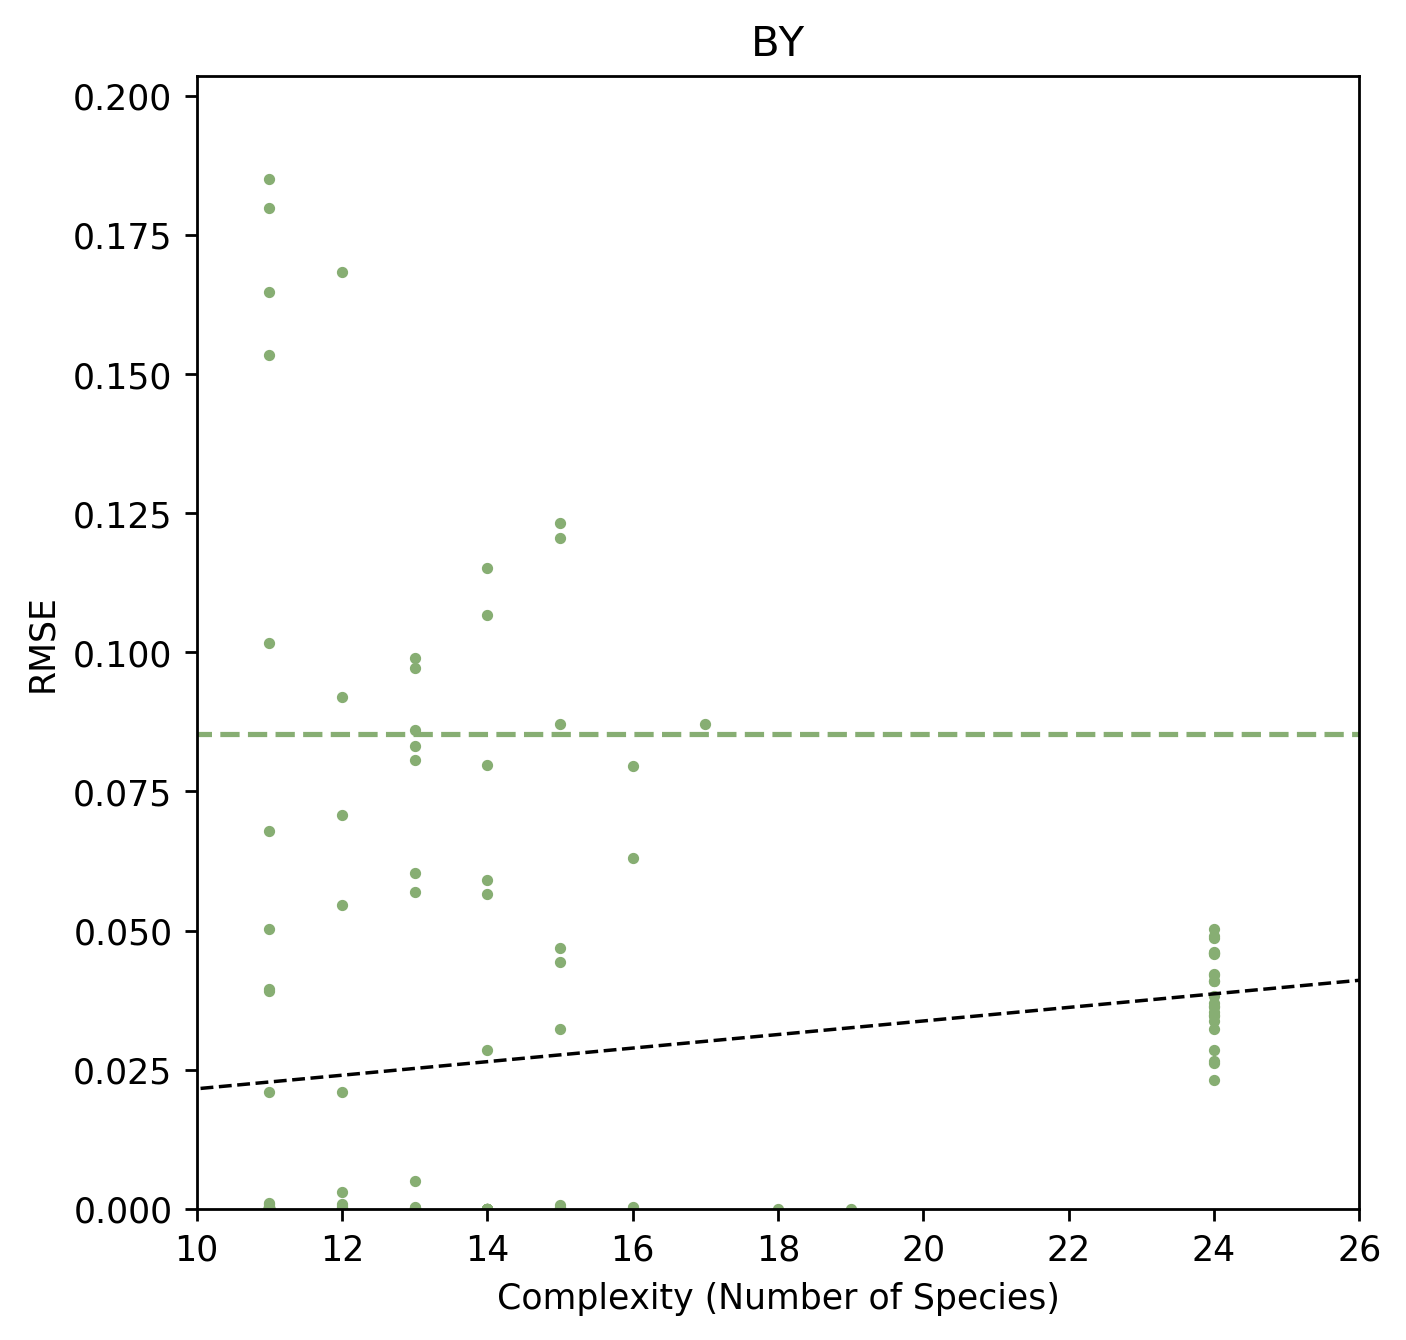

y=0.0008458190813891963x+0.0283719720768875, r=0.05036676114694011, p=0.5418523678365399
rho=0.38604135896653924, p=1.1597888904494296e-06


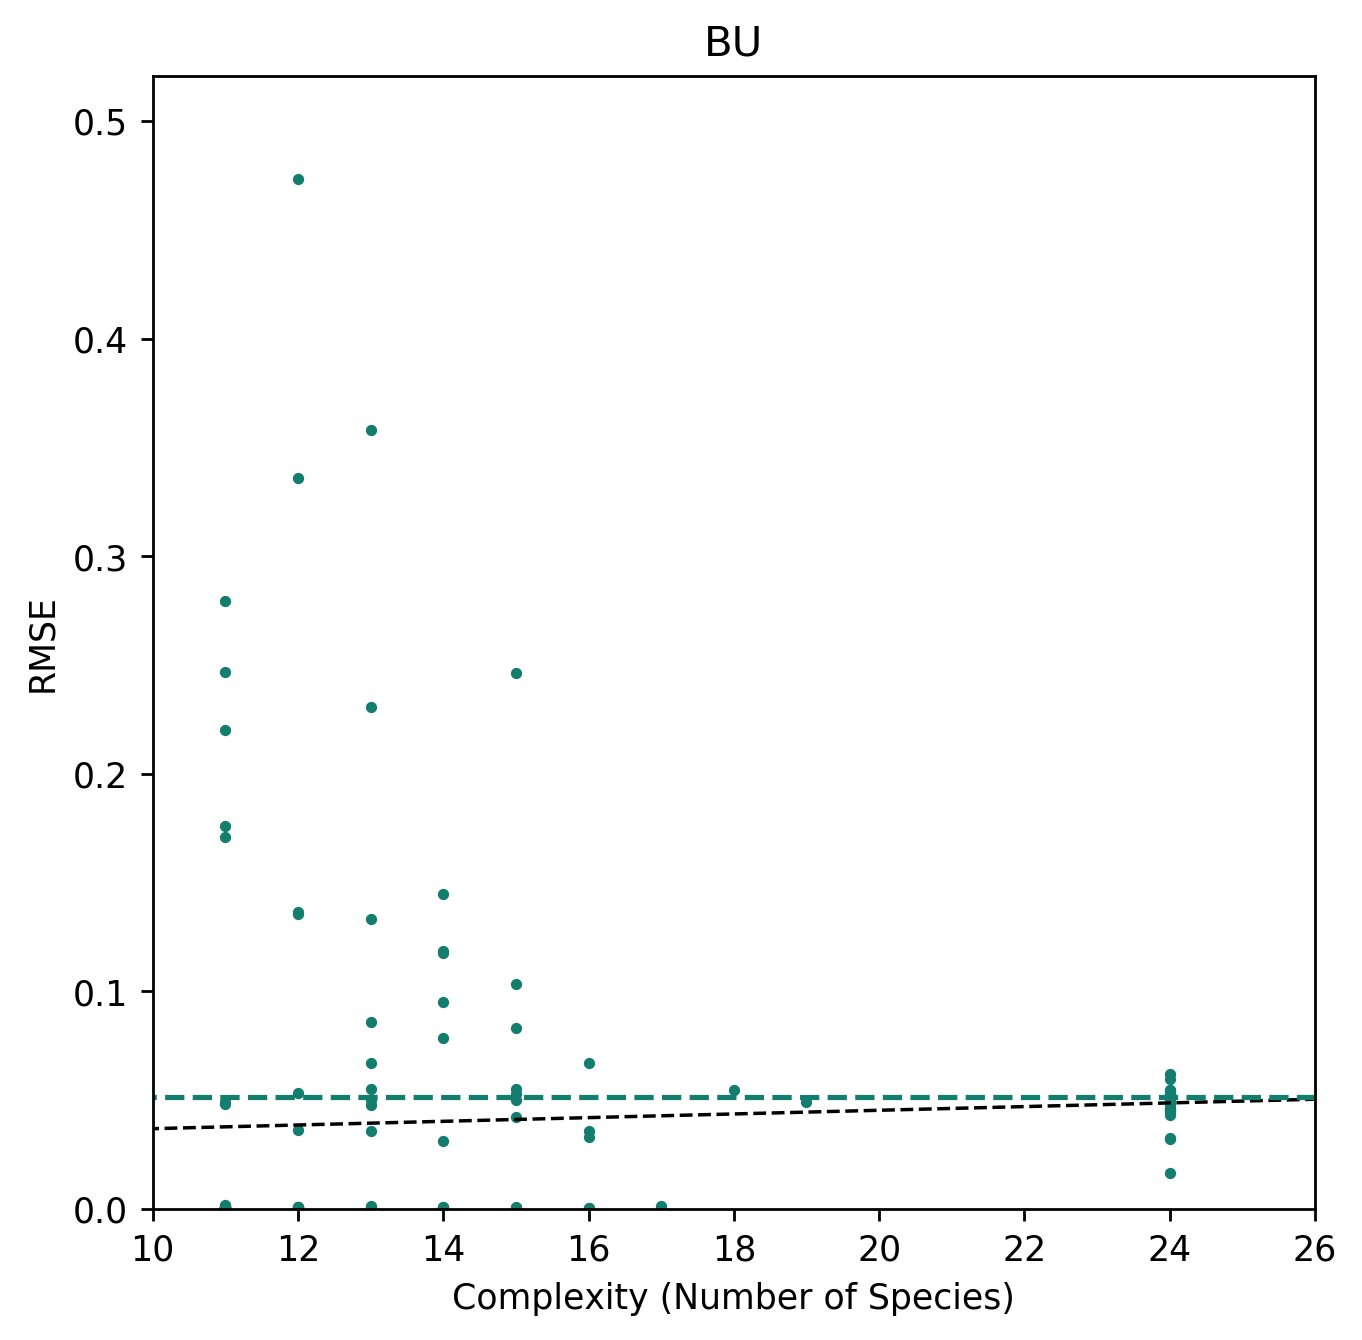

y=-0.00020955542356073325x+0.007648647388831703, r=-0.08566702374668778, p=0.2988960685469002
rho=0.2156087407867297, p=0.008270796605033222


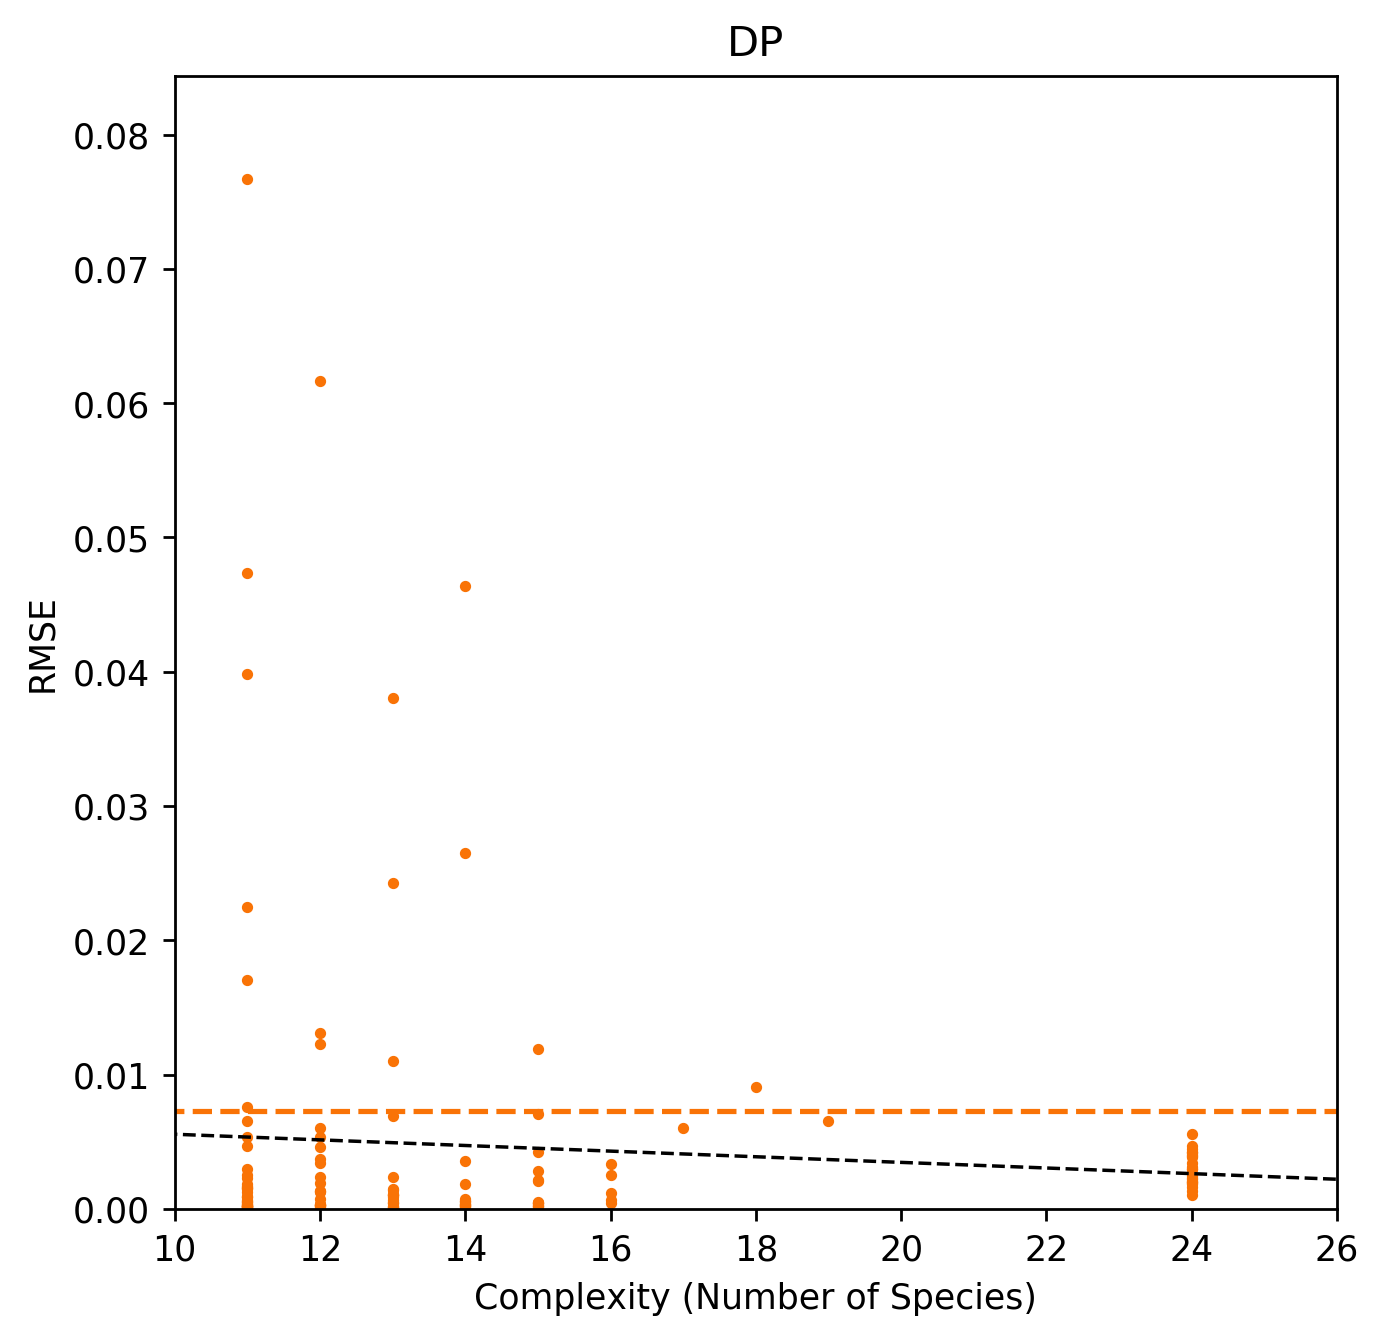

y=-6.935081808957341e-05x+0.010889263149981626, r=-0.018849699349314845, p=0.8195122174379779
rho=0.1648432345954378, p=0.04453849208770815


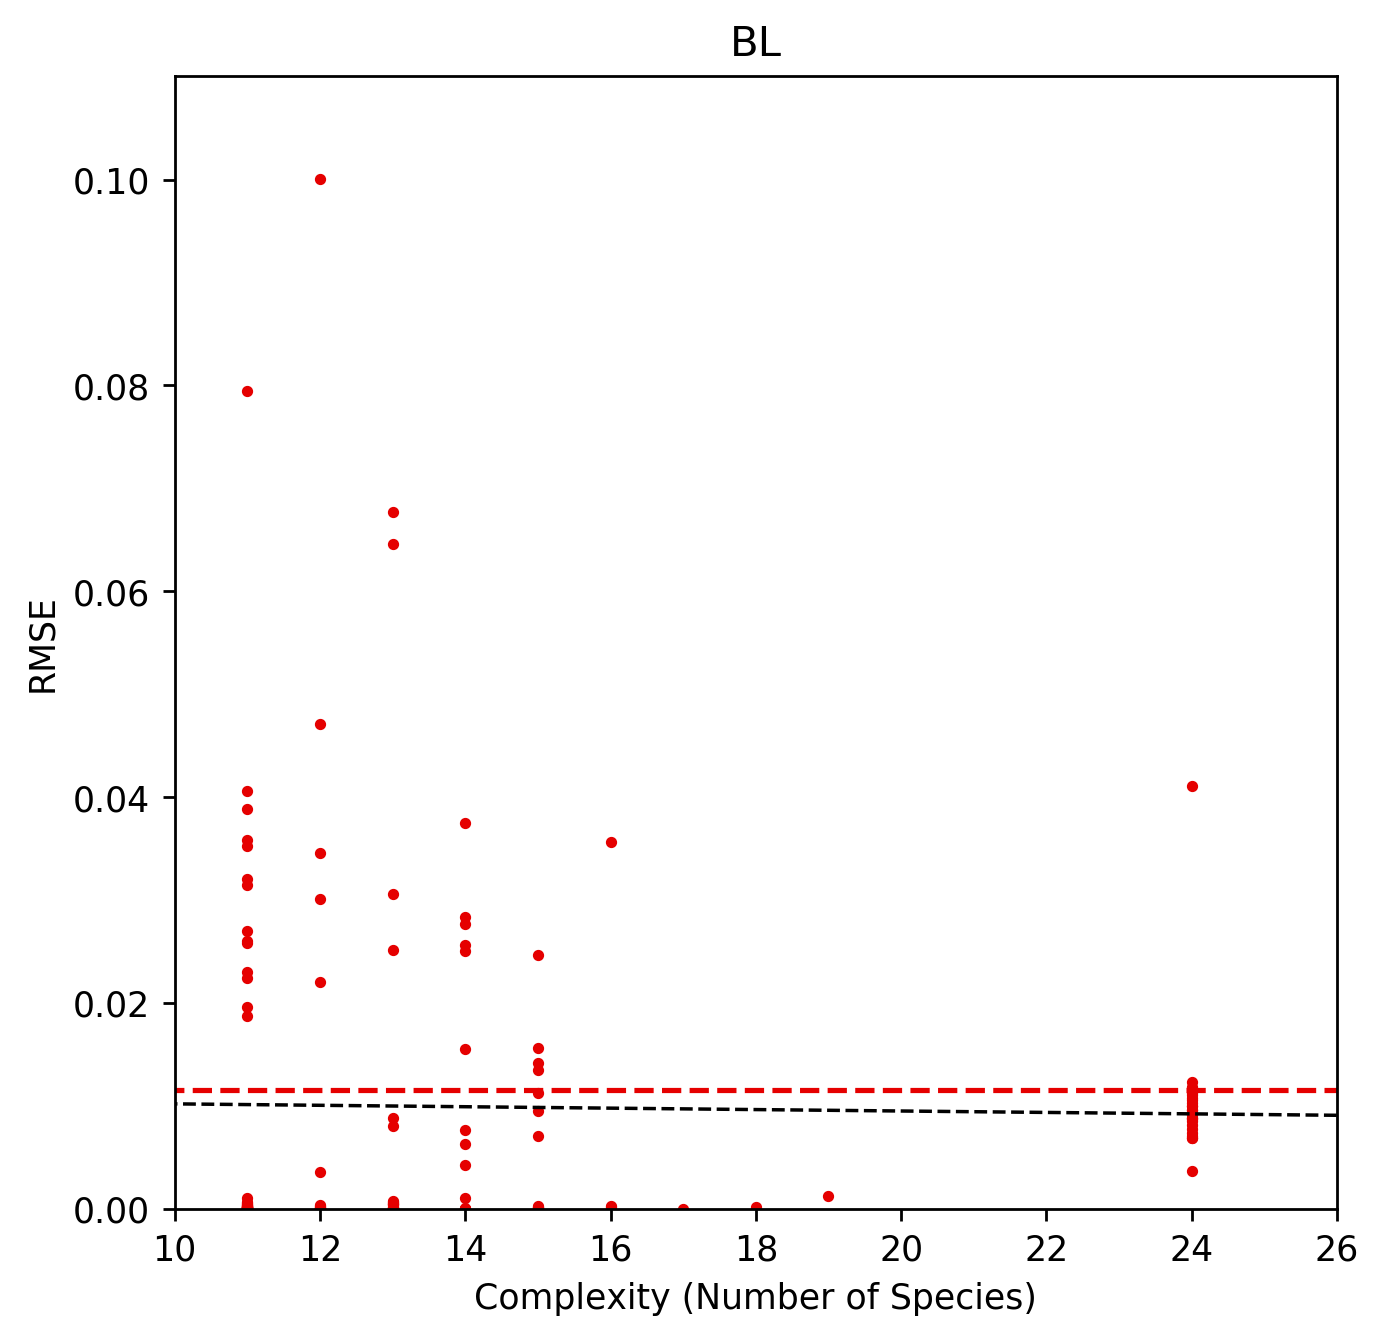

y=-0.0001383743044008745x+0.05370536931029549, r=-0.00854693705661807, p=0.9176043138711112
rho=0.3057781833443416, p=0.00014925397429216256


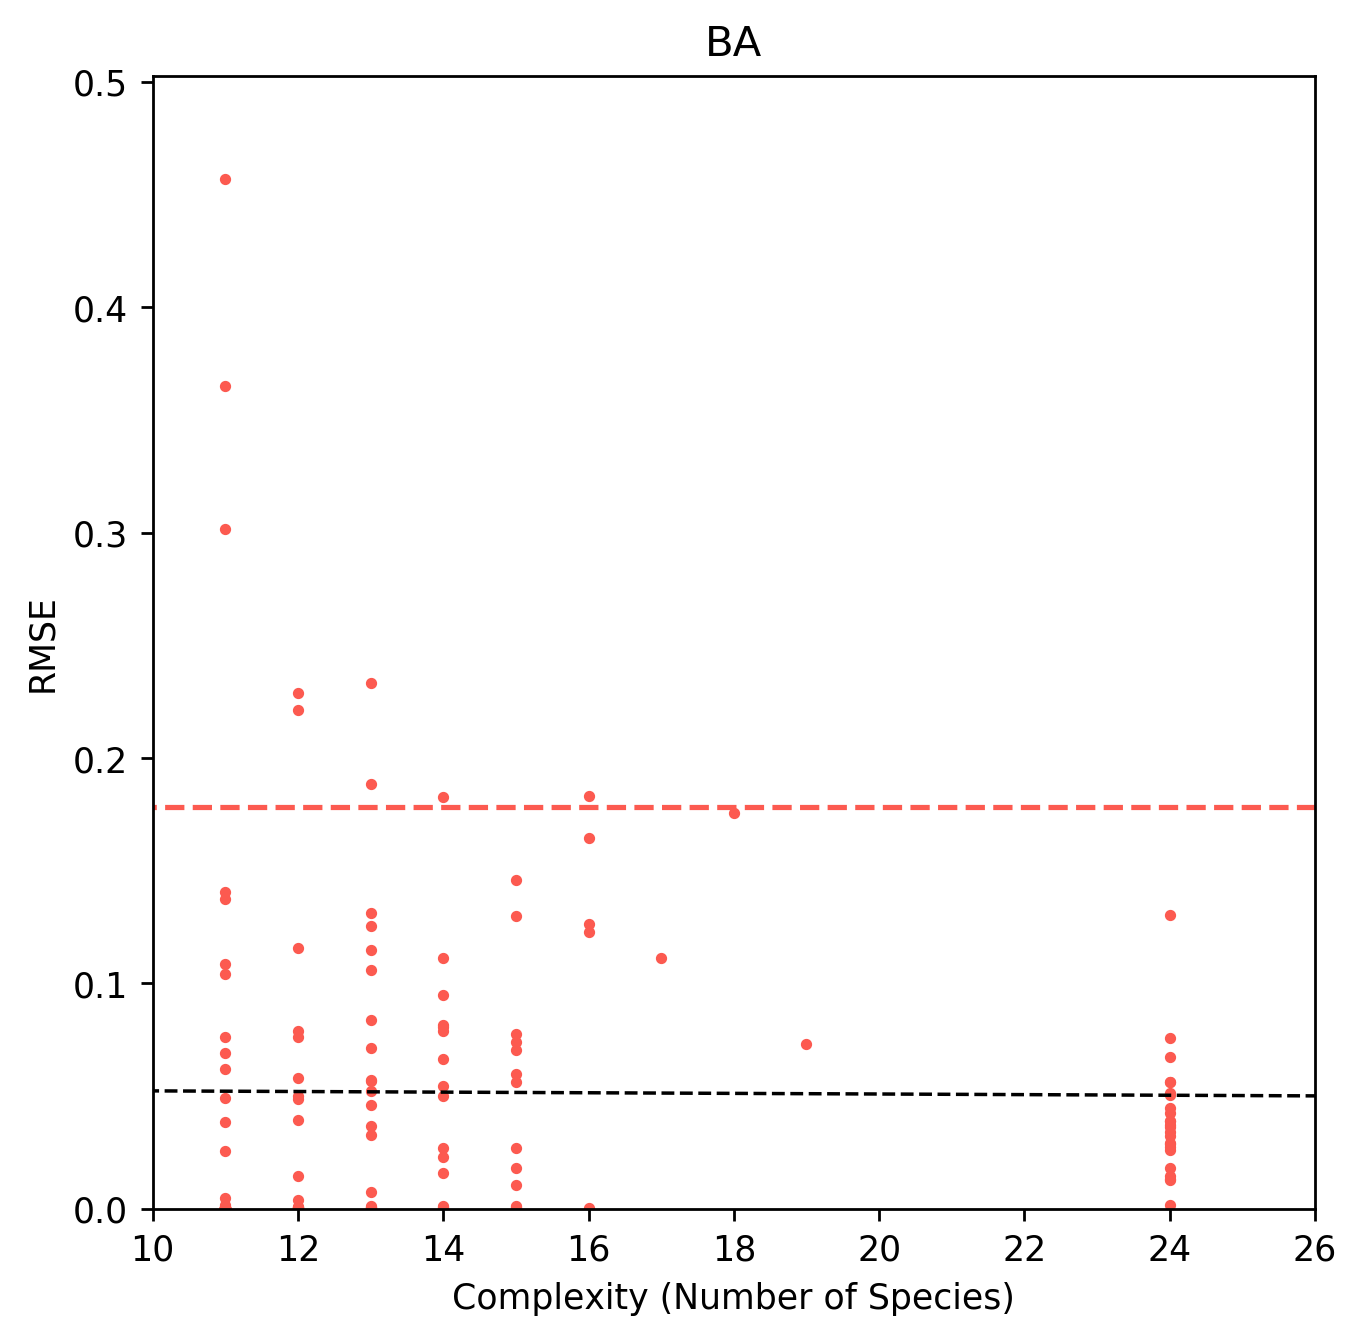

y=0.023270192786626485x+-0.2108559828008873, r=0.6708140932883724, p=8.027780734251324e-21
rho=0.5621257632646793, p=8.687944762282488e-14


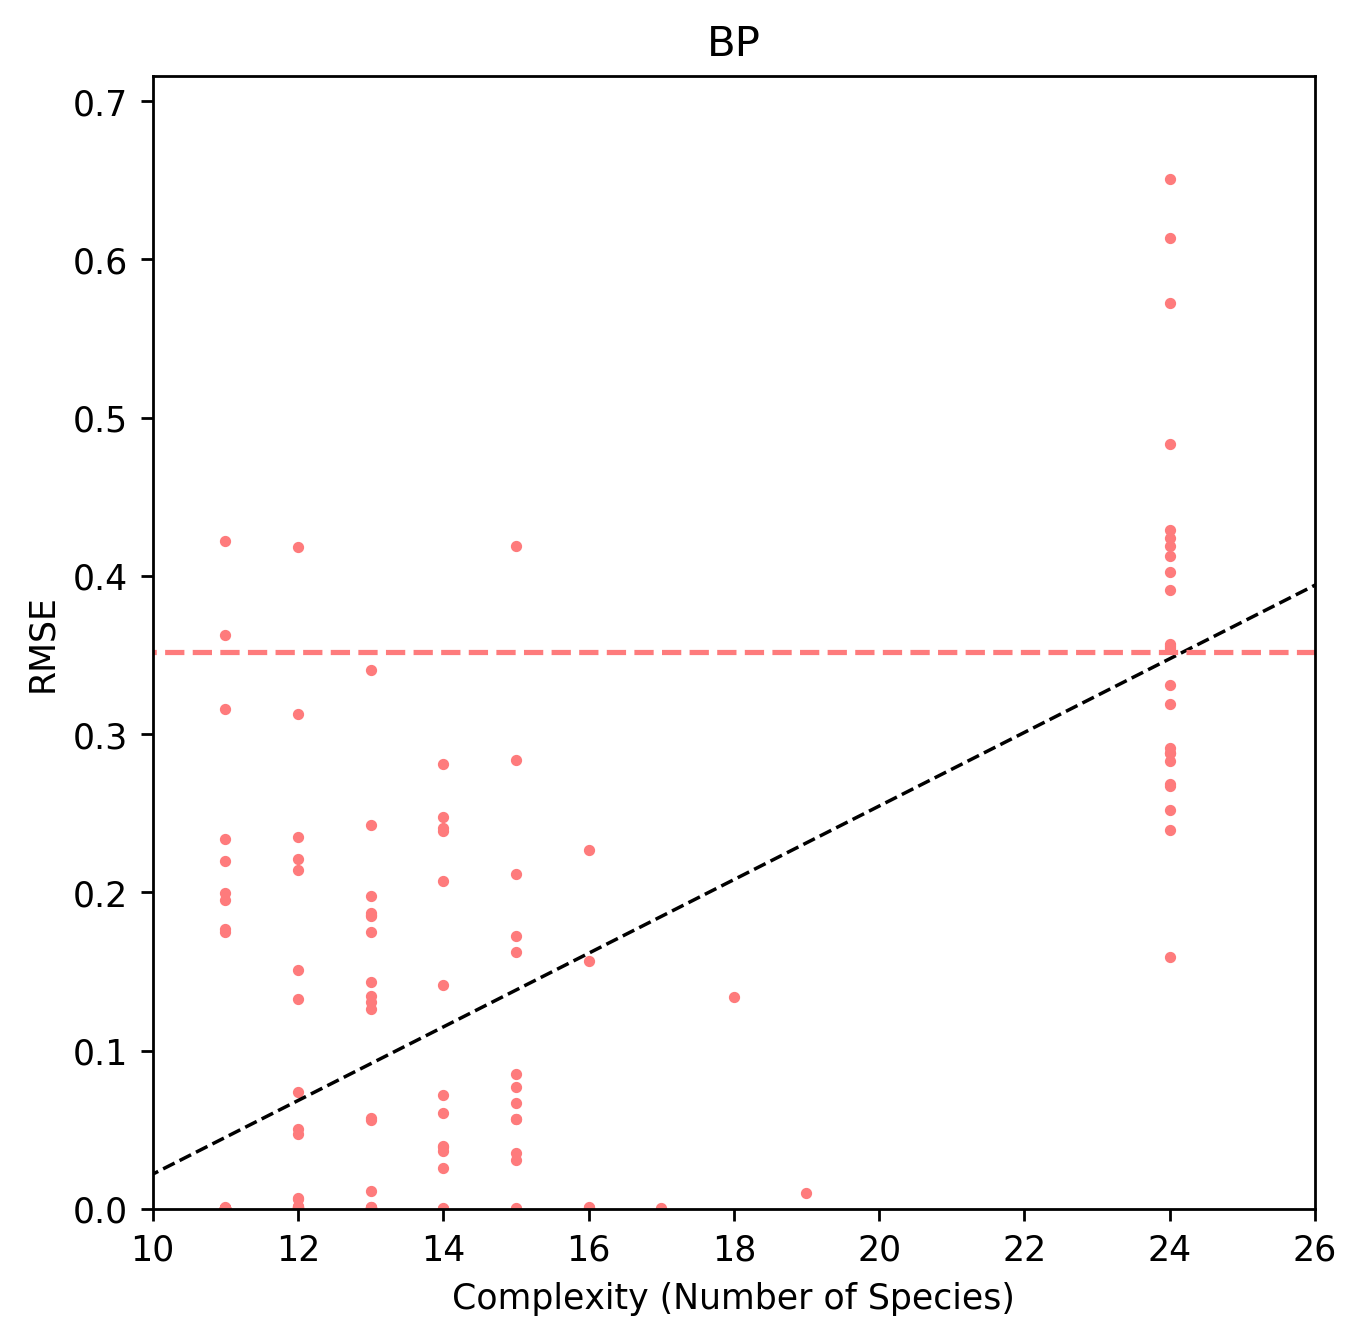

y=-0.0028143855248395915x+0.07340367774080489, r=-0.17019430143450404, p=0.0379721935702988
rho=0.2163854158076, p=0.008035968622008243


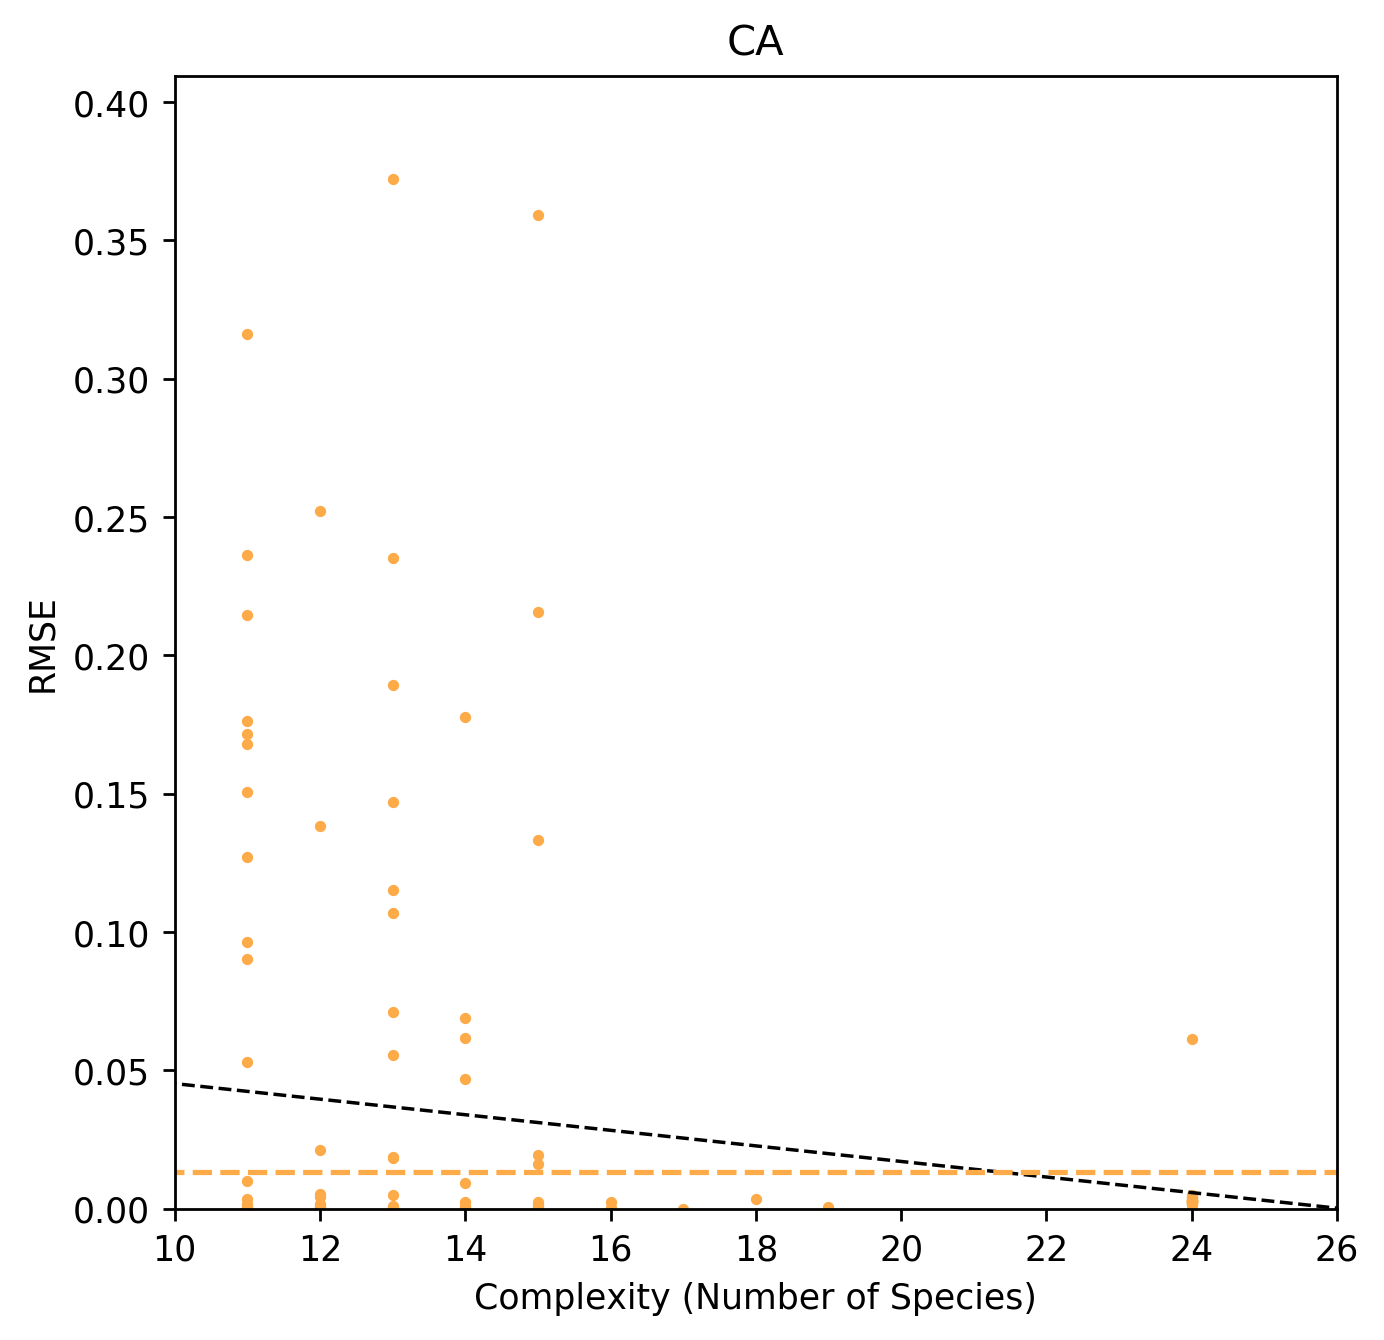

y=-0.00030776525759903904x+0.01578953002768698, r=-0.06277142873184328, p=0.4469436029620705
rho=0.24708313848538005, p=0.0023824907206289416


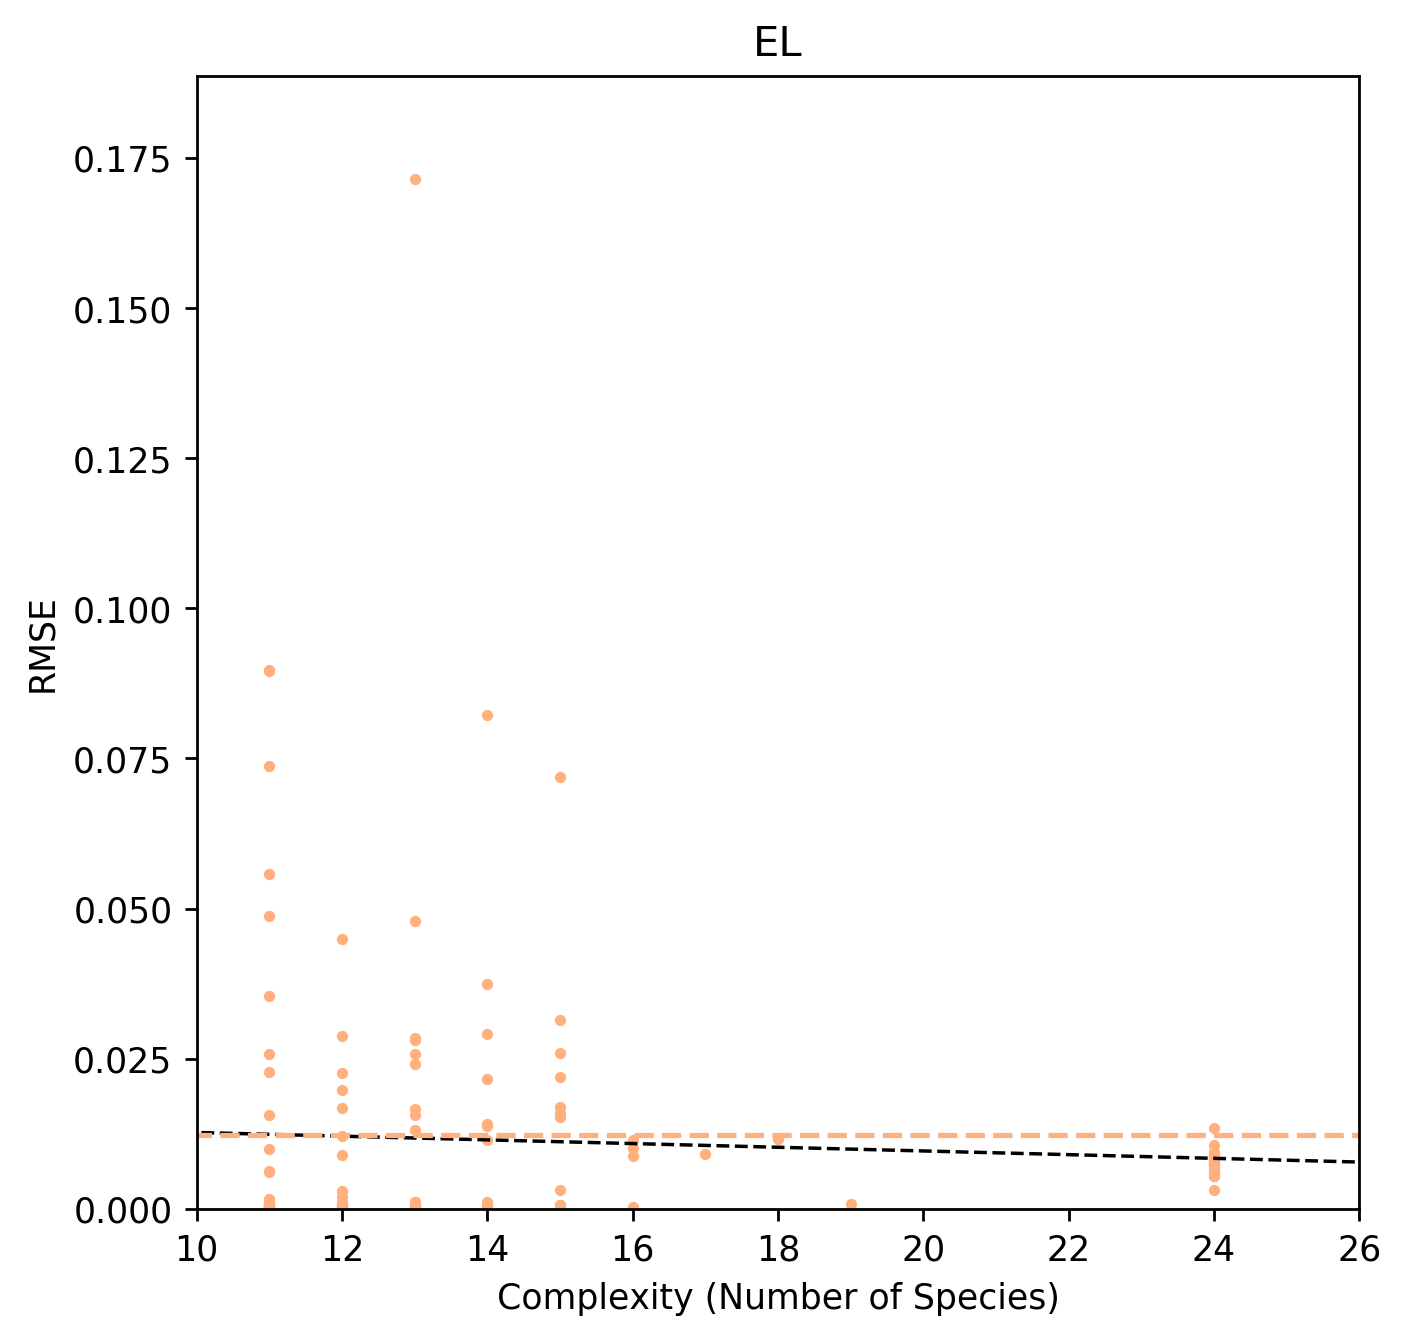

y=-0.00013932379900231094x+0.0037367844579866047, r=-0.35672643410756744, p=7.98662902014497e-06
rho=-0.42770855459537044, p=5.3100334918934966e-08


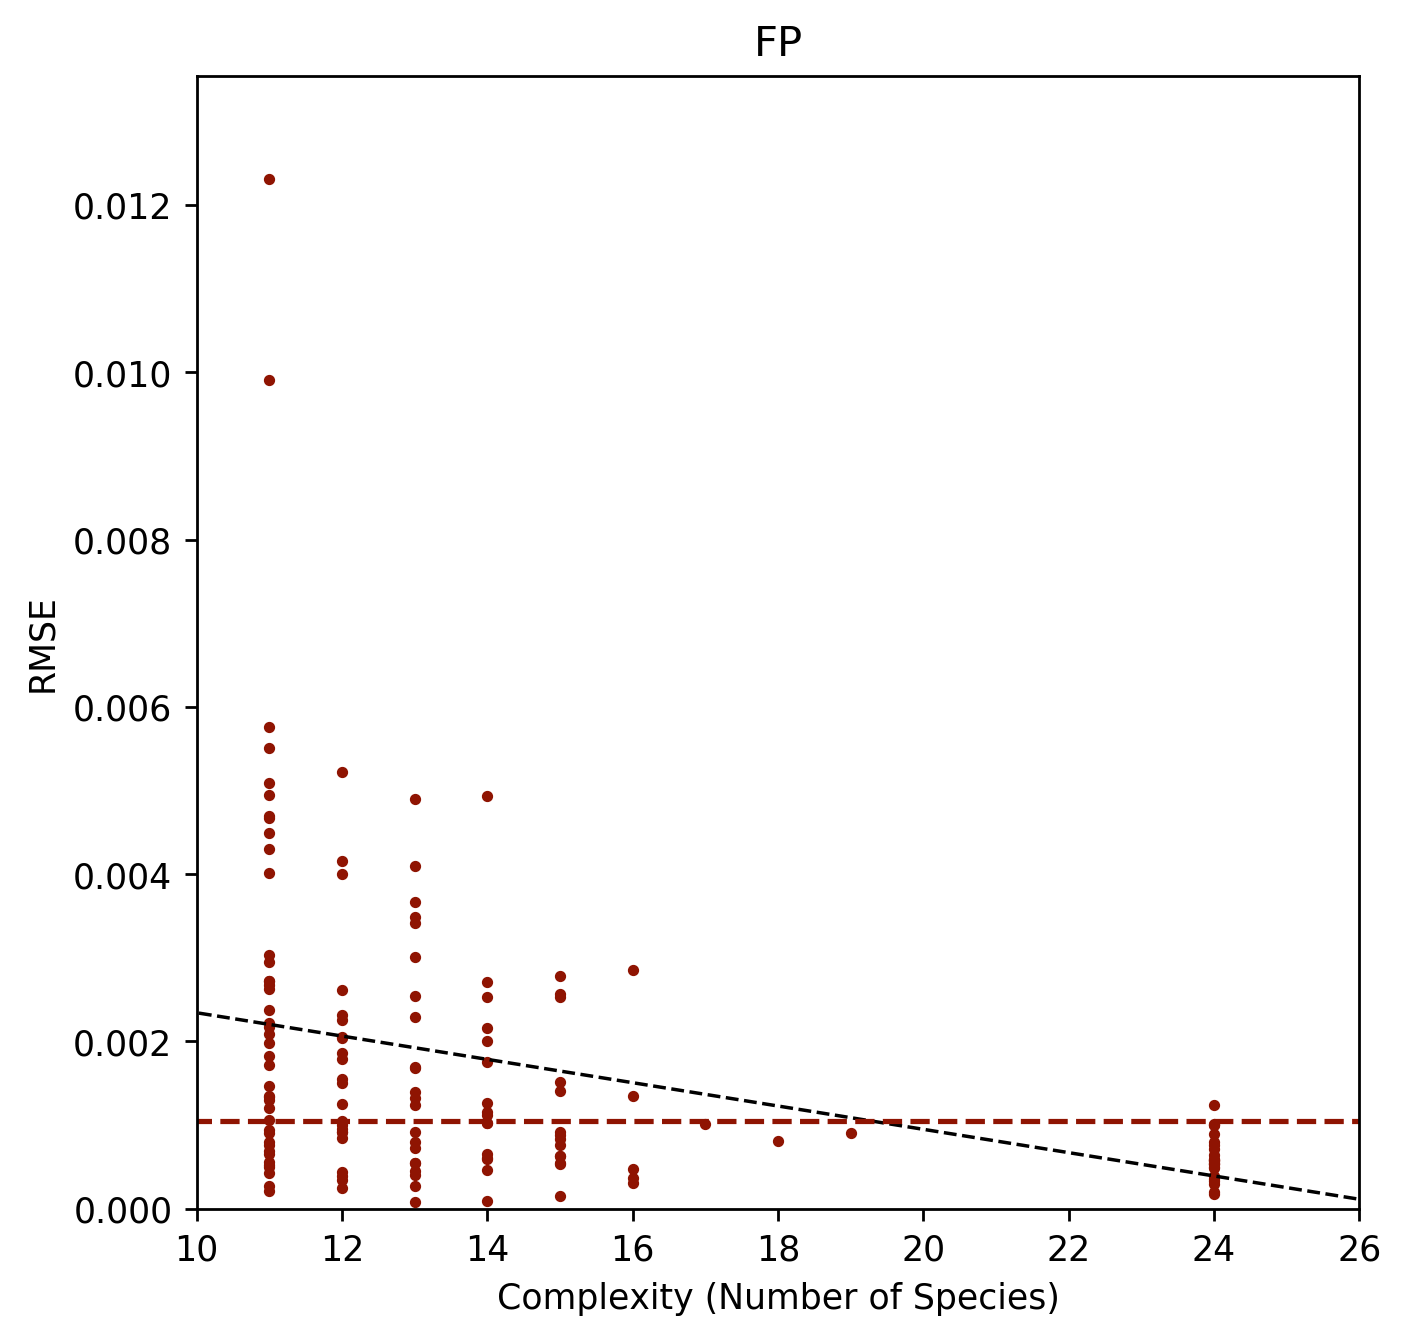

y=0.00010385731957602545x+0.038171567814742215, r=0.009398948324207, p=0.9094240293519742
rho=0.15911858679389657, p=0.05258664768203947


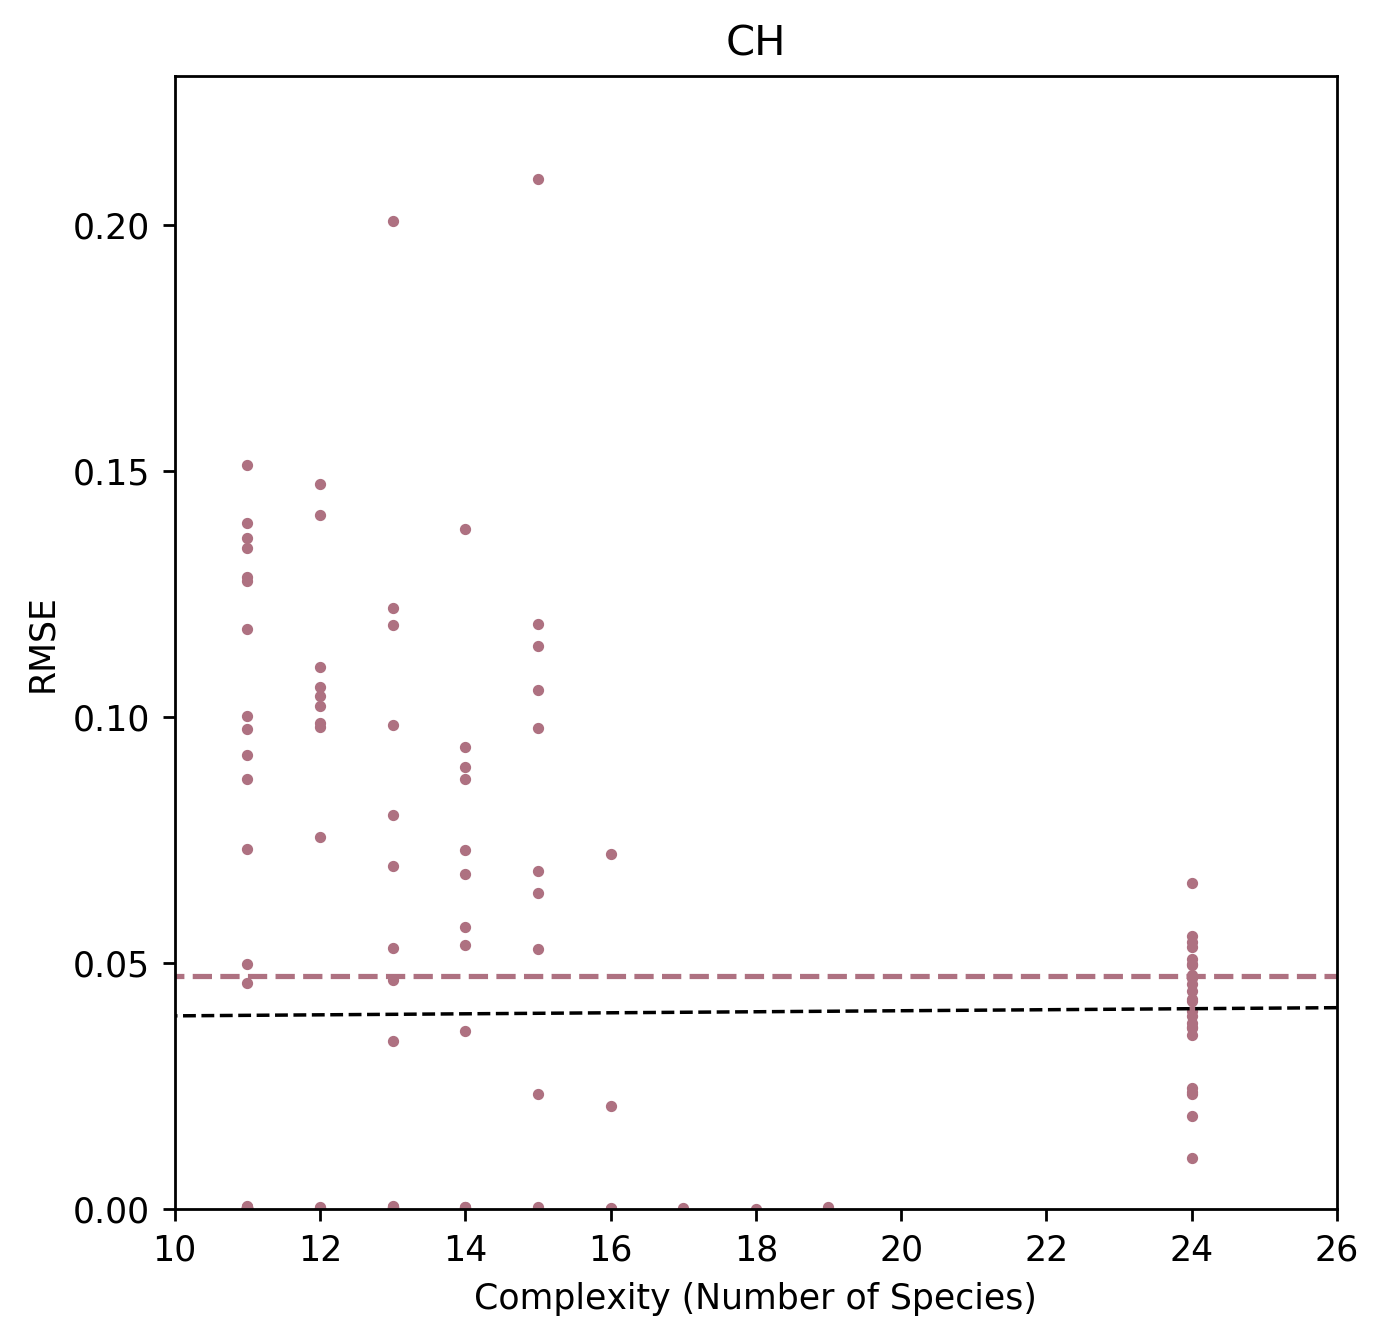

y=0.038309373239914506x+-0.31068214922564397, r=0.6436336244064427, p=8.530071825581655e-19
rho=0.25329324040103196, p=0.0018283284738152819


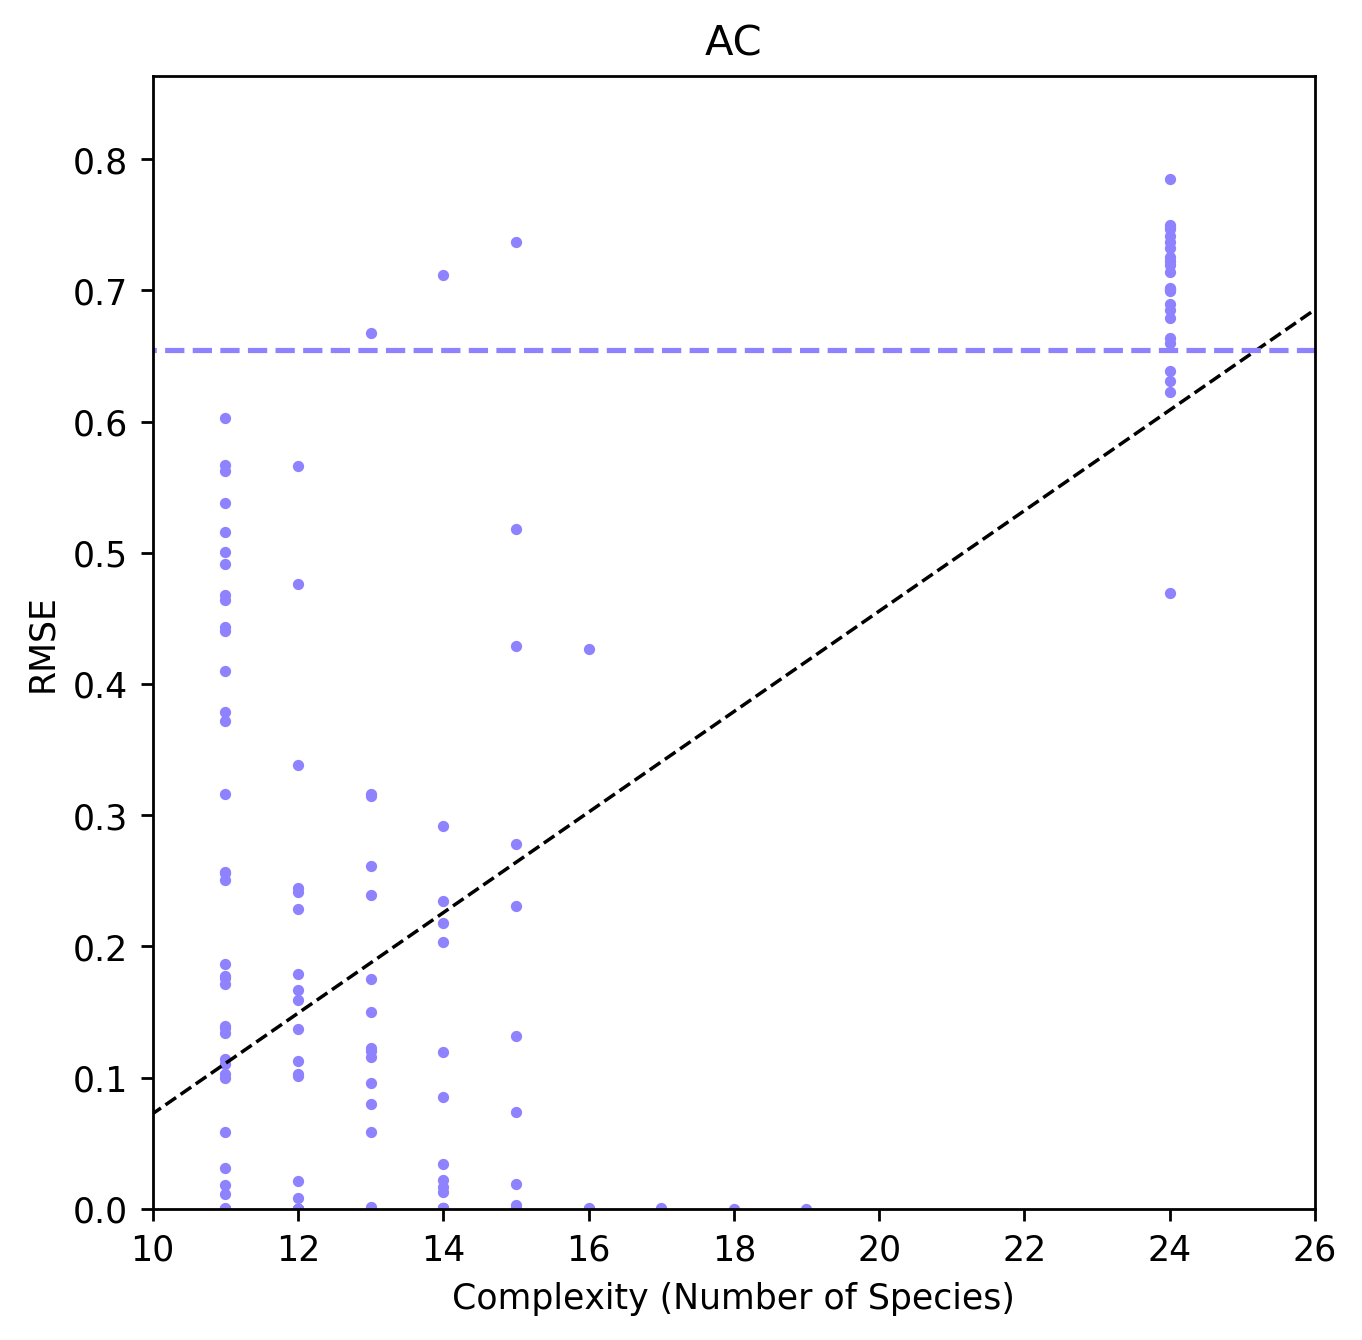

y=-8.683284389709951e-05x+0.0023871966616122384, r=-0.16112019812152165, p=0.04964570128680046
rho=-0.17584841340108845, p=0.03193917031648842


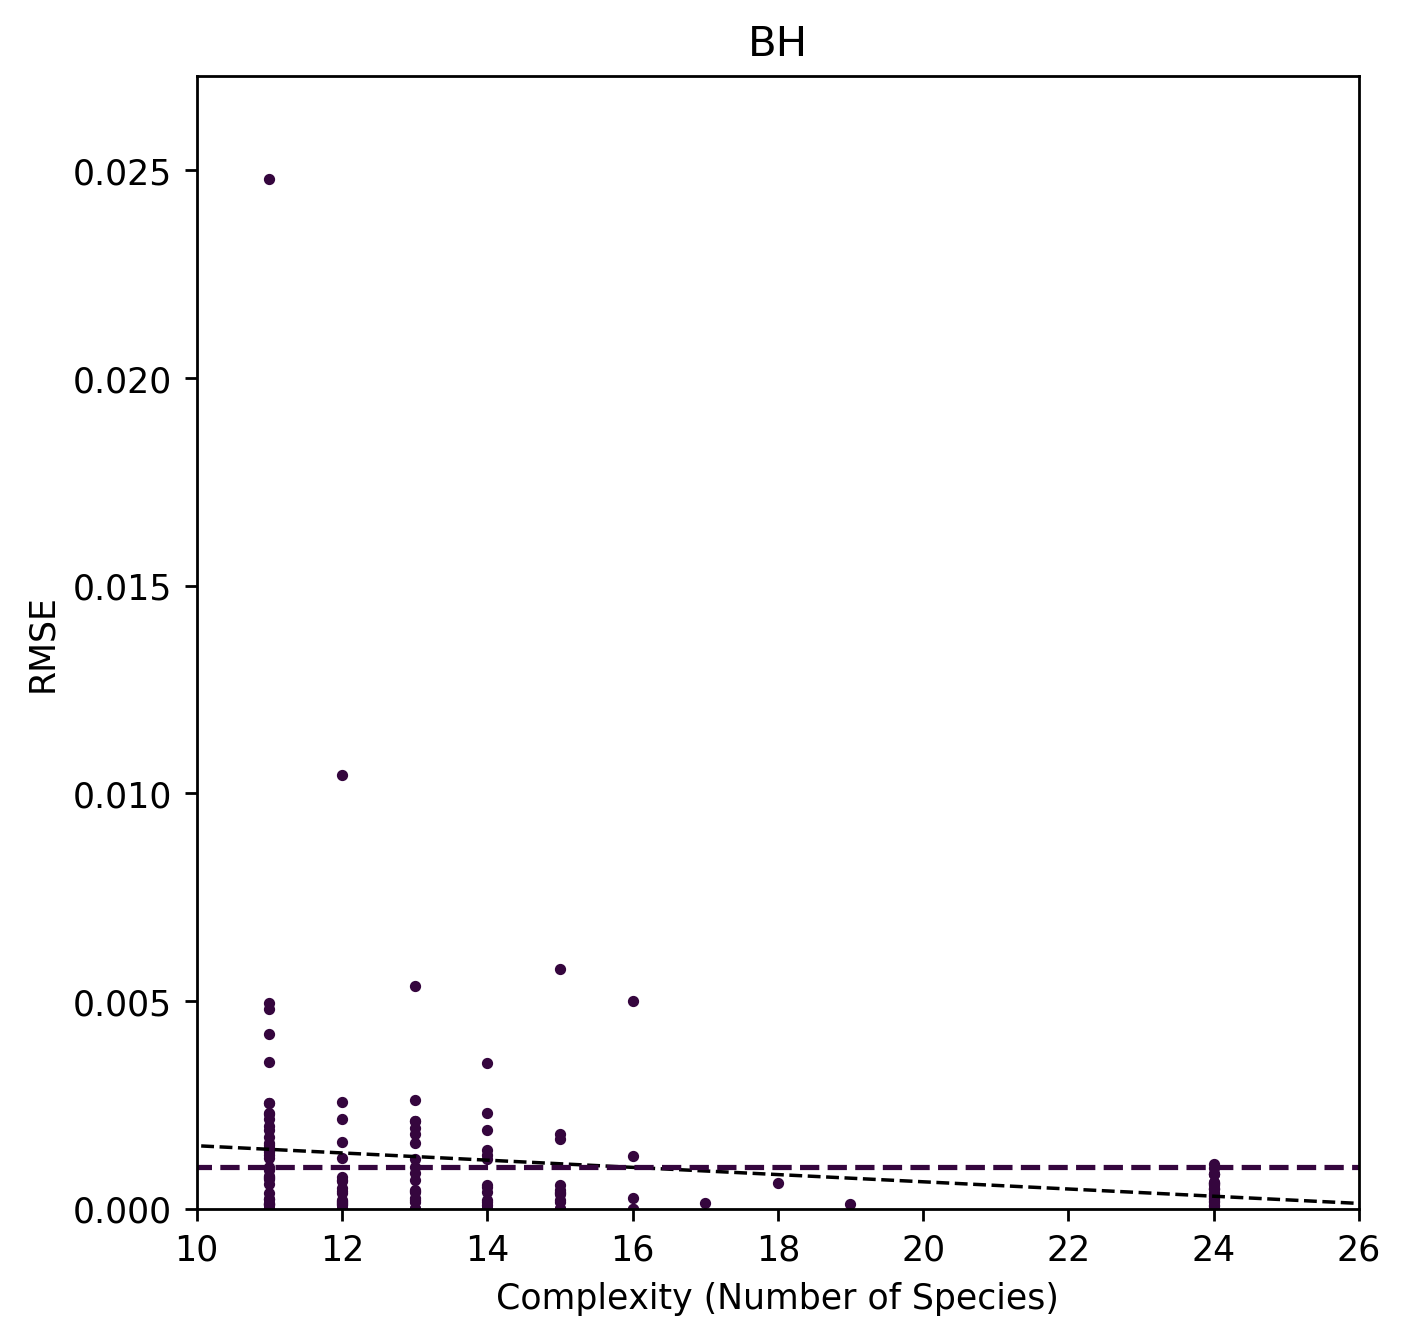

y=0.0012611225414941685x+0.005243705801686399, r=0.18764475473172895, p=0.021928691359845816
rho=0.41339183959493625, p=1.6066150932338466e-07


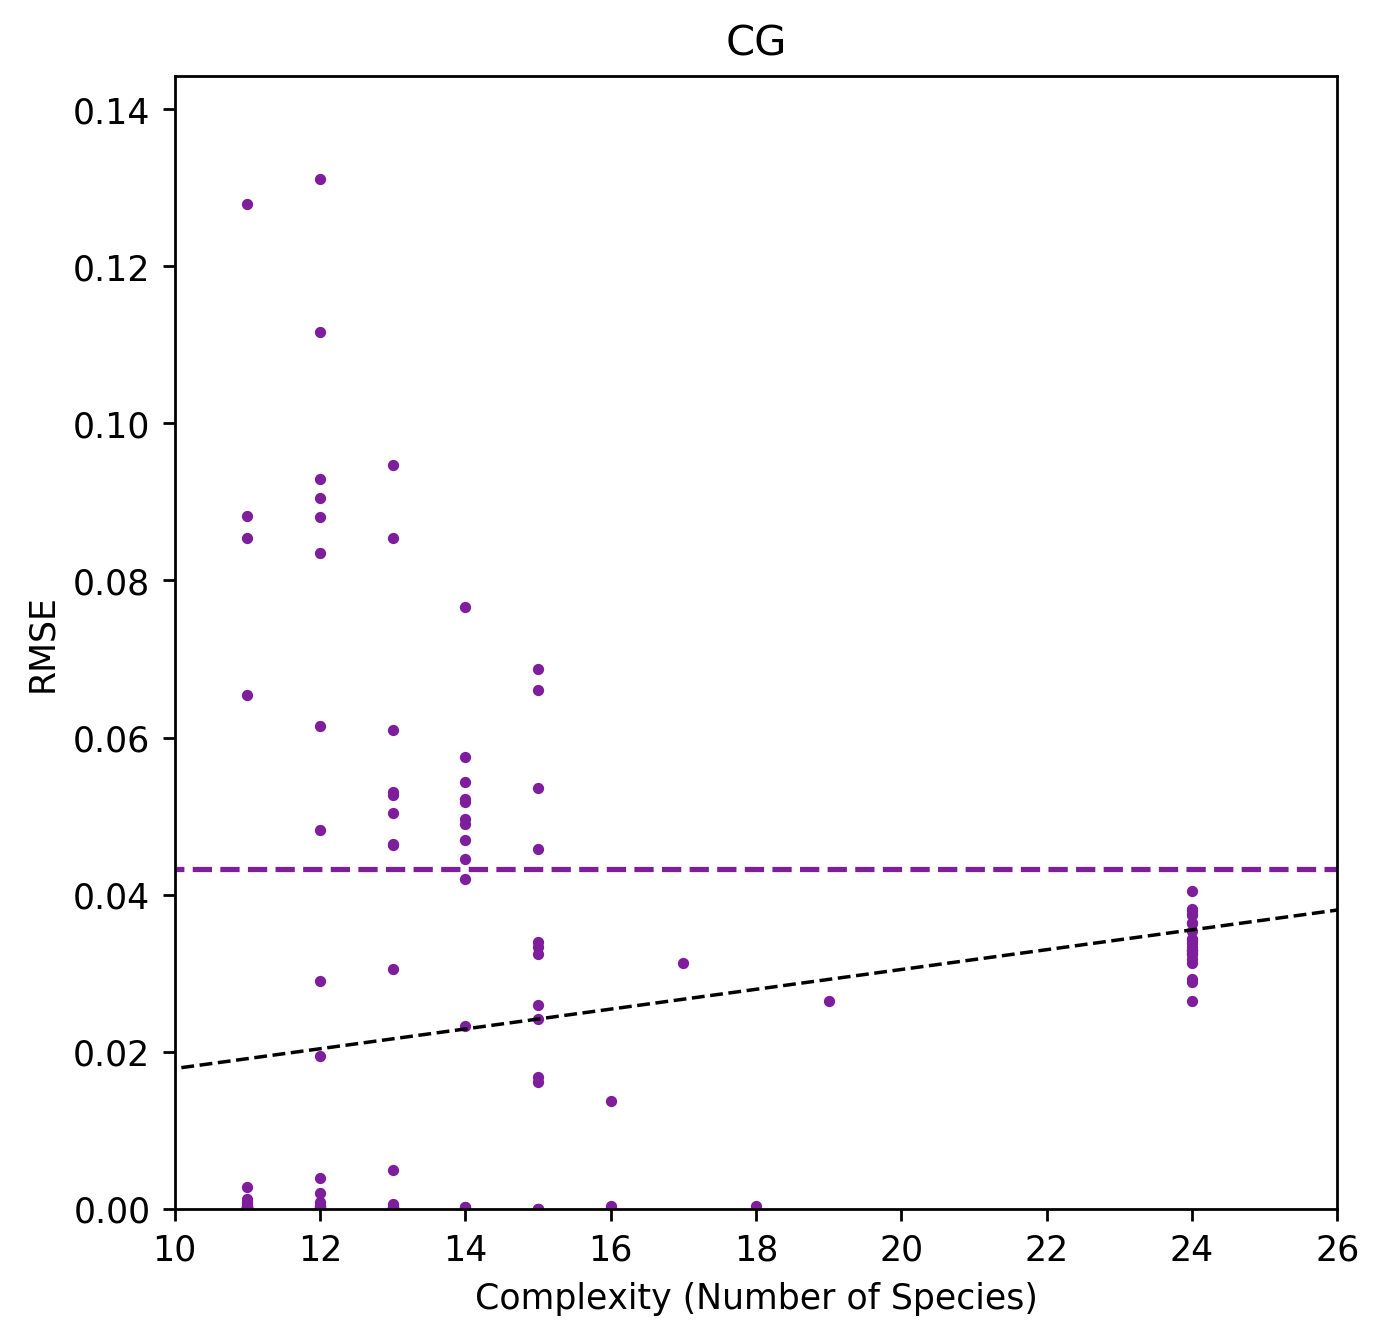

y=-0.01047918749540792x+0.2574498712747964, r=-0.5503204350565549, p=3.587694061591834e-13
rho=-0.5451839708788352, p=6.536290857373112e-13


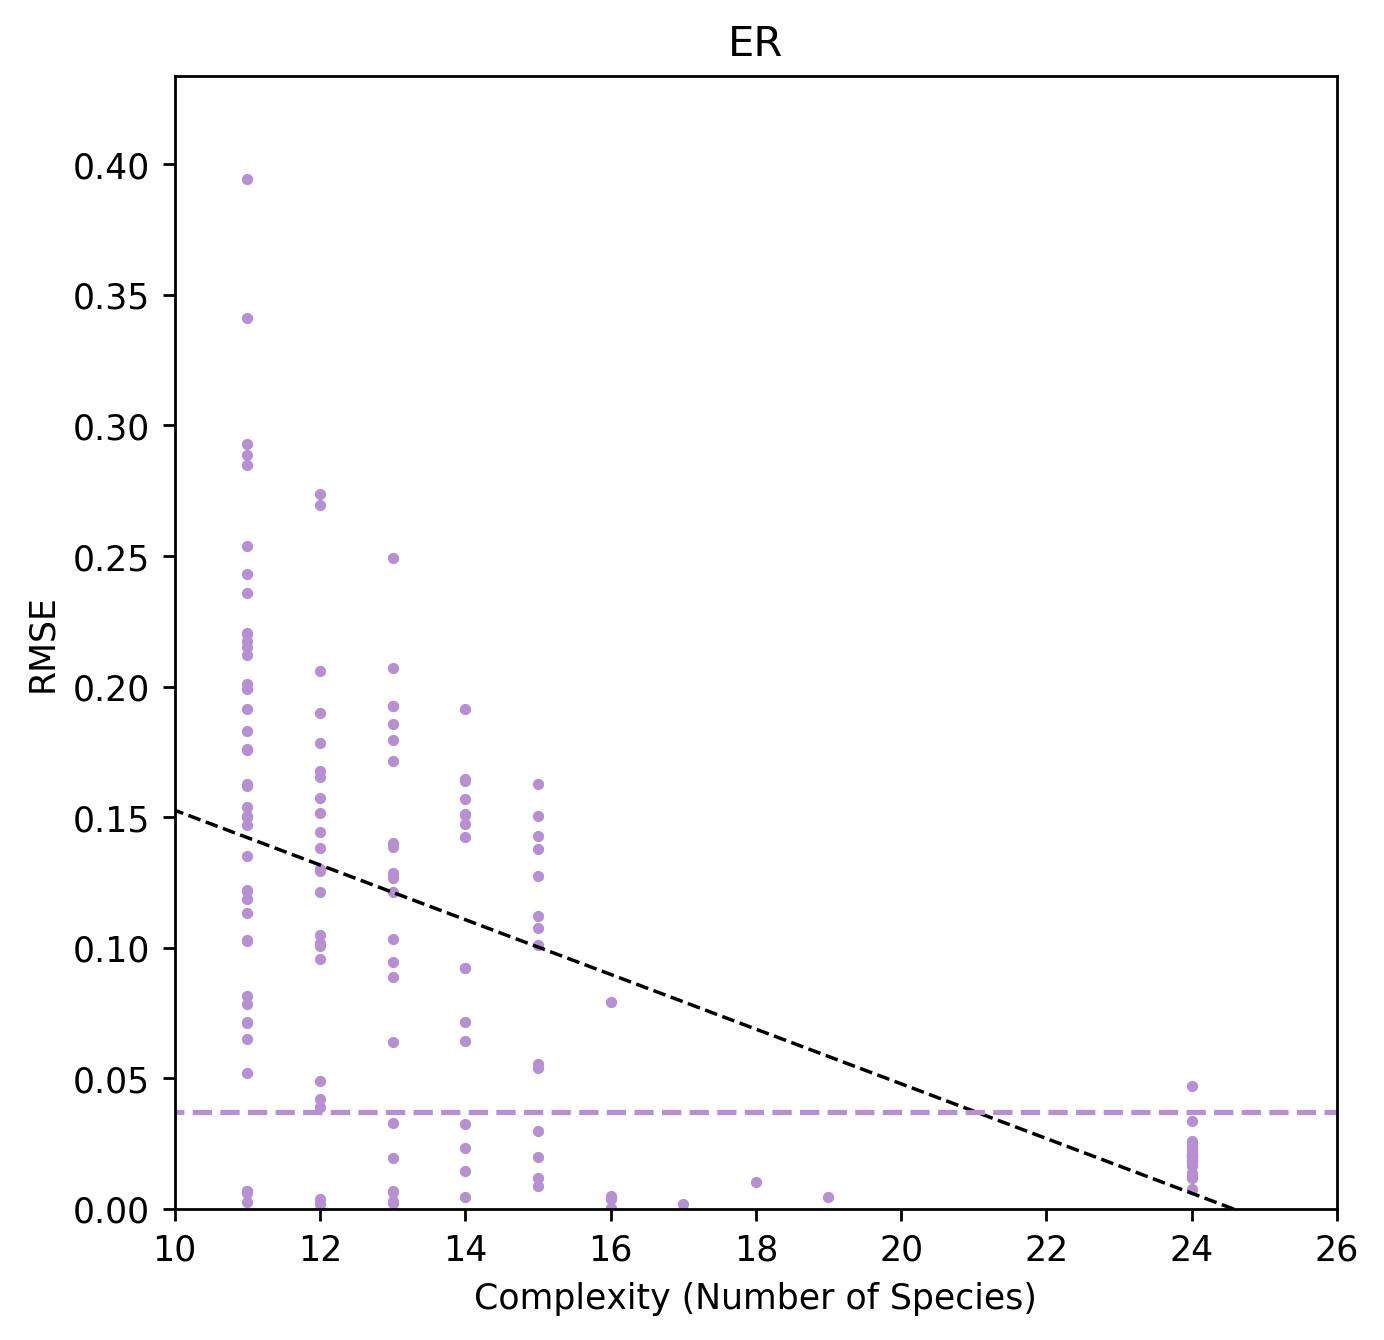

y=-0.0005825218865713942x+0.014448148539514635, r=-0.2200982574961566, p=0.006993098008271449
rho=-0.3389873995999107, p=2.3481235719461685e-05


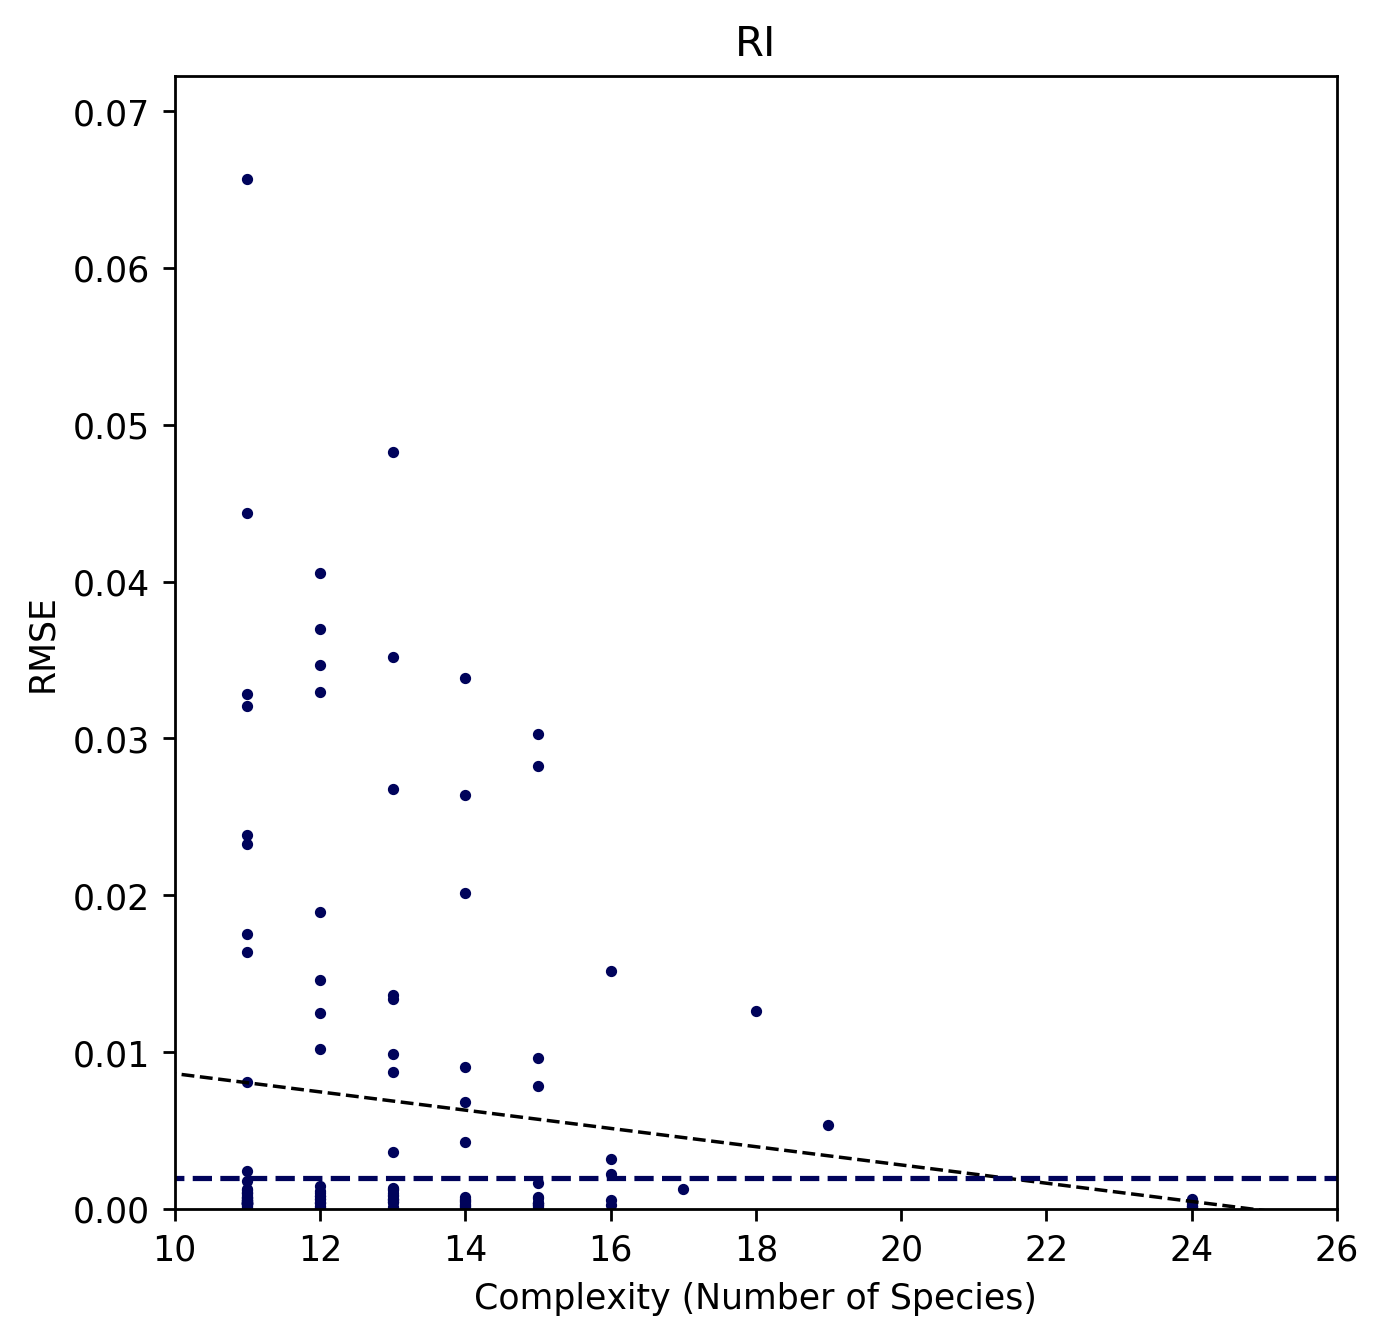

y=-0.0036475646423524953x+0.23404398982189809, r=-0.12313566998103462, p=0.13462669381262565
rho=-0.08240068466352546, p=0.3177666940781666


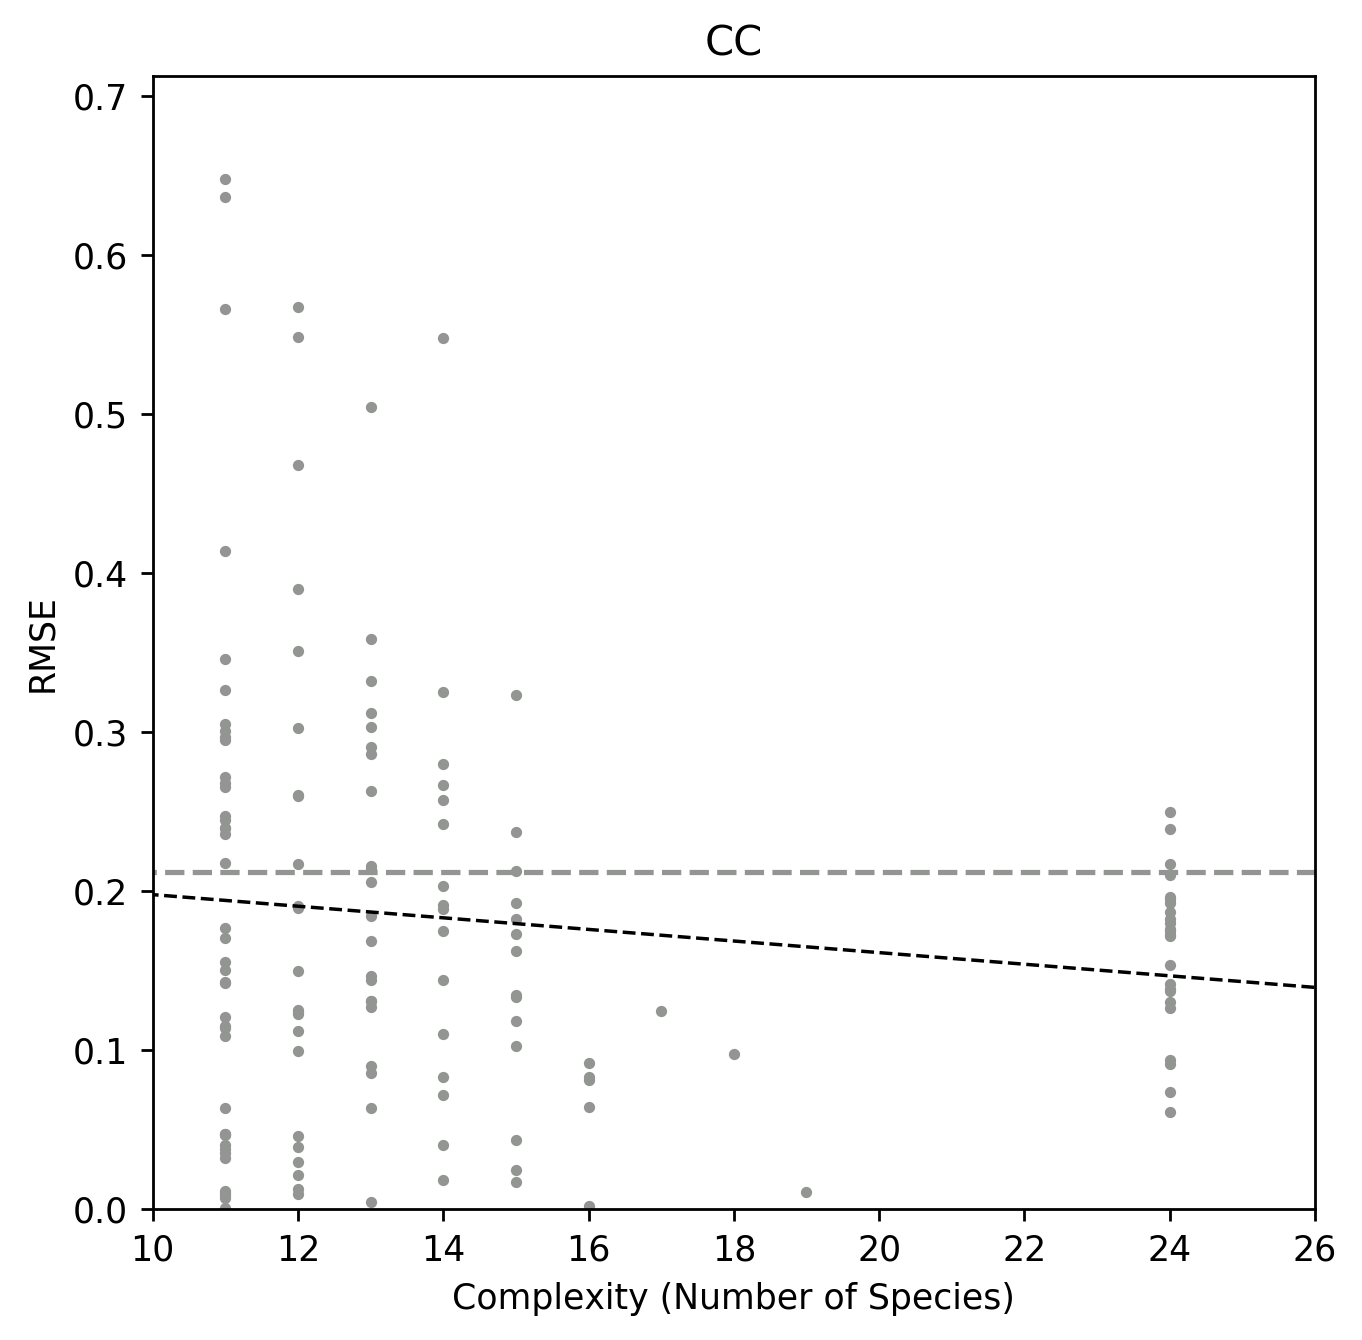

y=0.03178324022267872x+-0.3156585731546714, r=0.7599568221987401, p=2.693477895590822e-29
rho=0.5968469135556898, p=9.51604719337668e-16


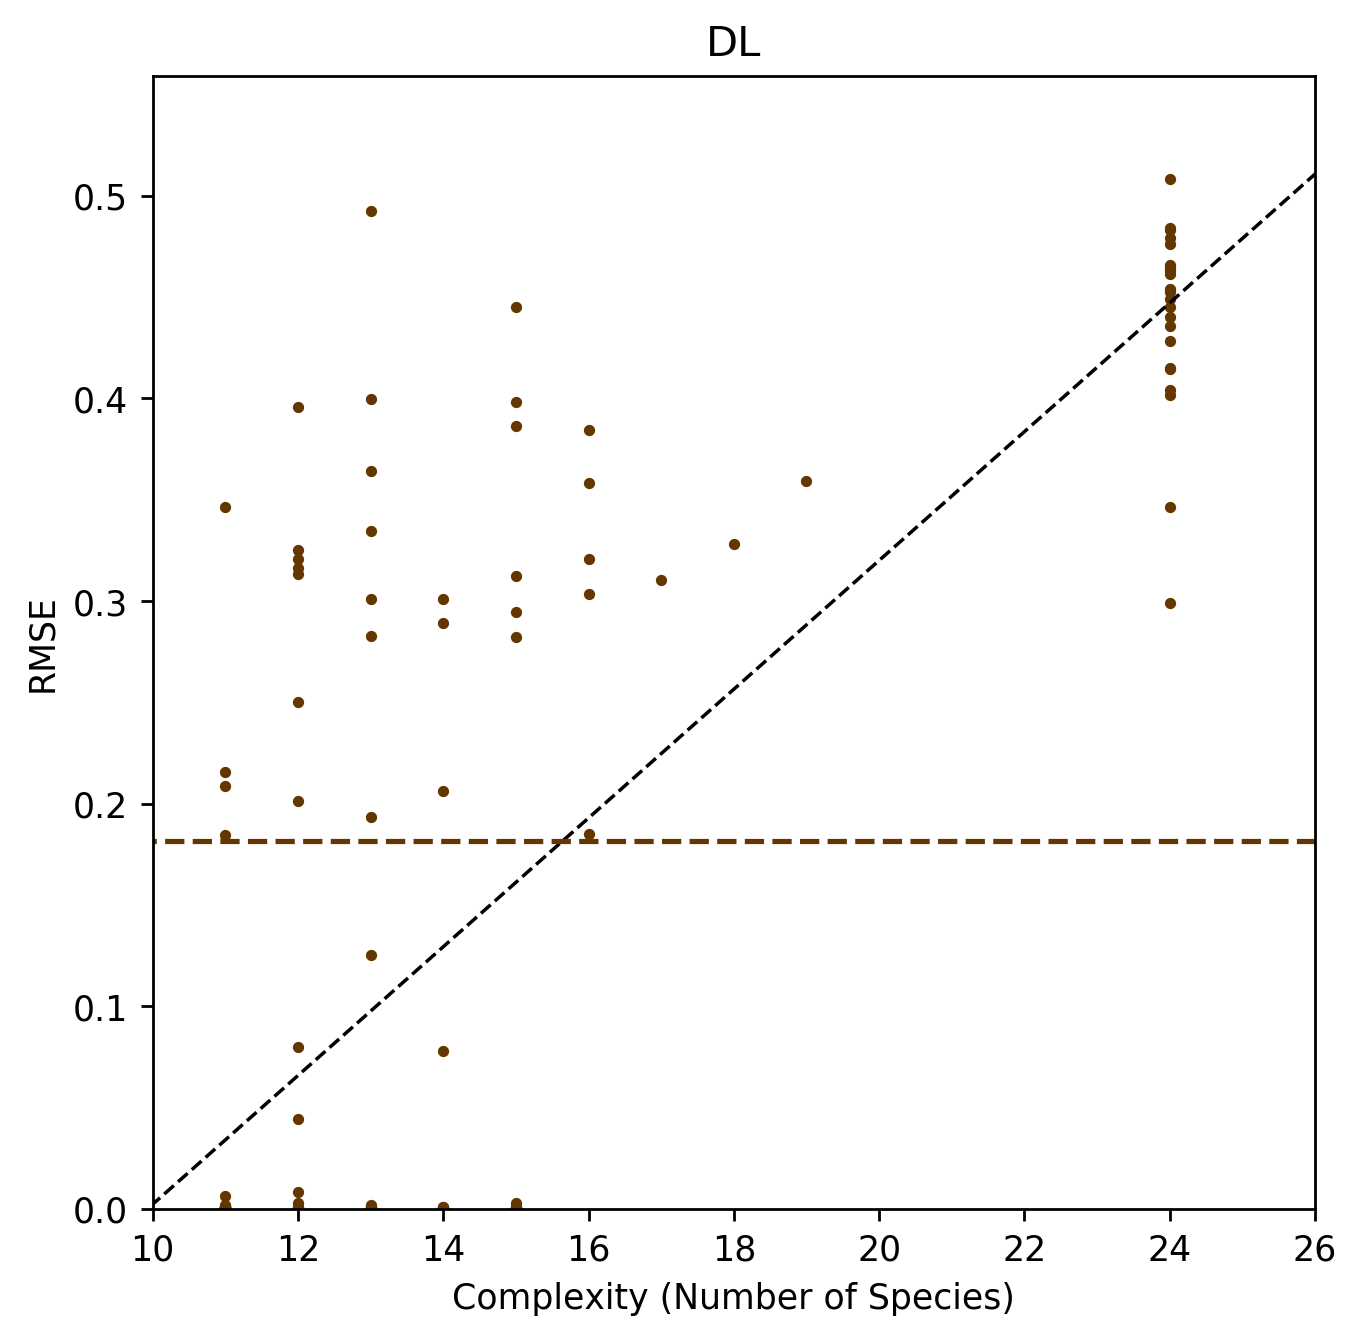

y=-0.0010827609221108227x+0.08608241177876248, r=-0.05788738827641889, p=0.4831513438956174
rho=0.06928317906398522, p=0.4011349032369075


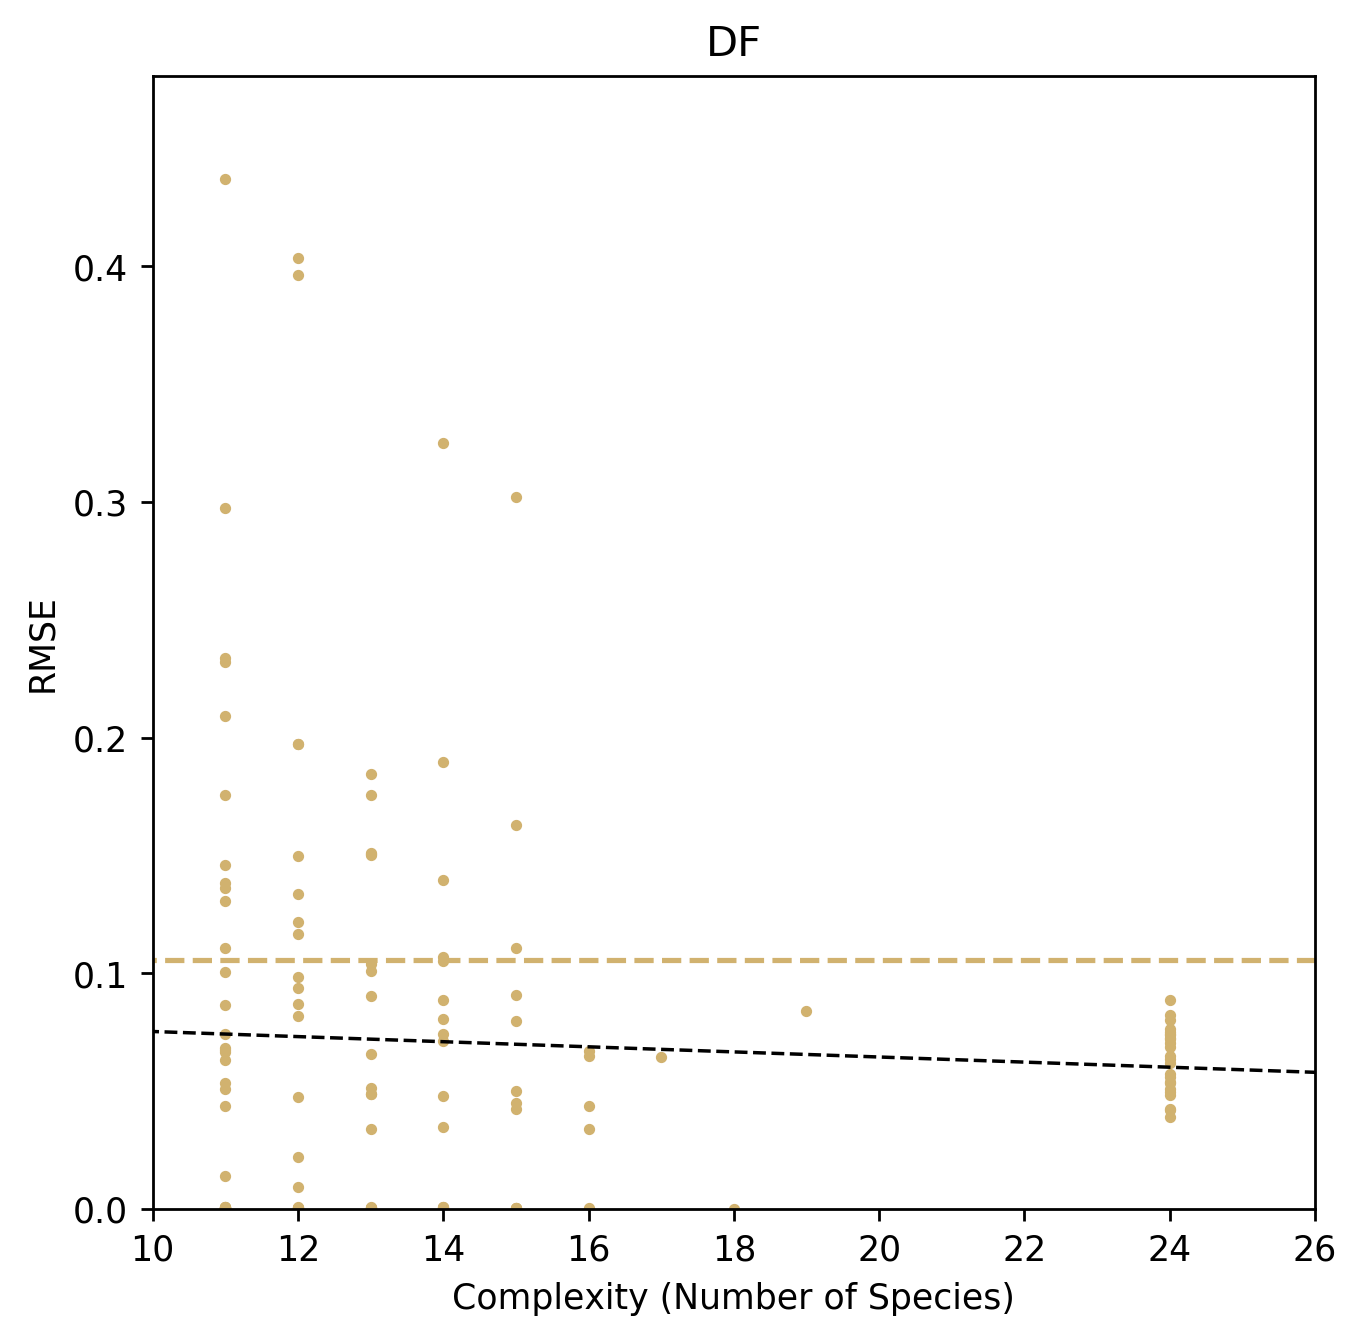

In [64]:
colnames=[]
for species in phylogeny:
    colnames.append(species)
colnames.append('Butyrate')
for species in phylogeny:
    plt.figure(figsize=(6,6))
    xall=[]
    yall=[]
    for community in predictionset:
        subDF=pd.read_csv('RLC9_Simulations_FixedPrior/'+community+'.csv',index_col=0)
        specieslist=community.split('-')
        prediction=subDF[species+' OD'].median()
        measurement=cleanDF[cleanDF['Treatment']==community][species+' OD'].median()
        rmse=((prediction-measurement)**2)**0.5
        nspecies=len(specieslist)
        plt.scatter(nspecies,rmse,color=colordict[species],s=5)
        xall.append(nspecies)
        yall.append(rmse)
    for LOO in phylogeny:
        if LOO!=species:
            mystring=''
            for each in phylogeny:
                if each!=LOO:
                    if mystring=='':
                        mystring=each
                    else:
                        mystring=mystring+'-'+each
            tempDF=pd.read_csv('RLC9_Simulations_FixedPrior/'+mystring+'.csv',index_col=0)
            prediction=tempDF[species+' OD'].median()
            measurement=cleanDF[cleanDF['Treatment']=='COMM6*'+LOO][species+' OD'].median()
            rmse=((prediction-measurement)**2)**0.5
            nspecies=24
            plt.scatter(nspecies,rmse,color=colordict[species],s=5)
            xall.append(nspecies)
            yall.append(rmse)
    mystring=''
    for each in phylogeny:
        if mystring=='':
            mystring=each
        else:
            mystring=mystring+'-'+each
    subDF=pd.read_csv('RLC9_Simulations_FixedPrior/'+mystring+'.csv',index_col=0)
    prediction=tempDF[species+' OD'].median()
    measurements=cleanDF[cleanDF['Treatment']=='COMM6'][species+' OD'].median()
    rmse=((prediction-measurement)**2)**0.5
    nspecies=len(specieslist)
    plt.scatter(nspecies,rmse,color=colordict[species],s=5)
    xall.append(nspecies)
    yall.append(rmse)
    m,b,R,p,stderr=stats.linregress(xall,yall)
    print('y='+str(m)+'x+'+str(b)+', r='+str(R)+', p='+str(p))
    rho,p_spearman=stats.spearmanr(xall,yall)
    print('rho='+str(rho)+', p='+str(p_spearman))
    z=np.linspace(0,1.1*max(xall+yall),1000)
    plt.plot(z,m*z+b,linestyle='dashed',color='k',linewidth=1)
    typicalOD=cleanDF[(cleanDF['NumSpecies']>10)&(cleanDF[species]==1)][species+' OD'].median()
    plt.plot([0,30],[typicalOD,typicalOD],color=colordict[species],linestyle='--')
    plt.xlim(10,26)
    plt.ylim(0,1.1*max(yall+[typicalOD]))
    plt.title(species)
    plt.xlabel('Complexity (Number of Species)')
    plt.ylabel('RMSE')
#     plt.savefig('RLC9_Predictionset_Prior.png',dpi=2000)
    plt.show()
    plt.close()

y=2.3647798127229773x+0.01632219154684856, r=0.7064048165410176, p=8.97000794875096e-16
rho=0.4038334367679108, p=4.5016128853786924e-05


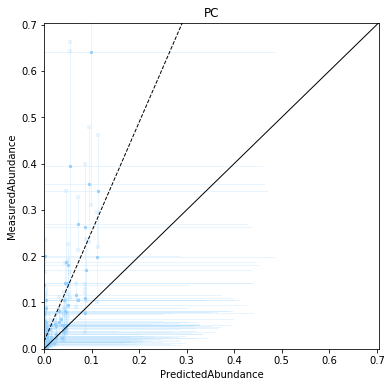

y=-0.14251225964232625x+0.061018072596717675, r=-0.015882903486531097, p=0.8779321066007215
rho=0.14746387501398894, p=0.15163803702157827


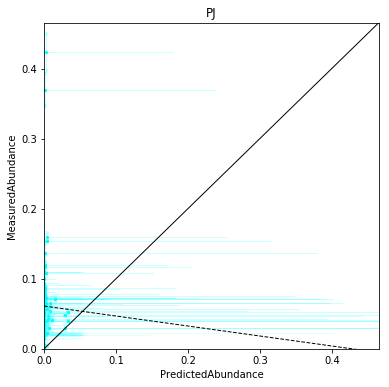

y=6.709176439769255x+0.04278710283577926, r=0.47166068420690044, p=4.560093211196111e-06
rho=0.6369198401874732, p=4.3307799111617664e-11


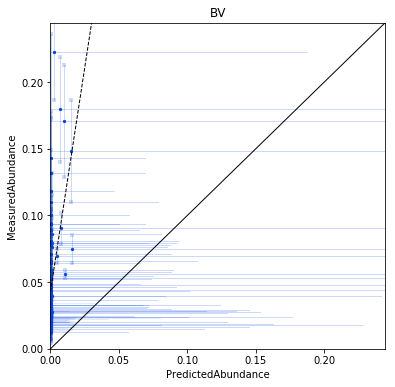

y=0.4549107807733257x+0.1326793472252869, r=0.46749188866591074, p=0.0020574937978843928
rho=0.2705692759219672, p=0.08708322050233791


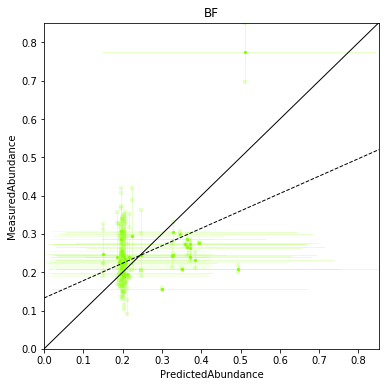

y=1.4052247423189892x+0.14693815954394668, r=0.8485308060603288, p=3.798230990848558e-22
rho=0.5916513441788535, p=1.8208447843951038e-08


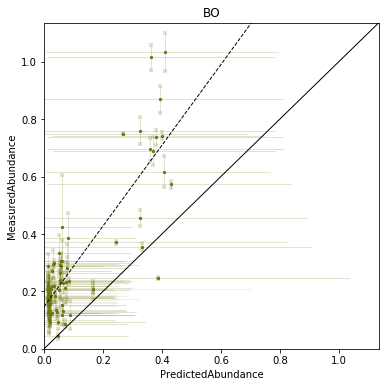

y=0.4973885028064736x+0.21813974908664915, r=0.8334552741344775, p=2.4824315575069763e-11
rho=0.7435620815910199, p=3.867695827399377e-08


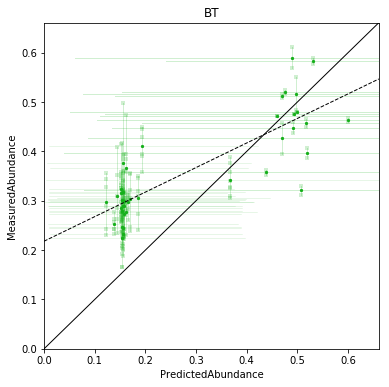

y=0.8459725435554452x+0.16964699637508146, r=0.8223995781848578, p=1.4023088288492468e-16
rho=0.7688984363365263, p=1.8531308182086775e-13


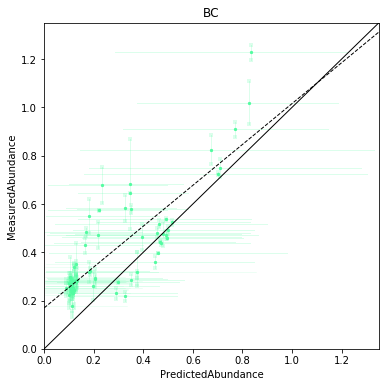

y=0.862364290797841x+0.0725940724197376, r=0.8291269608545336, p=1.559319978238776e-16
rho=0.861698330301777, p=4.938742676885827e-19


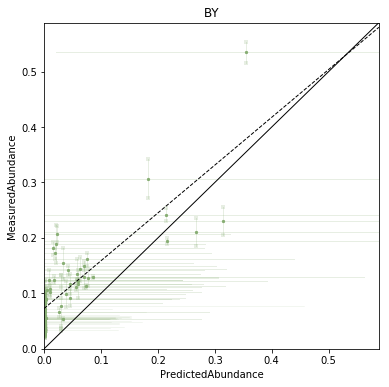

y=10.821586506736509x+0.054282527296859, r=0.8597256223321775, p=9.473560208473967e-20
rho=0.7033505420623591, p=9.122505135962725e-11


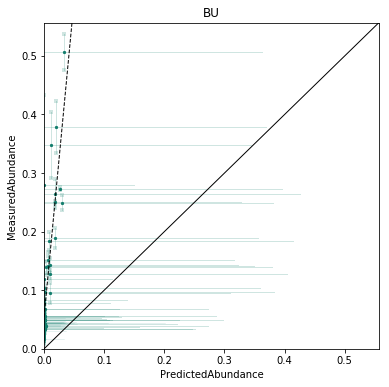

y=1.2224300654510287x+0.0036086543903255004, r=0.4945318568946925, p=7.518921674317559e-06
rho=0.6275944287060516, p=2.1762878998017247e-09


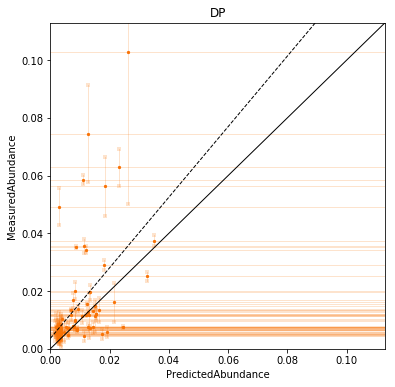

y=2.1303628073641265x+0.02026452934304147, r=0.13668658482011173, p=0.2700449424234892
rho=-0.09895142221960888, p=0.42564400419623094


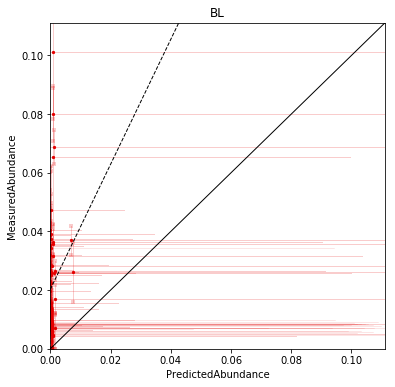

y=1.7445334123820389x+-0.14094020440629834, r=0.8135196803291806, p=1.2869964791580352e-23
rho=0.7275711351218092, p=6.772070064922508e-17


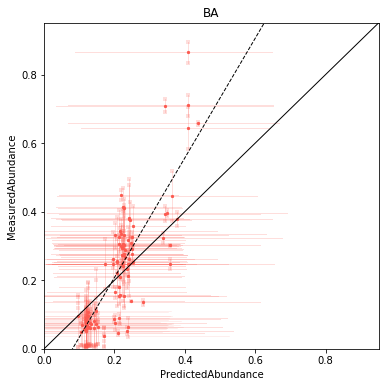

y=0.38349867280082545x+0.2988684569012638, r=0.27453762549045835, p=0.010525914042360371
rho=0.11687398874599937, p=0.2838716189268295


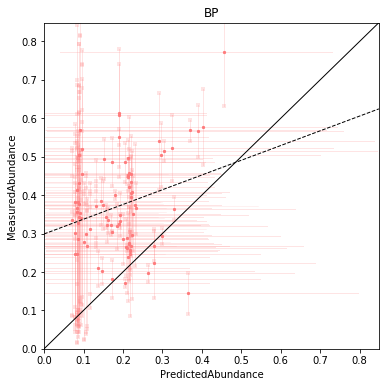

y=-35.28753155584803x+0.07887429093172448, r=-0.2431409991994972, p=0.034311133945695994
rho=-0.6152605281109423, p=3.342022086042926e-09


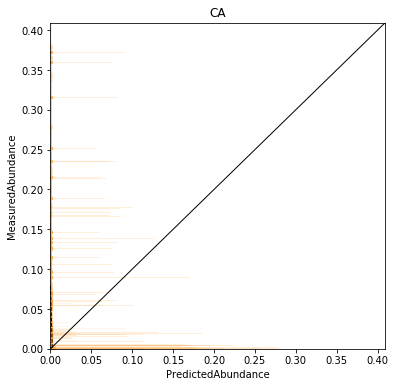

y=1.7180974537242106x+0.02251759570981071, r=0.023451407933236138, p=0.8438763353847598
rho=0.3846598841583954, p=0.0007791703674527024


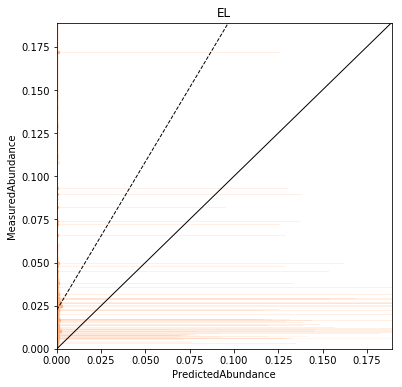

y=93196.6332558697x+0.001347033230457252, r=0.23025770422343533, p=0.004727394695096731
rho=0.2966518199274029, p=0.00023911180218297155


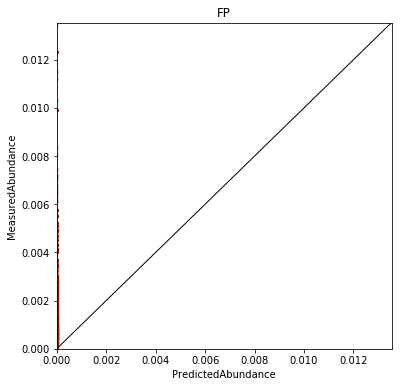

y=1.9545797499406228x+0.0730820605803488, r=0.3511914370452187, p=0.0018670978781820601
rho=0.5933875146243515, p=1.6148750266730812e-08


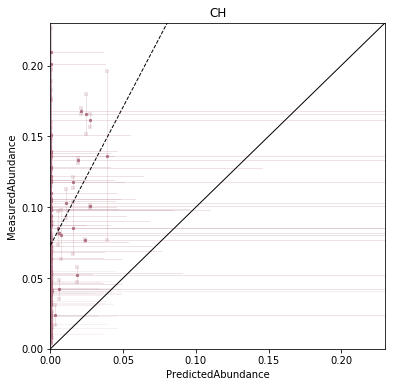

y=2.950310046055869x+-2.2857404812379487, r=0.7351015731004955, p=1.9806205107550415e-19
rho=0.6037554707091883, p=5.827224400136898e-12


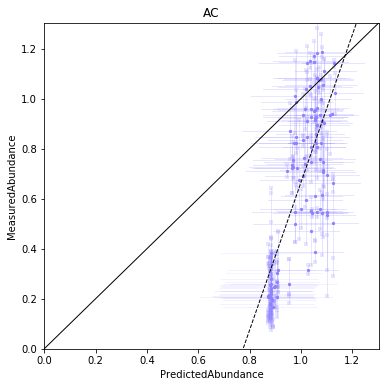

y=-0.049856055439319126x+0.0018050084946998506, r=-0.01957049419256172, p=0.8530998113962224
rho=0.04554369227601998, p=0.6664023505187857


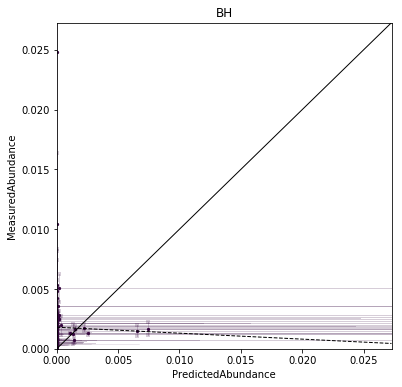

y=0.9211950208555783x+0.04832928058101551, r=0.6251204638059464, p=3.3851227500749538e-09
rho=0.6410175322411793, p=1.0031697273893712e-09


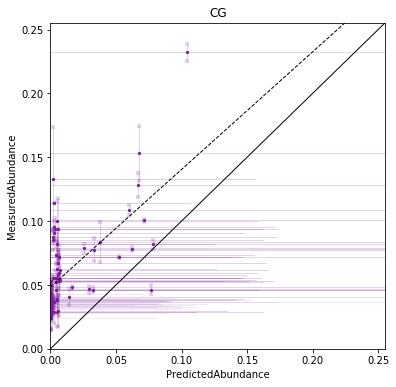

y=-6.9433810477197095x+0.12693720298927272, r=-0.4191396847704876, p=1.0364612624399388e-07
rho=-0.647876517210966, p=4.2477006509957746e-19


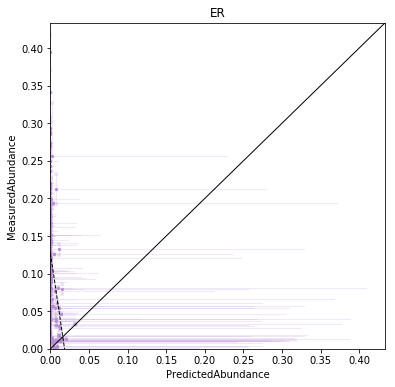

y=383.4038701015149x+0.00468272736171693, r=0.43416250695201547, p=3.169215205111482e-08
rho=0.5504055209842669, p=3.5519141057995964e-13


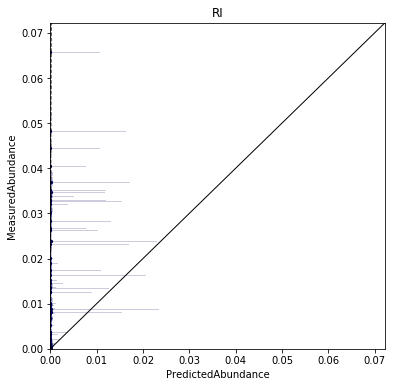

y=0.4930423530564844x+0.11730931242832149, r=0.7526326425571159, p=1.8226486347324267e-28
rho=0.6673704583446045, p=1.4896960280870777e-20


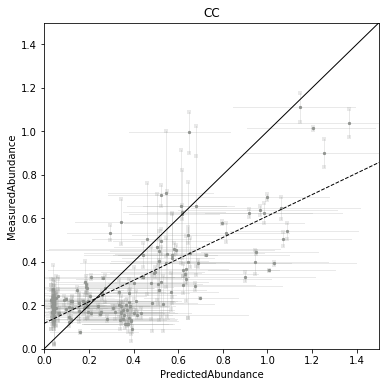

y=1.562062765362609x+-0.661087508493043, r=0.8191501319729741, p=1.3187143770958888e-16
rho=0.7850593528370663, p=1.614613489115709e-14


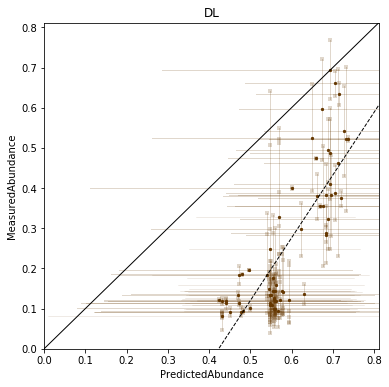

y=1.8557302243810592x+0.05407539601964749, r=0.7038440783217815, p=3.1476562595732573e-16
rho=0.7448687214816647, p=6.419738007863416e-19


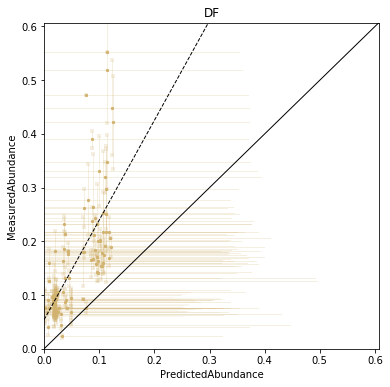

In [36]:
colnames=[]
for species in phylogeny:
    colnames.append(species)
colnames.append('Butyrate')
for species in phylogeny:
    plt.figure(figsize=(6,6))
    allpredictions=[]
    allmeasurements=[]
    for community in predictionset:
        if species in community:
            subDF=pd.read_csv('RLC9_Simulations_FixedPrior/'+community+'.csv',index_col=0)
            specieslist=community.split('-')
            prediction=subDF[species+' OD'].median()
            x20=np.percentile(subDF[species+' OD'],20)
            x80=np.percentile(subDF[species+' OD'],80)
            measurements=list(cleanDF[cleanDF['Treatment']==community][species+' OD'])
            plt.scatter(prediction,np.mean(measurements),color=colordict[species],s=5)
            plt.plot([prediction for i in range(len(measurements))],measurements,marker='s',markersize=4,alpha=0.2,color=colordict[species],markeredgewidth=0,linewidth=1)
            plt.plot([x20,x80],[np.mean(measurements),np.mean(measurements)],alpha=0.2,color=colordict[species],linewidth=1)
            allpredictions.append(prediction)
            allmeasurements.append(np.mean(measurements))
    for LOO in phylogeny:
        if species!=LOO:
            mystring=''
            for each in phylogeny:
                if each!=LOO:
                    if mystring=='':
                        mystring=each
                    else:
                        mystring=mystring+'-'+each
            tempDF=pd.read_csv('RLC9_Simulations_FixedPrior/'+mystring+'.csv',index_col=0)
            prediction=tempDF[species+' OD'].median()
            x80=np.percentile(tempDF[species+' OD'],80)
            x20=np.percentile(tempDF[species+' OD'],20)
            measurements=cleanDF[cleanDF['Treatment']=='COMM6*'+LOO][species+' OD']
            plt.scatter(prediction,np.mean(measurements),color=colordict[species],s=5)
            plt.plot([prediction for i in range(len(measurements))],measurements,marker='s',markersize=4,alpha=0.2,color=colordict[species],markeredgewidth=0,linewidth=1)
            plt.plot([x20,x80],[np.mean(measurements),np.mean(measurements)],alpha=0.2,linewidth=0.5,color=colordict[species])
            allpredictions.append(prediction)
            allmeasurements.append(np.mean(measurements))
    mystring=''
    for each in phylogeny:
        if mystring=='':
            mystring=each
        else:
            mystring=mystring+'-'+each
    subDF=pd.read_csv('RLC9_Simulations_FixedPrior/'+mystring+'.csv',index_col=0)
    prediction=tempDF[species+' OD'].median()
    x80=np.percentile(tempDF[species+' OD'],80)
    x20=np.percentile(tempDF[species+' OD'],20)
    measurements=cleanDF[cleanDF['Treatment']=='COMM6'][species+' OD']
    plt.scatter(prediction,np.mean(measurements),color=colordict[species],s=5)
    plt.plot([prediction for i in range(len(measurements))],measurements,marker='s',markersize=4,alpha=0.2,color=colordict[species],markeredgewidth=0,linewidth=1)
    plt.plot([x20,x80],[np.mean(measurements),np.mean(measurements)],alpha=0.2,linewidth=0.5,color=colordict[species])
    allpredictions.append(prediction)
    allmeasurements.append(np.mean(measurements))
    x=allpredictions
    y=allmeasurements
    m,b,R,p,stderr=stats.linregress(x,y)
    print('y='+str(m)+'x+'+str(b)+', r='+str(R)+', p='+str(p))
    rho,p_spearman=stats.spearmanr(x,y)
    print('rho='+str(rho)+', p='+str(p_spearman))
    z=np.linspace(0,1.1*max(x+y),1000)
    plt.plot(z,m*z+b,linestyle='dashed',color='k',linewidth=1)
    plt.plot([0,10],[0,10],color='k',linewidth=1)
    plt.xlim(0,1.1*max(x+y))
    plt.ylim(0,1.1*max(x+y))
    plt.title('gLV Model - Prediction Data')
    plt.xlabel('PredictedAbundance')
    plt.ylabel('MeasuredAbundance')
    plt.title(species)
    #plt.savefig('RLC9_Predictionset_Prior.png',dpi=2000)
    plt.show()
    plt.close()

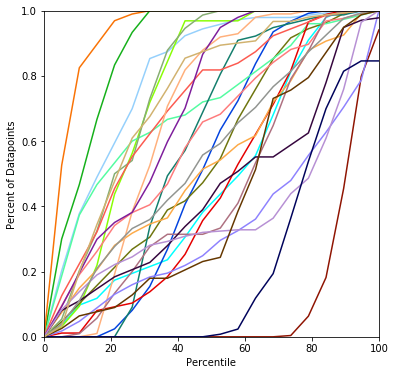

In [37]:
#Check plot the prediction accuracy curve
colnames=[]
for species in phylogeny:
    colnames.append(species)
communitylist=predictionset+LOOComms
plt.figure(figsize=(6,6))
for species in phylogeny:
    frames=[]
    for community in communitylist:
        if species in community:
            members=community.split('-')
            mystring=''
            for member in members:
                mystring=mystring+'_'+str(phylogenyvectorDict[member]+1)
            mystring=mystring+'.csv'
            DF=pd.read_csv('RLC9_Simulations_FixedPrior/'+mystring,names=colnames)
            newDF=pd.DataFrame()
            newDF['OD']=DF[species]
            newDF['Community']=community
            frames.append(newDF)
    totalDF=pd.concat(frames).reset_index(drop=True)
    
    z=np.linspace(0,100,20)
    y=[]
    for deviation in z:
        low=50-(deviation/2)
        high=50+(deviation/2)
        count=0
        totalcount=0
        for community in communitylist:
            if species in community:
                tempDF=cleanDF[cleanDF['Treatment']==community]
                predictions=list(totalDF[(totalDF['Community']==community)]['OD'])
                for k in list(tempDF.index.values):
                    totalcount+=1
                    if tempDF.at[k,species+' OD']>np.percentile(predictions,low) and tempDF.at[k,species+' OD']<np.percentile(predictions,high):
                        count+=1
        y.append(count/totalcount)
    plt.plot(z,y,color=colordict[species])
plt.xlim(0,100)
plt.ylim(0,1)
plt.xlabel('Percentile')
plt.ylabel('Percent of Datapoints')
plt.savefig('RLC9_SpeciesErrorCurve_Posterior.pdf')
plt.show()
plt.close()

## Compare Parameters to COMM1 Model

In [38]:
C1=['BH','CA','BU','PC','BO','BV','BT','EL','FP','CH','DP','ER']
C1params=np.genfromtxt('C1_params.csv',dtype='float64',delimiter=',')

y=0.42645923001768676x+0.19211438383921914, r=0.4202488863062407, p=0.17376183194496492
rho=0.37762237762237766, p=0.22620604493502663


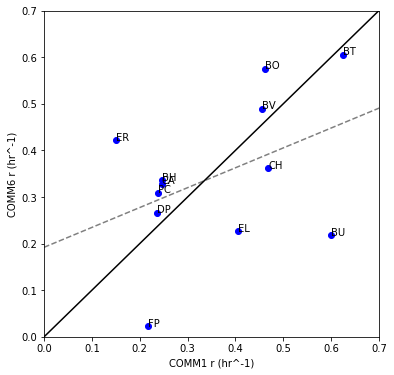

In [39]:
#Compare growth rates
plt.figure(figsize=(6,6))
xall=[]
yall=[]
for k in range(len(C1)):
    species=C1[k]
    C1r=C1params[0,k]
    C6r=np.median(paramdict[species]['r'])
    plt.scatter(C1r,C6r,color='b')
    plt.text(C1r,C6r,species)
    xall.append(C1r)
    yall.append(C6r)
m,b,R,p,stderr=stats.linregress(xall,yall)
rho,p_spearman=stats.spearmanr(xall,yall)
print('y='+str(m)+'x+'+str(b)+', r='+str(R)+', p='+str(p))
print('rho='+str(rho)+', p='+str(p_spearman))
z=np.linspace(0,1,1000)
plt.plot(z,m*z+b,linestyle='dashed',color='grey')
plt.plot([0,1],[0,1],color='k')
plt.xlabel('COMM1 r (hr^-1)')
plt.ylabel('COMM6 r (hr^-1)')
plt.xlim(0,0.7)
plt.ylim(0,0.7)
plt.show()
plt.close()

BV-BH: Different
BT-BH: Different
BH-CA: Same
PC-CA: Same
BH-BU: Same
CA-BU: Same
PC-BU: Same
BV-BU: Same
FP-BU: Different
CA-PC: Same
CH-PC: Same
BH-BO: Same
CA-BO: Same
PC-BO: Same
DP-BO: Same
BH-BV: Same
BT-BV: Same
FP-BV: Different
BH-BT: Same
CA-BT: Same
BU-BT: Same
BO-BT: Same
BV-BT: Same
CH-BT: Same
PC-EL: Same
BV-EL: Different
FP-EL: Same
BH-CH: Same
PC-DP: Same
CH-DP: Same
BH-ER: Same
CH-ER: Same


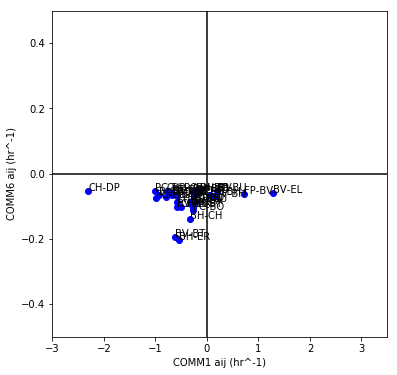

In [40]:
#Compare aij params
plt.figure(figsize=(6,6))
xall=[]
yall=[]
for i in range(len(C1)):
    for j in range(len(C1)):
        speciesj=C1[i]
        speciesi=C1[j]
        if speciesi!=speciesj:
            C1r=C1params[i+1,j]
            C6r=np.median(paramdict[speciesi][speciesj])
            if abs(C1r)>0.05 and abs(C6r)>0.05:
                plt.scatter(C1r,C6r,color='b')
                plt.text(C1r,C6r,speciesi+'-'+speciesj)
                if C1r/C6r>0:
                    print(speciesi+'-'+speciesj+':'+' Same')
                else:
                    print(speciesi+'-'+speciesj+':'+' Different')
plt.plot([0,0],[-5,5],color='k')
plt.plot([-5,5],[0,0],color='k')
plt.xlabel('COMM1 aij (hr^-1)')
plt.ylabel('COMM6 aij (hr^-1)')
plt.xlim(-3,3.5)
plt.ylim(-0.5,0.5)
plt.show()
plt.close()

## Make an Initial Guess

In [41]:
# baseparams=np.genfromtxt('RLC9Params/W2_lambda1_weight10_params.csv')
# monoparams=np.genfromtxt('../../Datasets/RLC2 Model Training/RLC2_Outputs/posterior_RLC2/param1.csv')

In [42]:
# k=0
# species=0
# newparams=[]
# for i in range(len(baseparams)):
#     if k==0:
#         newparams.append(monoparams[i])
#         k+=1
#     elif species==k-1:
#         if k==25:
#             newparams.append(monoparams[i])
#             k=0
#             species+=1
#         else:
#             newparams.append(monoparams[i])
#             k+=1
#     elif k==25:
#         newparams.append(baseparams[i])
#         k=0
#         species+=1
#     else:
#         newparams.append(baseparams[i])
#         k+=1

In [43]:
# np.savetxt('newparams.csv',newparams)